In [1]:
#importing libraries

import numpy as np
import h5py
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from zipfile import ZipFile
from PIL import Image 
from sklearn.preprocessing import scale
from sklearn import preprocessing
import random

%matplotlib inline

In [42]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [4]:
LE = h5py.File("C:\\Users\\giriprasad.1\\Downloads\\GC12-LES.hdf5", 'r')

# List all groups
print(list(LE.keys()))

# Get the data
dataLE = LE['LocalEnergySchedules']
print(dataLE)
print(len(dataLE))

['LocalEnergySchedules']
<HDF5 group "/LocalEnergySchedules" (6579 members)>
6579


In [5]:
ke=[]

for key in dataLE.keys():
    ke.append(key)

1124
2325
2400
241
6248
5992
275
2573
330
1149
6527
4813
3862
87
6548
4358
4008
4271
3425
4986
4582
723
3184
3394
1117
0
5228
3043
3334
4808
5007
5966
3710
4028
994
3367
3405
298
3697
2872
5434
1734
2691
4234
2875
3872
4284
4642
4356
2878
778
6480
245
2367
1409
4958
3857
5746
429
5595
6274
4569
6097
4988
4687
1118
6575
3860
1581
3146
661
2196
2366
3642
3221
5872
2913
272
1569
3792
5598
2058
6550
5188
6239
2707
5020
5475
563
3230
5964
2288
4979
4112
4754
6265
474
71
1455
6308
4371
3156
1354
4154
4495
5463
1663
5773
2155
4123
4433
342
6263
4090
5157
5830
377
5302
5961
1201
3549
4913
4269
3012
1292
5161
426
2761
4362
595
6129
3985
5238
1020
2938
2630
6417
5934
3636
2429
2583
45
252
6084
6042
3875
2895
6053
2673
6271
3524
240
2674
4613
5781
530
2397
204
3107
1087
120
5303
6292
4337
2985
3129
1181
3764
4733
1078
4603
1069
1172
4572
2301
1726
4169
246
6346
5631
1191
2446
2955
1675
102
5396
2897
3706
5670
5366
4819
2340
3247
3064
4147
3807
5650
829
2114
5864
6188
2355
3969
651
4130
6171
4140


2677
6194
5346
6499
2684
2348
394
1380
6297
2922
5602
979
405
2443
4199
5417
1678
1927
527
1200
732
1746
4034
3570
3741
4873
867
6039
5481
885
3233
5859
566
3696
4597
5122
4900
5557
3784
5171
3359
4660
5999
2362
441
2741
4557
3671
2116
4829
6252
2483
20
1500
4242
922
2089
5503
1120
4022
4700
3754
561
1304
1224
6529
2972
961
2317
1625
2453
5507
2068
6198
634
3404
5658
2479
617
5422
2342
2329
194
839
4322
2500
4924
1186
4247
4756
159
4342
5048
614
4270
6440
1177
4475
865
1934
5218
1097
196
5413
4850
227
1233
3321
6068
2118
3679
5478
1788
3497
5655
2177
4288
1363
6495
2049
309
4116
6249
4200
5857
3004
4894
1238
3315
5459
784
2002
1970
3517
3135
3515
4932
1717
1044
5954
3023
3778
3343
6028
546
6055
573
347
5272
4897
4143
1405
3289
3991
2369
1283
3536
5055
3337
3481
1655
4381
4974
4983
4474
2592
5440
4848
5873
4806
5676
856
5748
6402
851
222
4949
5878
6470
2682
2507
952
3917
4695
1696
4422
6037
1303
310
2886
4757
5363
2239
574
3861
2609
2527
1977
206
4408
1003
2047
6422
1102
6205
5289
430
4

1910
1454
1695
5697
2250
799
485
6357
391
1861
4698
5948
1996
3212
3724
1534
4751
5750
380
6095
6549
1437
5731
2718
4538
840
2503
6505
2216
917
1779
5769
1758
5880
2859
1657
3356
260
2268
866
3397
3300
4904
152
1198
2166
4429
3556
5436
5205
644
496
2641
998
6137
4632
2634
1349
2904
2432
5734
1247
2822
2273
1506
4745
1114
1786
2132
4075
1018
5022
4005
2139
2228
5689
3110
2976
2817
3674
1729
3909
4120
1043
6124
5222
5035
6180
3892
4670
6317
1482
2742
5890
5469
2864
2874
3472
983
319
1488
5675
3275
4517
3513
253
1167
128
2016
6122
920
5814
3388
5136
6578
2447
3181
3390
4389
6109
2267
4085
1418
4148
1311
2392
4341
2028
4798
476
4508
6011
2802
84
5900
2198
2716
1326
81
3834
3579
6467
82
3395
2591
280
5760
4937
3125
5638
6244
4539
5625
2667
2934
4901
918
1357
5530
3354
3521
2932
916
5367
5940
3744
773
4591
5120
1633
5234
2696
179
2055
6532
1241
966
1479
4446
2435
5338
5015
188
1890
5411
895
4849
4888
5130
861
1110
6543
1723
1037
1656
3491
4816
1427
369
5267
5703
5549
4472
1674
2615
1984
1019

In [6]:
#Reading the file

TH = h5py.File("C:\\Users\\giriprasad.1\\Downloads\\GC12-TH.hdf5", 'r')

# List all groups
print(list(TH.keys()))

# Get the data
dataTH = TH['ThermalHistories']
print(dataTH)
print(len(dataTH))

['ThermalHistories']
<HDF5 group "/ThermalHistories" (6579 members)>
6579


In [8]:
ke2=[]

for key in dataTH.keys():
    ke2.append(key)

1124
2325
2400
241
6248
5992
275
2573
330
1149
6527
4813
3862
87
6548
4358
4008
4271
3425
4986
4582
723
3184
3394
1117
0
5228
3043
3334
4808
5007
5966
3710
4028
994
3367
3405
298
3697
2872
5434
1734
2691
4234
2875
3872
4284
4642
4356
2878
778
6480
245
2367
1409
4958
3857
5746
429
5595
6274
4569
6097
4988
4687
1118
6575
3860
1581
3146
661
2196
2366
3642
3221
5872
2913
272
1569
3792
5598
2058
6550
5188
6239
2707
5020
5475
563
3230
5964
2288
4979
4112
4754
6265
474
71
1455
6308
4371
3156
1354
4154
4495
5463
1663
5773
2155
4123
4433
342
6263
4090
5157
5830
377
5302
5961
1201
3549
4913
4269
3012
1292
5161
426
2761
4362
595
6129
3985
5238
1020
2938
2630
6417
5934
3636
2429
2583
45
252
6084
6042
3875
2895
6053
2673
6271
3524
240
2674
4613
5781
530
2397
204
3107
1087
120
5303
6292
4337
2985
3129
1181
3764
4733
1078
4603
1069
1172
4572
2301
1726
4169
246
6346
5631
1191
2446
2955
1675
102
5396
2897
3706
5670
5366
4819
2340
3247
3064
4147
3807
5650
829
2114
5864
6188
2355
3969
651
4130
6171
4140


5480
2013
4789
4899
5215
2072
3477
1812
6487
324
1216
2542
4720
2498
2430
2616
407
170
1688
823
2157
1791
237
1132
4648
4880
5466
3486
2745
2845
3622
5430
3291
3357
4972
3056
5596
2383
161
3620
507
5402
3095
4496
6253
1707
5482
1502
1112
6064
6471
4313
2115
366
1892
700
5630
5804
2526
4769
3600
734
19
1806
115
25
4971
4223
2813
4746
1679
2419
3698
5886
2130
466
4279
3117
5654
5793
4061
5741
4231
2158
4609
335
2908
4346
3476
4566
6045
321
5541
2156
3511
3730
5178
3255
1370
1888
3921
325
6566
1207
4831
3170
4633
1864
4013
3112
5291
4238
4702
4255
5307
2251
5765
607
5803
197
346
4968
5077
2384
6447
3720
1175
582
5210
4428
2033
5100
2240
5353
1667
4828
1681
6146
6496
1109
1660
2474
4401
5131
5220
409
5963
400
1643
2719
6176
49
360
755
3277
6217
6396
819
2428
5985
5792
1817
908
4823
836
6395
2403
1447
4598
1493
1127
783
6259
1071
1528
444
6335
424
2929
1926
2172
5968
176
4866
3091
3502
2253
5242
5548
5865
6052
1906
4006
5253
88
4107
2723
6062
900
1178
2607
2219
103
5057
3758
2133
1907
3137


4905
2502
5947
2943
842
3916
4675
6450
1722
5104
4540
1937
2283
4800
3629
4915
596
1047
3791
2632
6077
448
5904
2652
1733
4696
3770
6320
4666
3013
2455
1913
5955
6236
2202
3927
3358
4210
6376
6358
3173
1443
3939
2732
1545
2940
3581
43
470
3045
1094
1385
4027
2104
5974
5560
2471
4503
5885
964
2207
3068
2433
1116
5001
1213
484
2129
4852
803
2052
2375
5861
5574
1597
251
178
4166
5310
984
2258
465
6005
1705
824
1662
6332
2287
5448
3271
5672
1536
1692
6461
3396
2927
6072
2990
3282
6444
6577
5841
2614
5593
6098
6469
4563
2543
6192
5379
1315
2639
1811
3066
6232
2686
2810
3335
525
1859
2816
5274
4126
5269
3172
2205
2324
1957
4741
6178
5758
1222
912
3124
4684
4383
500
1885
2127
1160
3759
4441
5181
3544
6283
4268
2687
6184
1386
4263
4973
982
2042
5233
6003
5056
1459
6203
315
2574
1250
5807
5078
1654
5306
772
4157
199
5101
6517
1096
5777
6067
6017
622
529
1318
2105
190
2631
2910
5679
5258
6163
1040
4664
2128
4622
2887
3745
3975
4038
1738
1316
1915
5578
2675
3414
357
1799
349
757
4489
4546
1711
51

6071
4512
3026
5626
3703
5397
1816
7
758
4526
2094
5288
3531
2237
2784
938
6303
4600
4910
6278
2898
2281
4611
1847
4715
5061
451
1987
1474
2603
4137
5044
4498
231
1676
2391
593
3310
2201
986
3384
4417
4583
6457
5096
1626
2555
3858
3087
737
1715
4083
3704
3646
2313
1562
6504
3906
4902
1728
890
6370
4528
5949
2015
355
5566
2560
1505
5718
5996
332
4217
5879
1381
3694
3355
368
3874
3567
2043
3605
4426
83
5145
3098
4020
1449
669
3478
5508
2262
684
1863
2204
2509
6041
3448
745
2775
2865
458
1808
1614
4742
1092
363
3317
782
2489
2427
4916
503
550
2885
2222
1914
6523
2598
3621
5415
1555
1986
2724
2069
5196
526
660
6572
3281
4577
4760
2701
5026
4339
1017
2774
3365
5295
6187
3044
5424
3403
3498
6356
5483
3332
1252
1431
5958
5513
5390
277
2890
6268
2861
4510
5284
3288
1446
3930
5099
3990
3869
659
832
5730
5407
6266
5313
5471
869
2768
3950
1188
77
2524
4763
5332
806
2018
2578
3966
1576
1339
4853
5779
1265
3285
4040
2316
808
518
1135
2694
6476
6330
5875
1424
5014
3075
1024
1307
5665
374
2575
2314
1

In [9]:

print("Local Energy Schedules:",len(ke),"\nThermal Histories:     ",len(ke2))

Local Energy Schedules: 6579 
Thermal Histories:      6579


In [11]:
finalke = ke.copy()
count = 0
for i in range(0,len(ke)):
    if ke[i] not in ke2:
        finalke.pop(i-count)
        count+=1
        
finalke2 = ke2.copy()
count = 0
for i in range(0,len(ke2)):
    if ke2[i] not in finalke:
        finalke2.pop(i-count)
        count+=1

In [13]:

print(len(finalke),len(finalke2))

6579 6579


In [14]:
total = 0
for i in range(0,len(finalke)):
    if(int(finalke[i] == finalke2[i])):
        total+=1
        
Local_Energy_Schedules = []

for key in finalke:
    Local_Energy_Schedules.append(dataLE[key])
        
Thermal_Histories=[]
    
for key in finalke2:
    Thermal_Histories.append(dataTH[key])

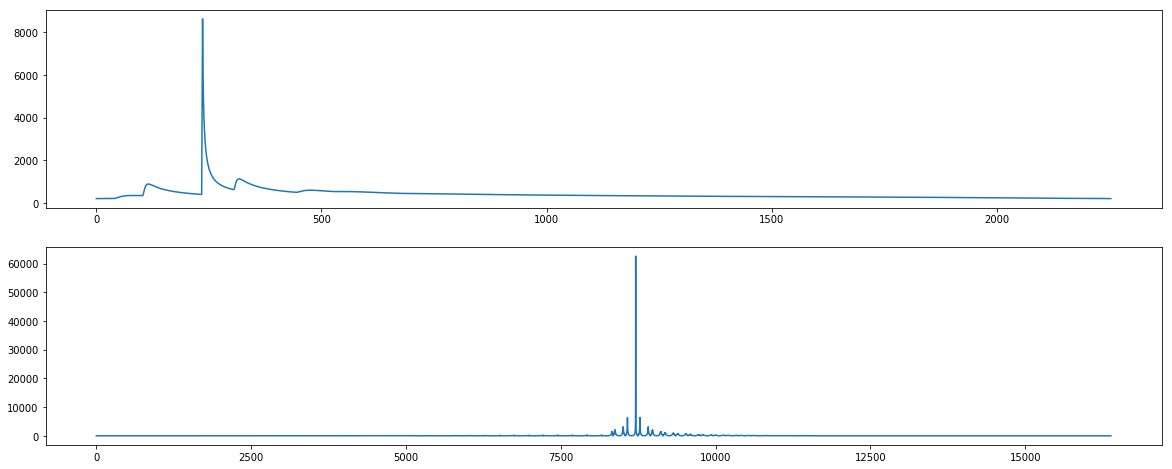

In [15]:
a = pd.Series(Thermal_Histories[1000])
b = pd.Series(Local_Energy_Schedules[1000])

fig,ax = plt.subplots()
fig.set_size_inches(20,8)

plt.subplot(2,1,1)
plt.plot(a)

plt.subplot(2,1,2)
plt.plot(b)

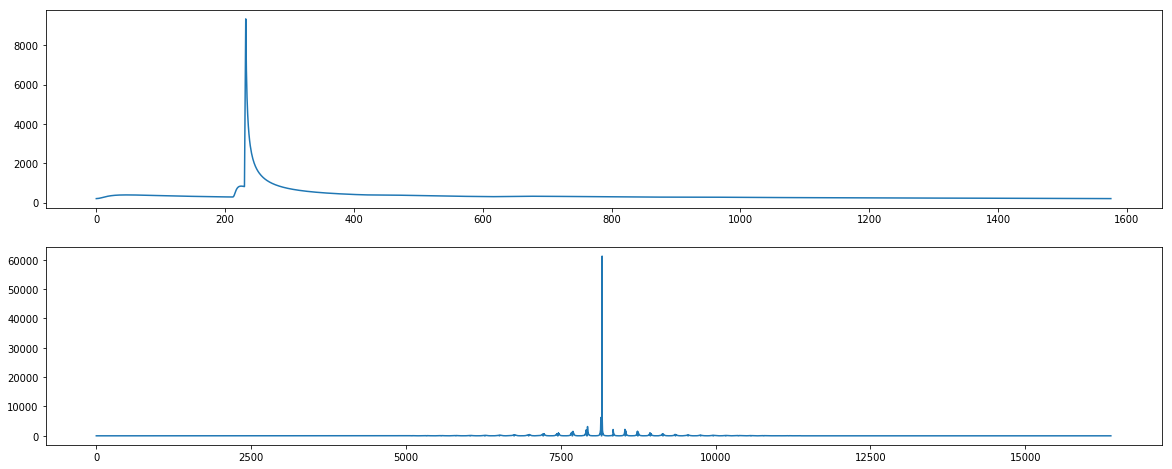

In [16]:
a = pd.Series(Thermal_Histories[100])
b = pd.Series(Local_Energy_Schedules[100])

fig,ax = plt.subplots()
fig.set_size_inches(20,8)

plt.subplot(2,1,1)
plt.plot(a)

plt.subplot(2,1,2)
plt.plot(b)

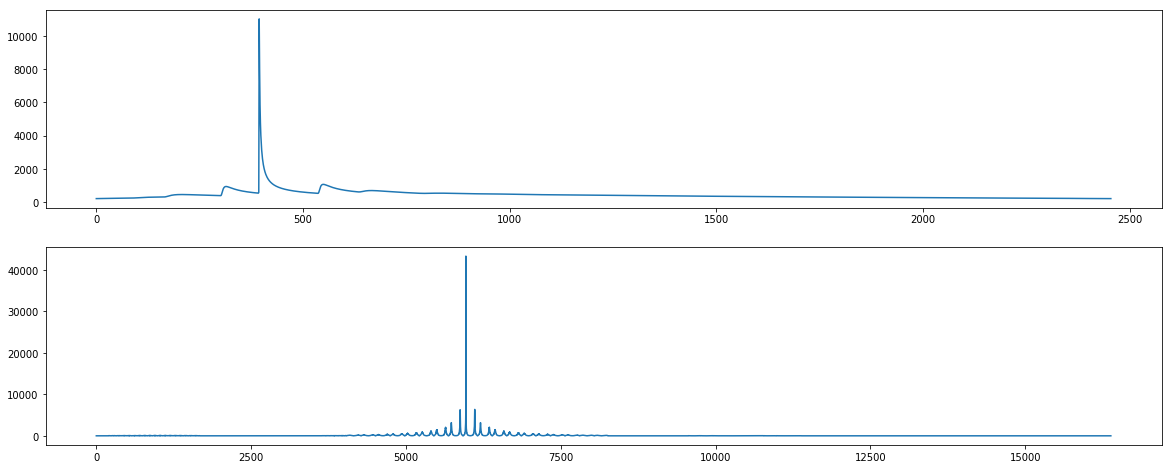

In [17]:
a = pd.Series(Thermal_Histories[1010])
b = pd.Series(Local_Energy_Schedules[1010])

fig,ax = plt.subplots()
fig.set_size_inches(20,8)

plt.subplot(2,1,1)
plt.plot(a)

plt.subplot(2,1,2)
plt.plot(b)

C:\Users\giriprasad.1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


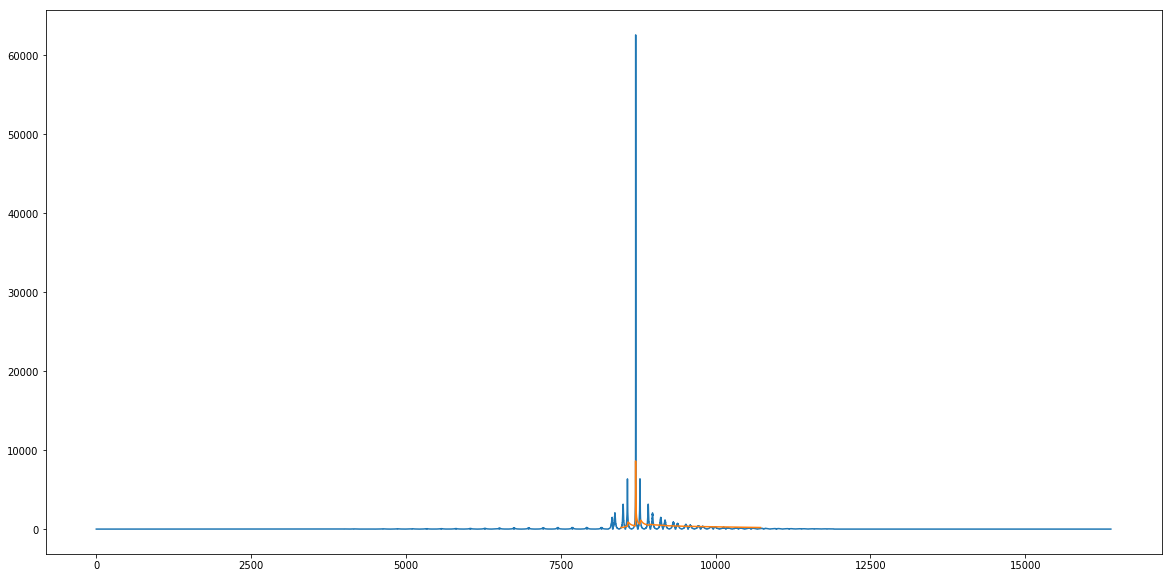

In [18]:
a = pd.Series(Thermal_Histories[1000])
b = pd.Series(Local_Energy_Schedules[1000])


from scipy import signal

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
plt.plot(b.index.values, b)
dx = np.mean(np.diff(b.index.values))
    
shift = (np.argmax(signal.correlate(b, a))-len(a))*dx
plt.plot(a.index.values + shift , a)

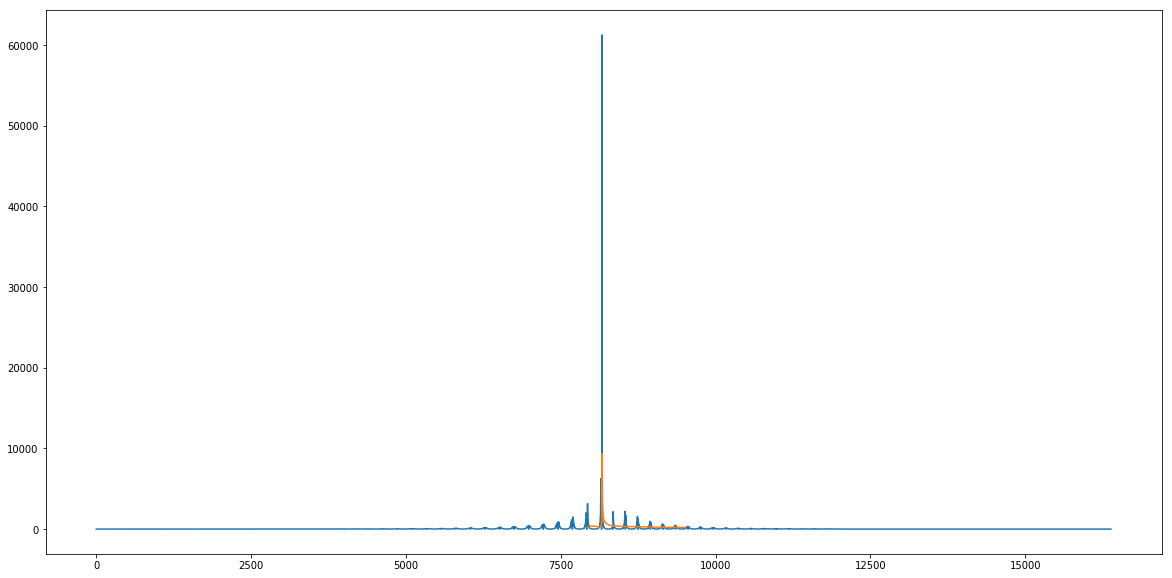

In [19]:
a = pd.Series(Thermal_Histories[100])
b = pd.Series(Local_Energy_Schedules[100])

from scipy import signal

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
plt.plot(b.index.values, b)
dx = np.mean(np.diff(b.index.values))
    
shift = (np.argmax(signal.correlate(b, a))-len(a))*dx
plt.plot(a.index.values  + shift, a)

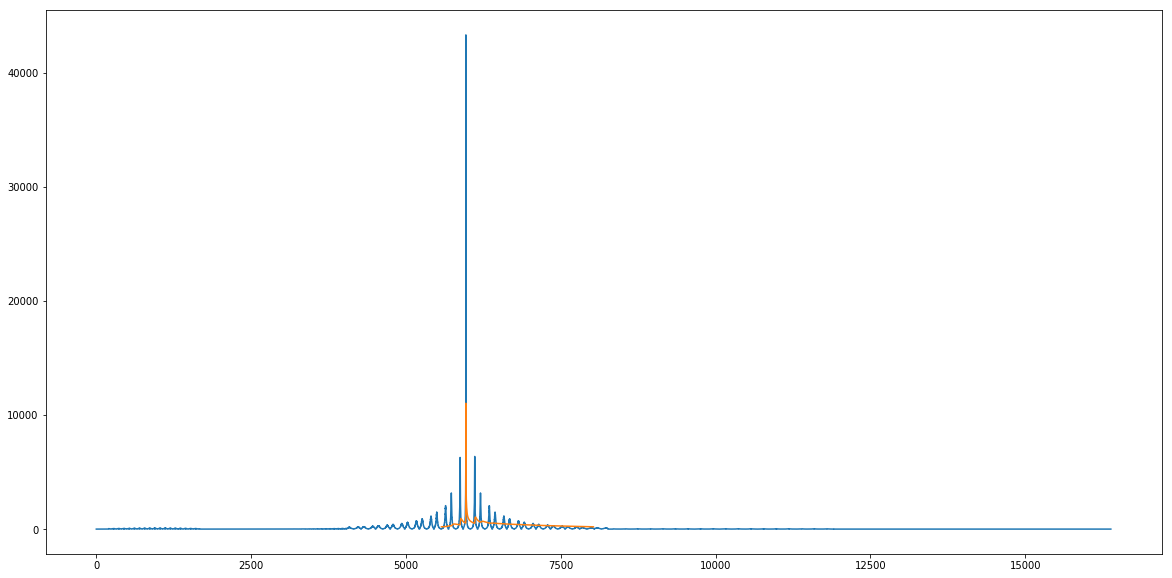

In [20]:
b = pd.Series(Local_Energy_Schedules[1010])
a = pd.Series(Thermal_Histories[1010])

from scipy import signal

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
plt.plot(b.index.values, b)
dx = np.mean(np.diff(b.index.values))
    
shift = (np.argmax(signal.correlate(b, a))-len(a))*dx
plt.plot(a.index.values + shift , a)

In [21]:
for i in range(0,len(Local_Energy_Schedules)):
    Local_Energy_Schedules[i] = pd.Series(Local_Energy_Schedules[i])
    Thermal_Histories[i] = pd.Series(Thermal_Histories[i])

In [22]:
for i in range(0,len(Thermal_Histories)):
    
    dx = np.mean(np.diff(Local_Energy_Schedules[i].index.values))
    
    shift = (np.argmax(signal.correlate(Local_Energy_Schedules[i], Thermal_Histories[i]))-len(Thermal_Histories[i]))*dx
    Thermal_Histories[i].index = Thermal_Histories[i].index.values + int(shift)

In [24]:
from sklearn import preprocessing
from statsmodels.tsa.stattools import grangercausalitytests
count = 0
ind = []
for i in range(0,len(Thermal_Histories)):
    t1 = Local_Energy_Schedules[i]
    t2 = Thermal_Histories[i]
    x = pd.concat([t1,t2],axis=1)
    x = x.dropna()
    if grangercausalitytests(x,maxlag=1)[1][0]['lrtest'][1]<=0.05:
        count+=1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=618.3228, p=0.0000  , df_denom=1781, df_num=1
ssr based chi2 test:   chi2=619.3644, p=0.0000  , df=1
likelihood ratio test: chi2=531.6526, p=0.0000  , df=1
parameter F test:         F=618.3228, p=0.0000  , df_denom=1781, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=486.9672, p=0.0000  , df_denom=2287, df_num=1
ssr based chi2 test:   chi2=487.6060, p=0.0000  , df=1
likelihood ratio test: chi2=442.0561, p=0.0000  , df=1
parameter F test:         F=486.9672, p=0.0000  , df_denom=2287, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=894.6192, p=0.0000  , df_denom=2424, df_num=1
ssr based chi2 test:   chi2=895.7264, p=0.0000  , df=1
likelihood ratio test: chi2=762.3928, p=0.0000  , df=1
parameter F test:         F=894.6192, p=0.0000  , df_denom=2424, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=906.7431, p=0.

ssr based F test:         F=569.6738, p=0.0000  , df_denom=2077, df_num=1
ssr based chi2 test:   chi2=570.4966, p=0.0000  , df=1
likelihood ratio test: chi2=504.1486, p=0.0000  , df=1
parameter F test:         F=569.6738, p=0.0000  , df_denom=2077, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=625.2993, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=626.3502, p=0.0000  , df=1
likelihood ratio test: chi2=536.9945, p=0.0000  , df=1
parameter F test:         F=625.2993, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=925.4272, p=0.0000  , df_denom=2171, df_num=1
ssr based chi2 test:   chi2=926.7060, p=0.0000  , df=1
likelihood ratio test: chi2=771.9027, p=0.0000  , df=1
parameter F test:         F=925.4272, p=0.0000  , df_denom=2171, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=992.5147, p=0.0000  , df_denom=2447, df_num=1
ssr based chi2

likelihood ratio test: chi2=654.5439, p=0.0000  , df=1
parameter F test:         F=803.3640, p=0.0000  , df_denom=1633, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=525.9824, p=0.0000  , df_denom=2319, df_num=1
ssr based chi2 test:   chi2=526.6628, p=0.0000  , df=1
likelihood ratio test: chi2=474.6651, p=0.0000  , df=1
parameter F test:         F=525.9824, p=0.0000  , df_denom=2319, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=751.0707, p=0.0000  , df_denom=2381, df_num=1
ssr based chi2 test:   chi2=752.0171, p=0.0000  , df=1
likelihood ratio test: chi2=653.6303, p=0.0000  , df=1
parameter F test:         F=751.0707, p=0.0000  , df_denom=2381, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=986.5820, p=0.0000  , df_denom=2397, df_num=1
ssr based chi2 test:   chi2=987.8168, p=0.0000  , df=1
likelihood ratio test: chi2=827.3207, p=0.0000  , df=1
parameter F test:         F=986.5

ssr based F test:         F=762.0458, p=0.0000  , df_denom=2347, df_num=1
ssr based chi2 test:   chi2=763.0199, p=0.0000  , df=1
likelihood ratio test: chi2=660.7682, p=0.0000  , df=1
parameter F test:         F=762.0458, p=0.0000  , df_denom=2347, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=762.0952, p=0.0000  , df_denom=2159, df_num=1
ssr based chi2 test:   chi2=763.1541, p=0.0000  , df=1
likelihood ratio test: chi2=653.6017, p=0.0000  , df=1
parameter F test:         F=762.0952, p=0.0000  , df_denom=2159, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=488.3583, p=0.0000  , df_denom=1993, df_num=1
ssr based chi2 test:   chi2=489.0934, p=0.0000  , df=1
likelihood ratio test: chi2=437.4535, p=0.0000  , df=1
parameter F test:         F=488.3583, p=0.0000  , df_denom=1993, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1097.3101, p=0.0000  , df_denom=1125, df_num=1
ssr based chi

likelihood ratio test: chi2=2074.9530, p=0.0000  , df=1
parameter F test:         F=2394.6193, p=0.0000  , df_denom=7386, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=861.3602, p=0.0000  , df_denom=2125, df_num=1
ssr based chi2 test:   chi2=862.5762, p=0.0000  , df=1
likelihood ratio test: chi2=724.1233, p=0.0000  , df=1
parameter F test:         F=861.3602, p=0.0000  , df_denom=2125, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=704.2008, p=0.0000  , df_denom=2081, df_num=1
ssr based chi2 test:   chi2=705.2160, p=0.0000  , df=1
likelihood ratio test: chi2=607.4264, p=0.0000  , df=1
parameter F test:         F=704.2008, p=0.0000  , df_denom=2081, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2451.3176, p=0.0000  , df_denom=8266, df_num=1
ssr based chi2 test:   chi2=2452.2072, p=0.0000  , df=1
likelihood ratio test: chi2=2147.5435, p=0.0000  , df=1
parameter F test:         F=

ssr based F test:         F=410.5199, p=0.0000  , df_denom=1849, df_num=1
ssr based chi2 test:   chi2=411.1860, p=0.0000  , df=1
likelihood ratio test: chi2=371.3397, p=0.0000  , df=1
parameter F test:         F=410.5199, p=0.0000  , df_denom=1849, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=576.4906, p=0.0000  , df_denom=1879, df_num=1
ssr based chi2 test:   chi2=577.4110, p=0.0000  , df=1
likelihood ratio test: chi2=503.5985, p=0.0000  , df=1
parameter F test:         F=576.4906, p=0.0000  , df_denom=1879, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=483.2264, p=0.0000  , df_denom=1792, df_num=1
ssr based chi2 test:   chi2=484.0353, p=0.0000  , df=1
likelihood ratio test: chi2=428.5513, p=0.0000  , df=1
parameter F test:         F=483.2264, p=0.0000  , df_denom=1792, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=677.3099, p=0.0000  , df_denom=2334, df_num=1
ssr based chi2

ssr based F test:         F=613.9519, p=0.0000  , df_denom=1830, df_num=1
ssr based chi2 test:   chi2=614.9583, p=0.0000  , df=1
likelihood ratio test: chi2=530.2876, p=0.0000  , df=1
parameter F test:         F=613.9519, p=0.0000  , df_denom=1830, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=713.1182, p=0.0000  , df_denom=1906, df_num=1
ssr based chi2 test:   chi2=714.2407, p=0.0000  , df=1
likelihood ratio test: chi2=606.7392, p=0.0000  , df=1
parameter F test:         F=713.1182, p=0.0000  , df_denom=1906, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=406.2725, p=0.0000  , df_denom=1516, df_num=1
ssr based chi2 test:   chi2=407.0765, p=0.0000  , df=1
likelihood ratio test: chi2=360.6604, p=0.0000  , df=1
parameter F test:         F=406.2725, p=0.0000  , df_denom=1516, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=841.2895, p=0.0000  , df_denom=1931, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=502.5677, p=0.0000  , df_denom=2338, df_num=1
ssr based chi2 test:   chi2=503.2126, p=0.0000  , df=1
likelihood ratio test: chi2=455.8116, p=0.0000  , df=1
parameter F test:         F=502.5677, p=0.0000  , df_denom=2338, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=594.1241, p=0.0000  , df_denom=1886, df_num=1
ssr based chi2 test:   chi2=595.0692, p=0.0000  , df=1
likelihood ratio test: chi2=517.3035, p=0.0000  , df=1
parameter F test:         F=594.1241, p=0.0000  , df_denom=1886, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=406.7788, p=0.0000  , df_denom=1907, df_num=1
ssr based chi2 test:   chi2=407.4187, p=0.0000  , df=1
likelihood ratio test: chi2=369.2998, p=0.0000  , df=1
parameter F test:         F=406.7788, p=0.0000  , df_denom=1907, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=452.7488, p=0.

ssr based F test:         F=988.2304, p=0.0000  , df_denom=2226, df_num=1
ssr based chi2 test:   chi2=989.5622, p=0.0000  , df=1
likelihood ratio test: chi2=818.8938, p=0.0000  , df=1
parameter F test:         F=988.2304, p=0.0000  , df_denom=2226, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=362.2241, p=0.0000  , df_denom=1603, df_num=1
ssr based chi2 test:   chi2=362.9020, p=0.0000  , df=1
likelihood ratio test: chi2=327.1894, p=0.0000  , df=1
parameter F test:         F=362.2241, p=0.0000  , df_denom=1603, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=466.7321, p=0.0000  , df_denom=2063, df_num=1
ssr based chi2 test:   chi2=467.4108, p=0.0000  , df=1
likelihood ratio test: chi2=421.3652, p=0.0000  , df=1
parameter F test:         F=466.7321, p=0.0000  , df_denom=2063, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=954.9814, p=0.0000  , df_denom=1872, df_num=1
ssr based chi2

likelihood ratio test: chi2=2330.6599, p=0.0000  , df=1
parameter F test:         F=3413.4756, p=0.0000  , df_denom=3226, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1155.0622, p=0.0000  , df_denom=1673, df_num=1
ssr based chi2 test:   chi2=1157.1334, p=0.0000  , df=1
likelihood ratio test: chi2=879.8553, p=0.0000  , df=1
parameter F test:         F=1155.0622, p=0.0000  , df_denom=1673, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=493.7662, p=0.0000  , df_denom=2307, df_num=1
ssr based chi2 test:   chi2=494.4083, p=0.0000  , df=1
likelihood ratio test: chi2=448.0131, p=0.0000  , df=1
parameter F test:         F=493.7662, p=0.0000  , df_denom=2307, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2087.4154, p=0.0000  , df_denom=6955, df_num=1
ssr based chi2 test:   chi2=2088.3158, p=0.0000  , df=1
likelihood ratio test: chi2=1826.2350, p=0.0000  , df=1
parameter F test:        

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=448.5338, p=0.0000  , df_denom=1786, df_num=1
ssr based chi2 test:   chi2=449.2872, p=0.0000  , df=1
likelihood ratio test: chi2=400.8328, p=0.0000  , df=1
parameter F test:         F=448.5338, p=0.0000  , df_denom=1786, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=575.7111, p=0.0000  , df_denom=2301, df_num=1
ssr based chi2 test:   chi2=576.4617, p=0.0000  , df=1
likelihood ratio test: chi2=514.4921, p=0.0000  , df=1
parameter F test:         F=575.7111, p=0.0000  , df_denom=2301, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=722.3112, p=0.0000  , df_denom=1636, df_num=1
ssr based chi2 test:   chi2=723.6358, p=0.0000  , df=1
likelihood ratio test: chi2=599.3684, p=0.0000  , df=1
parameter F test:         F=722.3112, p=0.0000  , df_denom=1636, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=673.0661, p=0.0


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=635.4474, p=0.0000  , df_denom=1731, df_num=1
ssr based chi2 test:   chi2=636.5487, p=0.0000  , df=1
likelihood ratio test: chi2=542.2054, p=0.0000  , df=1
parameter F test:         F=635.4474, p=0.0000  , df_denom=1731, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=841.3846, p=0.0000  , df_denom=2125, df_num=1
ssr based chi2 test:   chi2=842.5724, p=0.0000  , df=1
likelihood ratio test: chi2=709.8414, p=0.0000  , df=1
parameter F test:         F=841.3846, p=0.0000  , df_denom=2125, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=732.8718, p=0.0000  , df_denom=1687, df_num=1
ssr based chi2 test:   chi2=734.1750, p=0.0000  , df=1
likelihood ratio test: chi2=609.6890, p=0.0000  , df=1
parameter F test:         F=732.8718, p=0.0000  , df_denom=1687, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=502.5267, p=0.

likelihood ratio test: chi2=699.2693, p=0.0000  , df=1
parameter F test:         F=847.9432, p=0.0000  , df_denom=1852, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=713.3269, p=0.0000  , df_denom=2164, df_num=1
ssr based chi2 test:   chi2=714.3158, p=0.0000  , df=1
likelihood ratio test: chi2=617.3855, p=0.0000  , df=1
parameter F test:         F=713.3269, p=0.0000  , df_denom=2164, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1151.9333, p=0.0000  , df_denom=2437, df_num=1
ssr based chi2 test:   chi2=1153.3513, p=0.0000  , df=1
likelihood ratio test: chi2=944.4929, p=0.0000  , df=1
parameter F test:         F=1151.9333, p=0.0000  , df_denom=2437, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=600.8478, p=0.0000  , df_denom=1796, df_num=1
ssr based chi2 test:   chi2=601.8514, p=0.0000  , df=1
likelihood ratio test: chi2=519.1779, p=0.0000  , df=1
parameter F test:         F=60

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=712.9928, p=0.0000  , df_denom=2170, df_num=1
ssr based chi2 test:   chi2=713.9786, p=0.0000  , df=1
likelihood ratio test: chi2=617.3531, p=0.0000  , df=1
parameter F test:         F=712.9928, p=0.0000  , df_denom=2170, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=871.1546, p=0.0000  , df_denom=2208, df_num=1
ssr based chi2 test:   chi2=872.3382, p=0.0000  , df=1
likelihood ratio test: chi2=735.3077, p=0.0000  , df=1
parameter F test:         F=871.1546, p=0.0000  , df_denom=2208, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=729.5257, p=0.0000  , df_denom=1761, df_num=1
ssr based chi2 test:   chi2=730.7685, p=0.0000  , df=1
likelihood ratio test: chi2=611.4235, p=0.0000  , df=1
parameter F test:         F=729.5257, p=0.0000  , df_denom=1761, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=515.9135, p=0.0

ssr based F test:         F=797.2966, p=0.0000  , df_denom=2412, df_num=1
ssr based chi2 test:   chi2=798.2883, p=0.0000  , df=1
likelihood ratio test: chi2=689.7132, p=0.0000  , df=1
parameter F test:         F=797.2966, p=0.0000  , df_denom=2412, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=870.2995, p=0.0000  , df_denom=2325, df_num=1
ssr based chi2 test:   chi2=871.4225, p=0.0000  , df=1
likelihood ratio test: chi2=740.2127, p=0.0000  , df=1
parameter F test:         F=870.2995, p=0.0000  , df_denom=2325, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=909.9403, p=0.0000  , df_denom=2266, df_num=1
ssr based chi2 test:   chi2=911.1449, p=0.0000  , df=1
likelihood ratio test: chi2=765.9862, p=0.0000  , df=1
parameter F test:         F=909.9403, p=0.0000  , df_denom=2266, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=734.7713, p=0.0000  , df_denom=2036, df_num=1
ssr based chi2

ssr based F test:         F=427.8784, p=0.0000  , df_denom=2505, df_num=1
ssr based chi2 test:   chi2=428.3909, p=0.0000  , df=1
likelihood ratio test: chi2=395.5006, p=0.0000  , df=1
parameter F test:         F=427.8784, p=0.0000  , df_denom=2505, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=926.9767, p=0.0000  , df_denom=2451, df_num=1
ssr based chi2 test:   chi2=928.1113, p=0.0000  , df=1
likelihood ratio test: chi2=787.1961, p=0.0000  , df=1
parameter F test:         F=926.9767, p=0.0000  , df_denom=2451, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=795.7577, p=0.0000  , df_denom=1797, df_num=1
ssr based chi2 test:   chi2=797.0862, p=0.0000  , df=1
likelihood ratio test: chi2=659.8862, p=0.0000  , df=1
parameter F test:         F=795.7577, p=0.0000  , df_denom=1797, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=441.4013, p=0.0000  , df_denom=1956, df_num=1
ssr based chi2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=447.1394, p=0.0000  , df_denom=2369, df_num=1
ssr based chi2 test:   chi2=447.7057, p=0.0000  , df=1
likelihood ratio test: chi2=410.1165, p=0.0000  , df=1
parameter F test:         F=447.1394, p=0.0000  , df_denom=2369, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1655.1756, p=0.0000  , df_denom=2036, df_num=1
ssr based chi2 test:   chi2=1657.6145, p=0.0000  , df=1
likelihood ratio test: chi2=1213.1192, p=0.0000  , df=1
parameter F test:         F=1655.1756, p=0.0000  , df_denom=2036, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1035.0028, p=0.0000  , df_denom=2172, df_num=1
ssr based chi2 test:   chi2=1036.4323, p=0.0000  , df=1
likelihood ratio test: chi2=847.5722, p=0.0000  , df=1
parameter F test:         F=1035.0028, p=0.0000  , df_denom=2172, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=840.4396

ssr based F test:         F=813.5759, p=0.0000  , df_denom=2421, df_num=1
ssr based chi2 test:   chi2=814.5841, p=0.0000  , df=1
likelihood ratio test: chi2=702.2744, p=0.0000  , df=1
parameter F test:         F=813.5759, p=0.0000  , df_denom=2421, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1121.1612, p=0.0000  , df_denom=1738, df_num=1
ssr based chi2 test:   chi2=1123.0965, p=0.0000  , df=1
likelihood ratio test: chi2=866.6581, p=0.0000  , df=1
parameter F test:         F=1121.1612, p=0.0000  , df_denom=1738, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=846.0640, p=0.0000  , df_denom=2165, df_num=1
ssr based chi2 test:   chi2=847.2364, p=0.0000  , df=1
likelihood ratio test: chi2=715.1650, p=0.0000  , df=1
parameter F test:         F=846.0640, p=0.0000  , df_denom=2165, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=999.2122, p=0.0000  , df_denom=1711, df_num=1
ssr based c


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1196.7217, p=0.0000  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1198.5096, p=0.0000  , df=1
likelihood ratio test: chi2=940.1145, p=0.0000  , df=1
parameter F test:         F=1196.7217, p=0.0000  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=820.2606, p=0.0000  , df_denom=1673, df_num=1
ssr based chi2 test:   chi2=821.7315, p=0.0000  , df=1
likelihood ratio test: chi2=668.6786, p=0.0000  , df=1
parameter F test:         F=820.2606, p=0.0000  , df_denom=1673, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=685.0344, p=0.0000  , df_denom=1717, df_num=1
ssr based chi2 test:   chi2=686.2313, p=0.0000  , df=1
likelihood ratio test: chi2=577.4684, p=0.0000  , df=1
parameter F test:         F=685.0344, p=0.0000  , df_denom=1717, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=721.4177, p

likelihood ratio test: chi2=468.4444, p=0.0000  , df=1
parameter F test:         F=550.3130, p=0.0000  , df_denom=1471, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=743.6077, p=0.0000  , df_denom=2146, df_num=1
ssr based chi2 test:   chi2=744.6472, p=0.0000  , df=1
likelihood ratio test: chi2=639.3600, p=0.0000  , df=1
parameter F test:         F=743.6077, p=0.0000  , df_denom=2146, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=857.8642, p=0.0000  , df_denom=1914, df_num=1
ssr based chi2 test:   chi2=859.2088, p=0.0000  , df=1
likelihood ratio test: chi2=709.9126, p=0.0000  , df=1
parameter F test:         F=857.8642, p=0.0000  , df_denom=1914, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=616.6296, p=0.0000  , df_denom=2374, df_num=1
ssr based chi2 test:   chi2=617.4088, p=0.0000  , df=1
likelihood ratio test: chi2=548.8675, p=0.0000  , df=1
parameter F test:         F=616.6


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=584.9007, p=0.0000  , df_denom=2059, df_num=1
ssr based chi2 test:   chi2=585.7530, p=0.0000  , df=1
likelihood ratio test: chi2=515.5721, p=0.0000  , df=1
parameter F test:         F=584.9007, p=0.0000  , df_denom=2059, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1423.9995, p=0.0000  , df_denom=1471, df_num=1
ssr based chi2 test:   chi2=1426.9037, p=0.0000  , df=1
likelihood ratio test: chi2=997.9606, p=0.0000  , df=1
parameter F test:         F=1423.9995, p=0.0000  , df_denom=1471, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=862.2055, p=0.0000  , df_denom=1786, df_num=1
ssr based chi2 test:   chi2=863.6537, p=0.0000  , df=1
likelihood ratio test: chi2=704.6938, p=0.0000  , df=1
parameter F test:         F=862.2055, p=0.0000  , df_denom=1786, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1034.2335, 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=684.4493, p=0.0000  , df_denom=1756, df_num=1
ssr based chi2 test:   chi2=685.6186, p=0.0000  , df=1
likelihood ratio test: chi2=578.9637, p=0.0000  , df=1
parameter F test:         F=684.4493, p=0.0000  , df_denom=1756, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=418.7774, p=0.0000  , df_denom=1672, df_num=1
ssr based chi2 test:   chi2=419.5288, p=0.0000  , df=1
likelihood ratio test: chi2=374.3883, p=0.0000  , df=1
parameter F test:         F=418.7774, p=0.0000  , df_denom=1672, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=747.4512, p=0.0000  , df_denom=1771, df_num=1
ssr based chi2 test:   chi2=748.7174, p=0.0000  , df=1
likelihood ratio test: chi2=624.6250, p=0.0000  , df=1
parameter F test:         F=747.4512, p=0.0000  , df_denom=1771, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=489.2462, p=0.

likelihood ratio test: chi2=650.0206, p=0.0000  , df=1
parameter F test:         F=745.5424, p=0.0000  , df_denom=2399, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1038.3125, p=0.0000  , df_denom=2138, df_num=1
ssr based chi2 test:   chi2=1039.7694, p=0.0000  , df=1
likelihood ratio test: chi2=847.5151, p=0.0000  , df=1
parameter F test:         F=1038.3125, p=0.0000  , df_denom=2138, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=642.8027, p=0.0000  , df_denom=2326, df_num=1
ssr based chi2 test:   chi2=643.6317, p=0.0000  , df=1
likelihood ratio test: chi2=568.2962, p=0.0000  , df=1
parameter F test:         F=642.8027, p=0.0000  , df_denom=2326, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=571.7367, p=0.0000  , df_denom=1357, df_num=1
ssr based chi2 test:   chi2=573.0007, p=0.0000  , df=1
likelihood ratio test: chi2=478.1608, p=0.0000  , df=1
parameter F test:         F=57

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=795.2542, p=0.0000  , df_denom=1711, df_num=1
ssr based chi2 test:   chi2=796.6486, p=0.0000  , df=1
likelihood ratio test: chi2=654.2532, p=0.0000  , df=1
parameter F test:         F=795.2542, p=0.0000  , df_denom=1711, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=716.7659, p=0.0000  , df_denom=1849, df_num=1
ssr based chi2 test:   chi2=717.9288, p=0.0000  , df=1
likelihood ratio test: chi2=606.7376, p=0.0000  , df=1
parameter F test:         F=716.7659, p=0.0000  , df_denom=1849, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=492.4497, p=0.0000  , df_denom=2128, df_num=1
ssr based chi2 test:   chi2=493.1440, p=0.0000  , df=1
likelihood ratio test: chi2=443.5962, p=0.0000  , df=1
parameter F test:         F=492.4497, p=0.0000  , df_denom=2128, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=478.3754, p=0.0

ssr based F test:         F=777.5734, p=0.0000  , df_denom=1632, df_num=1
ssr based chi2 test:   chi2=779.0028, p=0.0000  , df=1
likelihood ratio test: chi2=637.0671, p=0.0000  , df=1
parameter F test:         F=777.5734, p=0.0000  , df_denom=1632, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=683.6336, p=0.0000  , df_denom=2335, df_num=1
ssr based chi2 test:   chi2=684.5119, p=0.0000  , df=1
likelihood ratio test: chi2=600.3806, p=0.0000  , df=1
parameter F test:         F=683.6336, p=0.0000  , df_denom=2335, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=577.7416, p=0.0000  , df_denom=2374, df_num=1
ssr based chi2 test:   chi2=578.4717, p=0.0000  , df=1
likelihood ratio test: chi2=517.7559, p=0.0000  , df=1
parameter F test:         F=577.7416, p=0.0000  , df_denom=2374, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=624.5477, p=0.0000  , df_denom=2311, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=526.6413, p=0.0000  , df_denom=2196, df_num=1
ssr based chi2 test:   chi2=527.3608, p=0.0000  , df=1
likelihood ratio test: chi2=472.7079, p=0.0000  , df=1
parameter F test:         F=526.6413, p=0.0000  , df_denom=2196, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=635.5637, p=0.0000  , df_denom=1892, df_num=1
ssr based chi2 test:   chi2=636.5715, p=0.0000  , df=1
likelihood ratio test: chi2=548.8326, p=0.0000  , df=1
parameter F test:         F=635.5637, p=0.0000  , df_denom=1892, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=480.6447, p=0.0000  , df_denom=1509, df_num=1
ssr based chi2 test:   chi2=481.6003, p=0.0000  , df=1
likelihood ratio test: chi2=418.0815, p=0.0000  , df=1
parameter F test:         F=480.6447, p=0.0000  , df_denom=1509, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=676.2957, p=0.

ssr based F test:         F=582.7596, p=0.0000  , df_denom=2329, df_num=1
ssr based chi2 test:   chi2=583.5103, p=0.0000  , df=1
likelihood ratio test: chi2=520.7789, p=0.0000  , df=1
parameter F test:         F=582.7596, p=0.0000  , df_denom=2329, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=420.1362, p=0.0000  , df_denom=2231, df_num=1
ssr based chi2 test:   chi2=420.7012, p=0.0000  , df=1
likelihood ratio test: chi2=385.4508, p=0.0000  , df=1
parameter F test:         F=420.1362, p=0.0000  , df_denom=2231, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=665.1113, p=0.0000  , df_denom=2347, df_num=1
ssr based chi2 test:   chi2=665.9615, p=0.0000  , df=1
likelihood ratio test: chi2=586.3329, p=0.0000  , df=1
parameter F test:         F=665.1113, p=0.0000  , df_denom=2347, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=903.9851, p=0.0000  , df_denom=1930, df_num=1
ssr based chi2

ssr based F test:         F=2235.9689, p=0.0000  , df_denom=6516, df_num=1
ssr based chi2 test:   chi2=2236.9983, p=0.0000  , df=1
likelihood ratio test: chi2=1923.2223, p=0.0000  , df=1
parameter F test:         F=2235.9689, p=0.0000  , df_denom=6516, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=681.6324, p=0.0000  , df_denom=2230, df_num=1
ssr based chi2 test:   chi2=682.5494, p=0.0000  , df=1
likelihood ratio test: chi2=595.5686, p=0.0000  , df=1
parameter F test:         F=681.6324, p=0.0000  , df_denom=2230, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1191.7661, p=0.0000  , df_denom=3772, df_num=1
ssr based chi2 test:   chi2=1192.7140, p=0.0000  , df=1
likelihood ratio test: chi2=1036.4617, p=0.0000  , df=1
parameter F test:         F=1191.7661, p=0.0000  , df_denom=3772, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=729.3496, p=0.0000  , df_denom=2267, df_num=1
ssr ba

ssr based F test:         F=394.9359, p=0.0000  , df_denom=1471, df_num=1
ssr based chi2 test:   chi2=395.7414, p=0.0000  , df=1
likelihood ratio test: chi2=350.5471, p=0.0000  , df=1
parameter F test:         F=394.9359, p=0.0000  , df_denom=1471, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=623.9563, p=0.0000  , df_denom=1950, df_num=1
ssr based chi2 test:   chi2=624.9163, p=0.0000  , df=1
likelihood ratio test: chi2=542.1817, p=0.0000  , df=1
parameter F test:         F=623.9563, p=0.0000  , df_denom=1950, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=571.7015, p=0.0000  , df_denom=2086, df_num=1
ssr based chi2 test:   chi2=572.5237, p=0.0000  , df=1
likelihood ratio test: chi2=505.9836, p=0.0000  , df=1
parameter F test:         F=571.7015, p=0.0000  , df_denom=2086, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2193.0641, p=0.0000  , df_denom=8004, df_num=1
ssr based chi

ssr based F test:         F=412.4031, p=0.0000  , df_denom=1841, df_num=1
ssr based chi2 test:   chi2=413.0751, p=0.0000  , df=1
likelihood ratio test: chi2=372.7326, p=0.0000  , df=1
parameter F test:         F=412.4031, p=0.0000  , df_denom=1841, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=741.3947, p=0.0000  , df_denom=2232, df_num=1
ssr based chi2 test:   chi2=742.3912, p=0.0000  , df=1
likelihood ratio test: chi2=641.0120, p=0.0000  , df=1
parameter F test:         F=741.3947, p=0.0000  , df_denom=2232, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=803.5751, p=0.0000  , df_denom=2414, df_num=1
ssr based chi2 test:   chi2=804.5737, p=0.0000  , df=1
likelihood ratio test: chi2=694.5077, p=0.0000  , df=1
parameter F test:         F=803.5751, p=0.0000  , df_denom=2414, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=855.5840, p=0.0000  , df_denom=2038, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1211.7516, p=0.0000  , df_denom=1595, df_num=1
ssr based chi2 test:   chi2=1214.0308, p=0.0000  , df=1
likelihood ratio test: chi2=903.1162, p=0.0000  , df=1
parameter F test:         F=1211.7516, p=0.0000  , df_denom=1595, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=723.1984, p=0.0000  , df_denom=2326, df_num=1
ssr based chi2 test:   chi2=724.1312, p=0.0000  , df=1
likelihood ratio test: chi2=630.5271, p=0.0000  , df=1
parameter F test:         F=723.1984, p=0.0000  , df_denom=2326, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=625.3013, p=0.0000  , df_denom=2166, df_num=1
ssr based chi2 test:   chi2=626.1674, p=0.0000  , df=1
likelihood ratio test: chi2=550.1143, p=0.0000  , df=1
parameter F test:         F=625.3013, p=0.0000  , df_denom=2166, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1191.2160, 

ssr based F test:         F=752.4281, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=753.6927, p=0.0000  , df=1
likelihood ratio test: chi2=628.8979, p=0.0000  , df=1
parameter F test:         F=752.4281, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=709.4050, p=0.0000  , df_denom=1784, df_num=1
ssr based chi2 test:   chi2=710.5979, p=0.0000  , df=1
likelihood ratio test: chi2=598.2719, p=0.0000  , df=1
parameter F test:         F=709.4050, p=0.0000  , df_denom=1784, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=503.6837, p=0.0000  , df_denom=1621, df_num=1
ssr based chi2 test:   chi2=504.6158, p=0.0000  , df=1
likelihood ratio test: chi2=439.4214, p=0.0000  , df=1
parameter F test:         F=503.6837, p=0.0000  , df_denom=1621, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=761.6550, p=0.0000  , df_denom=1732, df_num=1
ssr based chi2

ssr based F test:         F=522.4234, p=0.0000  , df_denom=2172, df_num=1
ssr based chi2 test:   chi2=523.1450, p=0.0000  , df=1
likelihood ratio test: chi2=468.7904, p=0.0000  , df=1
parameter F test:         F=522.4234, p=0.0000  , df_denom=2172, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=672.3860, p=0.0000  , df_denom=2324, df_num=1
ssr based chi2 test:   chi2=673.2540, p=0.0000  , df=1
likelihood ratio test: chi2=591.3304, p=0.0000  , df=1
parameter F test:         F=672.3860, p=0.0000  , df_denom=2324, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=705.3706, p=0.0000  , df_denom=1706, df_num=1
ssr based chi2 test:   chi2=706.6110, p=0.0000  , df=1
likelihood ratio test: chi2=591.3889, p=0.0000  , df=1
parameter F test:         F=705.3706, p=0.0000  , df_denom=1706, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1427.0702, p=0.0000  , df_denom=1612, df_num=1
ssr based chi

ssr based F test:         F=714.1469, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=715.3472, p=0.0000  , df=1
likelihood ratio test: chi2=601.7175, p=0.0000  , df=1
parameter F test:         F=714.1469, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=531.8935, p=0.0000  , df_denom=2177, df_num=1
ssr based chi2 test:   chi2=532.6264, p=0.0000  , df=1
likelihood ratio test: chi2=476.5315, p=0.0000  , df=1
parameter F test:         F=531.8935, p=0.0000  , df_denom=2177, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1512.0584, p=0.0000  , df_denom=1423, df_num=1
ssr based chi2 test:   chi2=1515.2461, p=0.0000  , df=1
likelihood ratio test: chi2=1032.3670, p=0.0000  , df=1
parameter F test:         F=1512.0584, p=0.0000  , df_denom=1423, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=733.4486, p=0.0000  , df_denom=1354, df_num=1
ssr based 

ssr based F test:         F=756.8635, p=0.0000  , df_denom=1906, df_num=1
ssr based chi2 test:   chi2=758.0548, p=0.0000  , df=1
likelihood ratio test: chi2=638.3605, p=0.0000  , df=1
parameter F test:         F=756.8635, p=0.0000  , df_denom=1906, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2475.1594, p=0.0000  , df_denom=5936, df_num=1
ssr based chi2 test:   chi2=2476.4103, p=0.0000  , df=1
likelihood ratio test: chi2=2069.8829, p=0.0000  , df=1
parameter F test:         F=2475.1594, p=0.0000  , df_denom=5936, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=687.6201, p=0.0000  , df_denom=1738, df_num=1
ssr based chi2 test:   chi2=688.8071, p=0.0000  , df=1
likelihood ratio test: chi2=580.3662, p=0.0000  , df=1
parameter F test:         F=687.6201, p=0.0000  , df_denom=1738, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=588.6493, p=0.0000  , df_denom=2432, df_num=1
ssr based 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=612.1006, p=0.0000  , df_denom=1703, df_num=1
ssr based chi2 test:   chi2=613.1788, p=0.0000  , df=1
likelihood ratio test: chi2=523.8473, p=0.0000  , df=1
parameter F test:         F=612.1006, p=0.0000  , df_denom=1703, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=594.9693, p=0.0000  , df_denom=2084, df_num=1
ssr based chi2 test:   chi2=595.8258, p=0.0000  , df=1
likelihood ratio test: chi2=524.1355, p=0.0000  , df=1
parameter F test:         F=594.9693, p=0.0000  , df_denom=2084, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=807.7272, p=0.0000  , df_denom=2410, df_num=1
ssr based chi2 test:   chi2=808.7327, p=0.0000  , df=1
likelihood ratio test: chi2=697.4741, p=0.0000  , df=1
parameter F test:         F=807.7272, p=0.0000  , df_denom=2410, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2395.9215, p=0


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=673.1325, p=0.0000  , df_denom=1615, df_num=1
ssr based chi2 test:   chi2=674.3829, p=0.0000  , df=1
likelihood ratio test: chi2=563.7128, p=0.0000  , df=1
parameter F test:         F=673.1325, p=0.0000  , df_denom=1615, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=622.6158, p=0.0000  , df_denom=2439, df_num=1
ssr based chi2 test:   chi2=623.3817, p=0.0000  , df=1
likelihood ratio test: chi2=555.2002, p=0.0000  , df=1
parameter F test:         F=622.6158, p=0.0000  , df_denom=2439, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=836.4347, p=0.0000  , df_denom=1330, df_num=1
ssr based chi2 test:   chi2=838.3214, p=0.0000  , df=1
likelihood ratio test: chi2=650.3759, p=0.0000  , df=1
parameter F test:         F=836.4347, p=0.0000  , df_denom=1330, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1021.6187, p=0

ssr based F test:         F=850.9326, p=0.0000  , df_denom=2452, df_num=1
ssr based chi2 test:   chi2=851.9737, p=0.0000  , df=1
likelihood ratio test: chi2=731.3610, p=0.0000  , df=1
parameter F test:         F=850.9326, p=0.0000  , df_denom=2452, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=596.4878, p=0.0000  , df_denom=2431, df_num=1
ssr based chi2 test:   chi2=597.2239, p=0.0000  , df=1
likelihood ratio test: chi2=534.0938, p=0.0000  , df=1
parameter F test:         F=596.4878, p=0.0000  , df_denom=2431, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=615.2685, p=0.0000  , df_denom=1714, df_num=1
ssr based chi2 test:   chi2=616.3454, p=0.0000  , df=1
likelihood ratio test: chi2=526.6459, p=0.0000  , df=1
parameter F test:         F=615.2685, p=0.0000  , df_denom=1714, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=805.2722, p=0.0000  , df_denom=2406, df_num=1
ssr based chi2

parameter F test:         F=1666.4445, p=0.0000  , df_denom=1613, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=986.5811, p=0.0000  , df_denom=2375, df_num=1
ssr based chi2 test:   chi2=987.8273, p=0.0000  , df=1
likelihood ratio test: chi2=826.1505, p=0.0000  , df=1
parameter F test:         F=986.5811, p=0.0000  , df_denom=2375, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=812.4384, p=0.0000  , df_denom=2088, df_num=1
ssr based chi2 test:   chi2=813.6057, p=0.0000  , df=1
likelihood ratio test: chi2=687.2181, p=0.0000  , df=1
parameter F test:         F=812.4384, p=0.0000  , df_denom=2088, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=732.6316, p=0.0000  , df_denom=2428, df_num=1
ssr based chi2 test:   chi2=733.5369, p=0.0000  , df=1
likelihood ratio test: chi2=641.0645, p=0.0000  , df=1
parameter F test:         F=732.6316, p=0.0000  , df_denom=2428, df_num=1

Granger Caus

parameter F test:         F=478.3993, p=0.0000  , df_denom=2455, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=720.7633, p=0.0000  , df_denom=2346, df_num=1
ssr based chi2 test:   chi2=721.6850, p=0.0000  , df=1
likelihood ratio test: chi2=629.3228, p=0.0000  , df=1
parameter F test:         F=720.7633, p=0.0000  , df_denom=2346, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1946.9513, p=0.0000  , df_denom=6000, df_num=1
ssr based chi2 test:   chi2=1947.9248, p=0.0000  , df=1
likelihood ratio test: chi2=1687.0165, p=0.0000  , df=1
parameter F test:         F=1946.9513, p=0.0000  , df_denom=6000, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=662.6558, p=0.0000  , df_denom=2005, df_num=1
ssr based chi2 test:   chi2=663.6473, p=0.0000  , df=1
likelihood ratio test: chi2=573.3965, p=0.0000  , df=1
parameter F test:         F=662.6558, p=0.0000  , df_denom=2005, df_num=1

Granger C

ssr based F test:         F=611.2527, p=0.0000  , df_denom=1594, df_num=1
ssr based chi2 test:   chi2=612.4032, p=0.0000  , df=1
likelihood ratio test: chi2=518.3791, p=0.0000  , df=1
parameter F test:         F=611.2527, p=0.0000  , df_denom=1594, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=886.0409, p=0.0000  , df_denom=5347, df_num=1
ssr based chi2 test:   chi2=886.5381, p=0.0000  , df=1
likelihood ratio test: chi2=820.3084, p=0.0000  , df=1
parameter F test:         F=886.0409, p=0.0000  , df_denom=5347, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=808.5560, p=0.0000  , df_denom=1772, df_num=1
ssr based chi2 test:   chi2=809.9249, p=0.0000  , df=1
likelihood ratio test: chi2=667.2155, p=0.0000  , df=1
parameter F test:         F=808.5560, p=0.0000  , df_denom=1772, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3279.8498, p=0.0000  , df_denom=4839, df_num=1
ssr based chi


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=693.3027, p=0.0000  , df_denom=2405, df_num=1
ssr based chi2 test:   chi2=694.1676, p=0.0000  , df=1
likelihood ratio test: chi2=609.9574, p=0.0000  , df=1
parameter F test:         F=693.3027, p=0.0000  , df_denom=2405, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=950.7186, p=0.0000  , df_denom=2345, df_num=1
ssr based chi2 test:   chi2=951.9349, p=0.0000  , df=1
likelihood ratio test: chi2=799.1156, p=0.0000  , df=1
parameter F test:         F=950.7186, p=0.0000  , df_denom=2345, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=531.3753, p=0.0000  , df_denom=1490, df_num=1
ssr based chi2 test:   chi2=532.4452, p=0.0000  , df=1
likelihood ratio test: chi2=455.3680, p=0.0000  , df=1
parameter F test:         F=531.3753, p=0.0000  , df_denom=1490, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1166.5637, p=0

ssr based F test:         F=542.1476, p=0.0000  , df_denom=2321, df_num=1
ssr based chi2 test:   chi2=542.8484, p=0.0000  , df=1
likelihood ratio test: chi2=487.8621, p=0.0000  , df=1
parameter F test:         F=542.1476, p=0.0000  , df_denom=2321, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=746.7555, p=0.0000  , df_denom=2328, df_num=1
ssr based chi2 test:   chi2=747.7178, p=0.0000  , df=1
likelihood ratio test: chi2=648.5212, p=0.0000  , df=1
parameter F test:         F=746.7555, p=0.0000  , df_denom=2328, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=663.5536, p=0.0000  , df_denom=2280, df_num=1
ssr based chi2 test:   chi2=664.4267, p=0.0000  , df=1
likelihood ratio test: chi2=583.1743, p=0.0000  , df=1
parameter F test:         F=663.5536, p=0.0000  , df_denom=2280, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1248.8165, p=0.0000  , df_denom=1676, df_num=1
ssr based chi

ssr based F test:         F=814.5654, p=0.0000  , df_denom=2432, df_num=1
ssr based chi2 test:   chi2=815.5703, p=0.0000  , df=1
likelihood ratio test: chi2=703.4318, p=0.0000  , df=1
parameter F test:         F=814.5654, p=0.0000  , df_denom=2432, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=460.6006, p=0.0000  , df_denom=1786, df_num=1
ssr based chi2 test:   chi2=461.3743, p=0.0000  , df=1
likelihood ratio test: chi2=410.4677, p=0.0000  , df=1
parameter F test:         F=460.6006, p=0.0000  , df_denom=1786, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1252.0963, p=0.0000  , df_denom=3380, df_num=1
ssr based chi2 test:   chi2=1253.2076, p=0.0000  , df=1
likelihood ratio test: chi2=1066.0977, p=0.0000  , df=1
parameter F test:         F=1252.0963, p=0.0000  , df_denom=3380, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=693.2829, p=0.0000  , df_denom=1876, df_num=1
ssr based 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=865.0526, p=0.0000  , df_denom=2198, df_num=1
ssr based chi2 test:   chi2=866.2333, p=0.0000  , df=1
likelihood ratio test: chi2=730.4330, p=0.0000  , df=1
parameter F test:         F=865.0526, p=0.0000  , df_denom=2198, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=922.7814, p=0.0000  , df_denom=2334, df_num=1
ssr based chi2 test:   chi2=923.9675, p=0.0000  , df=1
likelihood ratio test: chi2=778.5853, p=0.0000  , df=1
parameter F test:         F=922.7814, p=0.0000  , df_denom=2334, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1736.8262, p=0.0000  , df_denom=7161, df_num=1
ssr based chi2 test:   chi2=1737.5538, p=0.0000  , df=1
likelihood ratio test: chi2=1555.7153, p=0.0000  , df=1
parameter F test:         F=1736.8262, p=0.0000  , df_denom=7161, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=722.9948, 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=909.8533, p=0.0000  , df_denom=1423, df_num=1
ssr based chi2 test:   chi2=911.7714, p=0.0000  , df=1
likelihood ratio test: chi2=704.9071, p=0.0000  , df=1
parameter F test:         F=909.8533, p=0.0000  , df_denom=1423, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=506.3615, p=0.0000  , df_denom=1929, df_num=1
ssr based chi2 test:   chi2=507.1490, p=0.0000  , df=1
likelihood ratio test: chi2=450.3366, p=0.0000  , df=1
parameter F test:         F=506.3615, p=0.0000  , df_denom=1929, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1223.3003, p=0.0000  , df_denom=2425, df_num=1
ssr based chi2 test:   chi2=1224.8137, p=0.0000  , df=1
likelihood ratio test: chi2=991.6677, p=0.0000  , df=1
parameter F test:         F=1223.3003, p=0.0000  , df_denom=2425, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=460.6136, p


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=760.4870, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=761.7652, p=0.0000  , df=1
likelihood ratio test: chi2=634.5676, p=0.0000  , df=1
parameter F test:         F=760.4870, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=482.7562, p=0.0000  , df_denom=1225, df_num=1
ssr based chi2 test:   chi2=483.9384, p=0.0000  , df=1
likelihood ratio test: chi2=407.9901, p=0.0000  , df=1
parameter F test:         F=482.7562, p=0.0000  , df_denom=1225, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=668.9747, p=0.0000  , df_denom=1714, df_num=1
ssr based chi2 test:   chi2=670.1456, p=0.0000  , df=1
likelihood ratio test: chi2=565.7854, p=0.0000  , df=1
parameter F test:         F=668.9747, p=0.0000  , df_denom=1714, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=894.3118, p=0.

likelihood ratio test: chi2=338.2581, p=0.0000  , df=1
parameter F test:         F=371.7663, p=0.0000  , df_denom=1784, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=760.9320, p=0.0000  , df_denom=2346, df_num=1
ssr based chi2 test:   chi2=761.9051, p=0.0000  , df=1
likelihood ratio test: chi2=659.8905, p=0.0000  , df=1
parameter F test:         F=760.9320, p=0.0000  , df_denom=2346, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=585.8086, p=0.0000  , df_denom=1948, df_num=1
ssr based chi2 test:   chi2=586.7108, p=0.0000  , df=1
likelihood ratio test: chi2=512.9576, p=0.0000  , df=1
parameter F test:         F=585.8086, p=0.0000  , df_denom=1948, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=966.0832, p=0.0000  , df_denom=2425, df_num=1
ssr based chi2 test:   chi2=967.2783, p=0.0000  , df=1
likelihood ratio test: chi2=814.1518, p=0.0000  , df=1
parameter F test:         F=966.0

ssr based F test:         F=808.8430, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=810.2024, p=0.0000  , df=1
likelihood ratio test: chi2=668.2152, p=0.0000  , df=1
parameter F test:         F=808.8430, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=737.8609, p=0.0000  , df_denom=2196, df_num=1
ssr based chi2 test:   chi2=738.8689, p=0.0000  , df=1
likelihood ratio test: chi2=637.0102, p=0.0000  , df=1
parameter F test:         F=737.8609, p=0.0000  , df_denom=2196, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=612.6969, p=0.0000  , df_denom=1995, df_num=1
ssr based chi2 test:   chi2=613.6183, p=0.0000  , df=1
likelihood ratio test: chi2=535.1111, p=0.0000  , df=1
parameter F test:         F=612.6969, p=0.0000  , df_denom=1995, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=771.9999, p=0.0000  , df_denom=2434, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=548.8634, p=0.0000  , df_denom=2264, df_num=1
ssr based chi2 test:   chi2=549.5907, p=0.0000  , df=1
likelihood ratio test: chi2=492.0972, p=0.0000  , df=1
parameter F test:         F=548.8634, p=0.0000  , df_denom=2264, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=773.2065, p=0.0000  , df_denom=2451, df_num=1
ssr based chi2 test:   chi2=774.1529, p=0.0000  , df=1
likelihood ratio test: chi2=672.8641, p=0.0000  , df=1
parameter F test:         F=773.2065, p=0.0000  , df_denom=2451, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=600.6946, p=0.0000  , df_denom=2347, df_num=1
ssr based chi2 test:   chi2=601.4625, p=0.0000  , df=1
likelihood ratio test: chi2=535.5308, p=0.0000  , df=1
parameter F test:         F=600.6946, p=0.0000  , df_denom=2347, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=674.3439, p=0.

ssr based F test:         F=1483.0332, p=0.0000  , df_denom=6952, df_num=1
ssr based chi2 test:   chi2=1483.6732, p=0.0000  , df=1
likelihood ratio test: chi2=1344.8485, p=0.0000  , df=1
parameter F test:         F=1483.0332, p=0.0000  , df_denom=6952, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=936.3849, p=0.0000  , df_denom=2213, df_num=1
ssr based chi2 test:   chi2=937.6543, p=0.0000  , df=1
likelihood ratio test: chi2=781.9336, p=0.0000  , df=1
parameter F test:         F=936.3849, p=0.0000  , df_denom=2213, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=773.7107, p=0.0000  , df_denom=1766, df_num=1
ssr based chi2 test:   chi2=775.0250, p=0.0000  , df=1
likelihood ratio test: chi2=642.7362, p=0.0000  , df=1
parameter F test:         F=773.7107, p=0.0000  , df_denom=1766, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=584.7090, p=0.0000  , df_denom=2265, df_num=1
ssr based 

parameter F test:         F=638.3216, p=0.0000  , df_denom=2363, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=766.0902, p=0.0000  , df_denom=2266, df_num=1
ssr based chi2 test:   chi2=767.1045, p=0.0000  , df=1
likelihood ratio test: chi2=660.8146, p=0.0000  , df=1
parameter F test:         F=766.0902, p=0.0000  , df_denom=2266, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=914.5855, p=0.0000  , df_denom=2201, df_num=1
ssr based chi2 test:   chi2=915.8321, p=0.0000  , df=1
likelihood ratio test: chi2=765.9017, p=0.0000  , df=1
parameter F test:         F=914.5855, p=0.0000  , df_denom=2201, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=646.3204, p=0.0000  , df_denom=2339, df_num=1
ssr based chi2 test:   chi2=647.1494, p=0.0000  , df=1
likelihood ratio test: chi2=571.4096, p=0.0000  , df=1
parameter F test:         F=646.3204, p=0.0000  , df_denom=2339, df_num=1

Granger Causa

ssr based F test:         F=835.7177, p=0.0000  , df_denom=2307, df_num=1
ssr based chi2 test:   chi2=836.8044, p=0.0000  , df=1
likelihood ratio test: chi2=714.1133, p=0.0000  , df=1
parameter F test:         F=835.7177, p=0.0000  , df_denom=2307, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=983.2021, p=0.0000  , df_denom=1681, df_num=1
ssr based chi2 test:   chi2=984.9568, p=0.0000  , df=1
likelihood ratio test: chi2=775.5085, p=0.0000  , df=1
parameter F test:         F=983.2021, p=0.0000  , df_denom=1681, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1108.8070, p=0.0000  , df_denom=2428, df_num=1
ssr based chi2 test:   chi2=1110.1770, p=0.0000  , df=1
likelihood ratio test: chi2=914.4364, p=0.0000  , df=1
parameter F test:         F=1108.8070, p=0.0000  , df_denom=2428, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=918.0868, p=0.0000  , df_denom=2427, df_num=1
ssr based c

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=933.3050, p=0.0000  , df_denom=2429, df_num=1
ssr based chi2 test:   chi2=934.4577, p=0.0000  , df=1
likelihood ratio test: chi2=790.7578, p=0.0000  , df=1
parameter F test:         F=933.3050, p=0.0000  , df_denom=2429, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4106.6912, p=0.0000  , df_denom=7704, df_num=1
ssr based chi2 test:   chi2=4108.2904, p=0.0000  , df=1
likelihood ratio test: chi2=3292.9350, p=0.0000  , df=1
parameter F test:         F=4106.6912, p=0.0000  , df_denom=7704, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=685.7705, p=0.0000  , df_denom=1682, df_num=1
ssr based chi2 test:   chi2=686.9937, p=0.0000  , df=1
likelihood ratio test: chi2=576.2114, p=0.0000  , df=1
parameter F test:         F=685.7705, p=0.0000  , df_denom=1682, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=727.1985, p

likelihood ratio test: chi2=691.5500, p=0.0000  , df=1
parameter F test:         F=828.6190, p=0.0000  , df_denom=1949, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1026.8183, p=0.0000  , df_denom=2183, df_num=1
ssr based chi2 test:   chi2=1028.2294, p=0.0000  , df=1
likelihood ratio test: chi2=842.7341, p=0.0000  , df=1
parameter F test:         F=1026.8183, p=0.0000  , df_denom=2183, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1309.0075, p=0.0000  , df_denom=2357, df_num=1
ssr based chi2 test:   chi2=1310.6737, p=0.0000  , df=1
likelihood ratio test: chi2=1042.4441, p=0.0000  , df=1
parameter F test:         F=1309.0075, p=0.0000  , df_denom=2357, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=685.2865, p=0.0000  , df_denom=1784, df_num=1
ssr based chi2 test:   chi2=686.4388, p=0.0000  , df=1
likelihood ratio test: chi2=580.9022, p=0.0000  , df=1
parameter F test:         

parameter F test:         F=646.6812, p=0.0000  , df_denom=2427, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=951.7876, p=0.0000  , df_denom=2387, df_num=1
ssr based chi2 test:   chi2=952.9838, p=0.0000  , df=1
likelihood ratio test: chi2=802.0133, p=0.0000  , df=1
parameter F test:         F=951.7876, p=0.0000  , df_denom=2387, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=476.0039, p=0.0000  , df_denom=2346, df_num=1
ssr based chi2 test:   chi2=476.6126, p=0.0000  , df=1
likelihood ratio test: chi2=433.9437, p=0.0000  , df=1
parameter F test:         F=476.0039, p=0.0000  , df_denom=2346, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=682.9543, p=0.0000  , df_denom=2439, df_num=1
ssr based chi2 test:   chi2=683.7943, p=0.0000  , df=1
likelihood ratio test: chi2=602.8591, p=0.0000  , df=1
parameter F test:         F=682.9543, p=0.0000  , df_denom=2439, df_num=1

Granger Causa

ssr based F test:         F=514.9018, p=0.0000  , df_denom=2285, df_num=1
ssr based chi2 test:   chi2=515.5778, p=0.0000  , df=1
likelihood ratio test: chi2=464.9635, p=0.0000  , df=1
parameter F test:         F=514.9018, p=0.0000  , df_denom=2285, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=859.0020, p=0.0000  , df_denom=1527, df_num=1
ssr based chi2 test:   chi2=860.6897, p=0.0000  , df=1
likelihood ratio test: chi2=682.8607, p=0.0000  , df=1
parameter F test:         F=859.0020, p=0.0000  , df_denom=1527, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2210.3443, p=0.0000  , df_denom=7727, df_num=1
ssr based chi2 test:   chi2=2211.2025, p=0.0000  , df=1
likelihood ratio test: chi2=1944.7067, p=0.0000  , df=1
parameter F test:         F=2210.3443, p=0.0000  , df_denom=7727, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2523.3835, p=0.0000  , df_denom=8058, df_num=1
ssr based


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=665.8890, p=0.0000  , df_denom=1963, df_num=1
ssr based chi2 test:   chi2=666.9066, p=0.0000  , df=1
likelihood ratio test: chi2=574.2438, p=0.0000  , df=1
parameter F test:         F=665.8890, p=0.0000  , df_denom=1963, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=615.0856, p=0.0000  , df_denom=2128, df_num=1
ssr based chi2 test:   chi2=615.9527, p=0.0000  , df=1
likelihood ratio test: chi2=541.0627, p=0.0000  , df=1
parameter F test:         F=615.0856, p=0.0000  , df_denom=2128, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=601.0715, p=0.0000  , df_denom=2398, df_num=1
ssr based chi2 test:   chi2=601.8234, p=0.0000  , df=1
likelihood ratio test: chi2=537.0261, p=0.0000  , df=1
parameter F test:         F=601.0715, p=0.0000  , df_denom=2398, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1104.0842, p=0

ssr based F test:         F=739.3643, p=0.0000  , df_denom=2236, df_num=1
ssr based chi2 test:   chi2=740.3562, p=0.0000  , df=1
likelihood ratio test: chi2=639.6329, p=0.0000  , df=1
parameter F test:         F=739.3643, p=0.0000  , df_denom=2236, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=920.8827, p=0.0000  , df_denom=1471, df_num=1
ssr based chi2 test:   chi2=922.7608, p=0.0000  , df=1
likelihood ratio test: chi2=716.5679, p=0.0000  , df=1
parameter F test:         F=920.8827, p=0.0000  , df_denom=1471, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=614.0530, p=0.0000  , df_denom=2419, df_num=1
ssr based chi2 test:   chi2=614.8145, p=0.0000  , df=1
likelihood ratio test: chi2=547.8938, p=0.0000  , df=1
parameter F test:         F=614.0530, p=0.0000  , df_denom=2419, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=935.4833, p=0.0000  , df_denom=2339, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=718.0758, p=0.0000  , df_denom=2027, df_num=1
ssr based chi2 test:   chi2=719.1386, p=0.0000  , df=1
likelihood ratio test: chi2=615.6012, p=0.0000  , df=1
parameter F test:         F=718.0758, p=0.0000  , df_denom=2027, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=787.0082, p=0.0000  , df_denom=2376, df_num=1
ssr based chi2 test:   chi2=788.0019, p=0.0000  , df=1
likelihood ratio test: chi2=680.6442, p=0.0000  , df=1
parameter F test:         F=787.0082, p=0.0000  , df_denom=2376, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=796.4875, p=0.0000  , df_denom=2337, df_num=1
ssr based chi2 test:   chi2=797.5100, p=0.0000  , df=1
likelihood ratio test: chi2=686.2718, p=0.0000  , df=1
parameter F test:         F=796.4875, p=0.0000  , df_denom=2337, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=640.9861, p=0.

likelihood ratio test: chi2=599.4715, p=0.0000  , df=1
parameter F test:         F=705.1939, p=0.0000  , df_denom=1873, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=879.3399, p=0.0000  , df_denom=1106, df_num=1
ssr based chi2 test:   chi2=881.7251, p=0.0000  , df=1
likelihood ratio test: chi2=648.8096, p=0.0000  , df=1
parameter F test:         F=879.3399, p=0.0000  , df_denom=1106, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=706.8800, p=0.0000  , df_denom=2956, df_num=1
ssr based chi2 test:   chi2=707.5974, p=0.0000  , df=1
likelihood ratio test: chi2=634.4472, p=0.0000  , df=1
parameter F test:         F=706.8800, p=0.0000  , df_denom=2956, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=897.6766, p=0.0000  , df_denom=1821, df_num=1
ssr based chi2 test:   chi2=899.1554, p=0.0000  , df=1
likelihood ratio test: chi2=730.9851, p=0.0000  , df=1
parameter F test:         F=897.6


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=492.4324, p=0.0000  , df_denom=2034, df_num=1
ssr based chi2 test:   chi2=493.1587, p=0.0000  , df=1
likelihood ratio test: chi2=441.6296, p=0.0000  , df=1
parameter F test:         F=492.4324, p=0.0000  , df_denom=2034, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=552.0764, p=0.0000  , df_denom=2115, df_num=1
ssr based chi2 test:   chi2=552.8594, p=0.0000  , df=1
likelihood ratio test: chi2=491.2236, p=0.0000  , df=1
parameter F test:         F=552.0764, p=0.0000  , df_denom=2115, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=767.5936, p=0.0000  , df_denom=3893, df_num=1
ssr based chi2 test:   chi2=768.1851, p=0.0000  , df=1
likelihood ratio test: chi2=701.1349, p=0.0000  , df=1
parameter F test:         F=767.5936, p=0.0000  , df_denom=3893, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=486.3793, p=0.

ssr based F test:         F=477.6900, p=0.0000  , df_denom=1710, df_num=1
ssr based chi2 test:   chi2=478.5280, p=0.0000  , df=1
likelihood ratio test: chi2=422.0024, p=0.0000  , df=1
parameter F test:         F=477.6900, p=0.0000  , df_denom=1710, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=669.1955, p=0.0000  , df_denom=1759, df_num=1
ssr based chi2 test:   chi2=670.3368, p=0.0000  , df=1
likelihood ratio test: chi2=568.0739, p=0.0000  , df=1
parameter F test:         F=669.1955, p=0.0000  , df_denom=1759, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=814.8746, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=816.2441, p=0.0000  , df=1
likelihood ratio test: chi2=672.3681, p=0.0000  , df=1
parameter F test:         F=814.8746, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=856.0536, p=0.0000  , df_denom=4549, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=613.4880, p=0.0000  , df_denom=2301, df_num=1
ssr based chi2 test:   chi2=614.2879, p=0.0000  , df=1
likelihood ratio test: chi2=544.5512, p=0.0000  , df=1
parameter F test:         F=613.4880, p=0.0000  , df_denom=2301, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1707.9031, p=0.0000  , df_denom=2066, df_num=1
ssr based chi2 test:   chi2=1710.3832, p=0.0000  , df=1
likelihood ratio test: chi2=1246.5630, p=0.0000  , df=1
parameter F test:         F=1707.9031, p=0.0000  , df_denom=2066, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=633.3324, p=0.0000  , df_denom=2425, df_num=1
ssr based chi2 test:   chi2=634.1159, p=0.0000  , df=1
likelihood ratio test: chi2=563.3889, p=0.0000  , df=1
parameter F test:         F=633.3324, p=0.0000  , df_denom=2425, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=594.1143, 

ssr based F test:         F=679.3694, p=0.0000  , df_denom=2316, df_num=1
ssr based chi2 test:   chi2=680.2494, p=0.0000  , df=1
likelihood ratio test: chi2=596.5071, p=0.0000  , df=1
parameter F test:         F=679.3694, p=0.0000  , df_denom=2316, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=768.7886, p=0.0000  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=770.0622, p=0.0000  , df=1
likelihood ratio test: chi2=641.8445, p=0.0000  , df=1
parameter F test:         F=768.7886, p=0.0000  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=699.4259, p=0.0000  , df_denom=1772, df_num=1
ssr based chi2 test:   chi2=700.6100, p=0.0000  , df=1
likelihood ratio test: chi2=590.5184, p=0.0000  , df=1
parameter F test:         F=699.4259, p=0.0000  , df_denom=1772, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1226.3001, p=0.0000  , df_denom=7374, df_num=1
ssr based chi


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=613.8425, p=0.0000  , df_denom=2169, df_num=1
ssr based chi2 test:   chi2=614.6915, p=0.0000  , df=1
likelihood ratio test: chi2=541.2769, p=0.0000  , df=1
parameter F test:         F=613.8425, p=0.0000  , df_denom=2169, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1221.9558, p=0.0000  , df_denom=6801, df_num=1
ssr based chi2 test:   chi2=1222.4948, p=0.0000  , df=1
likelihood ratio test: chi2=1124.2742, p=0.0000  , df=1
parameter F test:         F=1221.9558, p=0.0000  , df_denom=6801, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=956.8919, p=0.0000  , df_denom=1965, df_num=1
ssr based chi2 test:   chi2=958.3528, p=0.0000  , df=1
likelihood ratio test: chi2=780.7825, p=0.0000  , df=1
parameter F test:         F=956.8919, p=0.0000  , df_denom=1965, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=796.9449, 

ssr based F test:         F=968.5809, p=0.0000  , df_denom=2258, df_num=1
ssr based chi2 test:   chi2=969.8678, p=0.0000  , df=1
likelihood ratio test: chi2=807.0494, p=0.0000  , df=1
parameter F test:         F=968.5809, p=0.0000  , df_denom=2258, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1318.0949, p=0.0000  , df_denom=6848, df_num=1
ssr based chi2 test:   chi2=1318.6723, p=0.0000  , df=1
likelihood ratio test: chi2=1206.0101, p=0.0000  , df=1
parameter F test:         F=1318.0949, p=0.0000  , df_denom=6848, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=737.4133, p=0.0000  , df_denom=1795, df_num=1
ssr based chi2 test:   chi2=738.6458, p=0.0000  , df=1
likelihood ratio test: chi2=618.8135, p=0.0000  , df=1
parameter F test:         F=737.4133, p=0.0000  , df_denom=1795, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1480.4784, p=0.0000  , df_denom=2019, df_num=1
ssr based

ssr based F test:         F=959.9002, p=0.0000  , df_denom=2325, df_num=1
ssr based chi2 test:   chi2=961.1388, p=0.0000  , df=1
likelihood ratio test: chi2=804.5946, p=0.0000  , df=1
parameter F test:         F=959.9002, p=0.0000  , df_denom=2325, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1413.7526, p=0.0000  , df_denom=2126, df_num=1
ssr based chi2 test:   chi2=1415.7476, p=0.0000  , df=1
likelihood ratio test: chi2=1085.3952, p=0.0000  , df=1
parameter F test:         F=1413.7526, p=0.0000  , df_denom=2126, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=783.2825, p=0.0000  , df_denom=2234, df_num=1
ssr based chi2 test:   chi2=784.3344, p=0.0000  , df=1
likelihood ratio test: chi2=672.3592, p=0.0000  , df=1
parameter F test:         F=783.2825, p=0.0000  , df_denom=2234, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=926.2762, p=0.0000  , df_denom=1991, df_num=1
ssr based 

ssr based F test:         F=565.8799, p=0.0000  , df_denom=2412, df_num=1
ssr based chi2 test:   chi2=566.5837, p=0.0000  , df=1
likelihood ratio test: chi2=508.9741, p=0.0000  , df=1
parameter F test:         F=565.8799, p=0.0000  , df_denom=2412, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=984.7035, p=0.0000  , df_denom=2300, df_num=1
ssr based chi2 test:   chi2=985.9879, p=0.0000  , df=1
likelihood ratio test: chi2=820.7138, p=0.0000  , df=1
parameter F test:         F=984.7035, p=0.0000  , df_denom=2300, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=787.2651, p=0.0000  , df_denom=2440, df_num=1
ssr based chi2 test:   chi2=788.2330, p=0.0000  , df=1
likelihood ratio test: chi2=683.1532, p=0.0000  , df=1
parameter F test:         F=787.2651, p=0.0000  , df_denom=2440, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=826.7415, p=0.0000  , df_denom=2342, df_num=1
ssr based chi2

likelihood ratio test: chi2=681.2209, p=0.0000  , df=1
parameter F test:         F=819.3617, p=0.0000  , df_denom=1881, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=736.9121, p=0.0000  , df_denom=2317, df_num=1
ssr based chi2 test:   chi2=737.8663, p=0.0000  , df=1
likelihood ratio test: chi2=640.6684, p=0.0000  , df=1
parameter F test:         F=736.9121, p=0.0000  , df_denom=2317, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1146.9659, p=0.0000  , df_denom=2092, df_num=1
ssr based chi2 test:   chi2=1148.6107, p=0.0000  , df=1
likelihood ratio test: chi2=915.7948, p=0.0000  , df=1
parameter F test:         F=1146.9659, p=0.0000  , df_denom=2092, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=896.4323, p=0.0000  , df_denom=3886, df_num=1
ssr based chi2 test:   chi2=897.1243, p=0.0000  , df=1
likelihood ratio test: chi2=807.2355, p=0.0000  , df=1
parameter F test:         F=89

likelihood ratio test: chi2=622.9005, p=0.0000  , df=1
parameter F test:         F=714.6940, p=0.0000  , df_denom=2292, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=757.8940, p=0.0000  , df_denom=4032, df_num=1
ssr based chi2 test:   chi2=758.4579, p=0.0000  , df=1
likelihood ratio test: chi2=695.0116, p=0.0000  , df=1
parameter F test:         F=757.8940, p=0.0000  , df_denom=4032, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1611.1366, p=0.0000  , df_denom=7170, df_num=1
ssr based chi2 test:   chi2=1611.8107, p=0.0000  , df=1
likelihood ratio test: chi2=1453.9685, p=0.0000  , df=1
parameter F test:         F=1611.1366, p=0.0000  , df_denom=7170, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=636.1319, p=0.0000  , df_denom=1535, df_num=1
ssr based chi2 test:   chi2=637.3751, p=0.0000  , df=1
likelihood ratio test: chi2=533.2527, p=0.0000  , df=1
parameter F test:         F=6

ssr based F test:         F=881.6016, p=0.0000  , df_denom=1821, df_num=1
ssr based chi2 test:   chi2=883.0540, p=0.0000  , df=1
likelihood ratio test: chi2=720.1682, p=0.0000  , df=1
parameter F test:         F=881.6016, p=0.0000  , df_denom=1821, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=879.8028, p=0.0000  , df_denom=1146, df_num=1
ssr based chi2 test:   chi2=882.1059, p=0.0000  , df=1
likelihood ratio test: chi2=654.5720, p=0.0000  , df=1
parameter F test:         F=879.8028, p=0.0000  , df_denom=1146, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1131.1626, p=0.0000  , df_denom=2430, df_num=1
ssr based chi2 test:   chi2=1132.5591, p=0.0000  , df=1
likelihood ratio test: chi2=929.8824, p=0.0000  , df=1
parameter F test:         F=1131.1626, p=0.0000  , df_denom=2430, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=393.7652, p=0.0000  , df_denom=1595, df_num=1
ssr based c

likelihood ratio test: chi2=1449.6113, p=0.0000  , df=1
parameter F test:         F=1649.5933, p=0.0000  , df_denom=5701, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=569.1766, p=0.0000  , df_denom=2392, df_num=1
ssr based chi2 test:   chi2=569.8905, p=0.0000  , df=1
likelihood ratio test: chi2=511.2292, p=0.0000  , df=1
parameter F test:         F=569.1766, p=0.0000  , df_denom=2392, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=673.3565, p=0.0000  , df_denom=2331, df_num=1
ssr based chi2 test:   chi2=674.2231, p=0.0000  , df=1
likelihood ratio test: chi2=592.2900, p=0.0000  , df=1
parameter F test:         F=673.3565, p=0.0000  , df_denom=2331, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1146.9128, p=0.0000  , df_denom=2291, df_num=1
ssr based chi2 test:   chi2=1148.4147, p=0.0000  , df=1
likelihood ratio test: chi2=931.0799, p=0.0000  , df=1
parameter F test:         F=1


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1171.4004, p=0.0000  , df_denom=2347, df_num=1
ssr based chi2 test:   chi2=1172.8977, p=0.0000  , df=1
likelihood ratio test: chi2=951.4410, p=0.0000  , df=1
parameter F test:         F=1171.4004, p=0.0000  , df_denom=2347, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1301.8574, p=0.0000  , df_denom=2410, df_num=1
ssr based chi2 test:   chi2=1303.4779, p=0.0000  , df=1
likelihood ratio test: chi2=1042.1883, p=0.0000  , df=1
parameter F test:         F=1301.8574, p=0.0000  , df_denom=2410, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=499.5361, p=0.0000  , df_denom=1546, df_num=1
ssr based chi2 test:   chi2=500.5054, p=0.0000  , df=1
likelihood ratio test: chi2=433.7029, p=0.0000  , df=1
parameter F test:         F=499.5361, p=0.0000  , df_denom=1546, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=462.910

ssr based F test:         F=479.1205, p=0.0000  , df_denom=2321, df_num=1
ssr based chi2 test:   chi2=479.7398, p=0.0000  , df=1
likelihood ratio test: chi2=436.1319, p=0.0000  , df=1
parameter F test:         F=479.1205, p=0.0000  , df_denom=2321, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=970.7975, p=0.0000  , df_denom=2389, df_num=1
ssr based chi2 test:   chi2=972.0166, p=0.0000  , df=1
likelihood ratio test: chi2=815.6860, p=0.0000  , df=1
parameter F test:         F=970.7975, p=0.0000  , df_denom=2389, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=820.5294, p=0.0000  , df_denom=2153, df_num=1
ssr based chi2 test:   chi2=821.6727, p=0.0000  , df=1
likelihood ratio test: chi2=696.1452, p=0.0000  , df=1
parameter F test:         F=820.5294, p=0.0000  , df_denom=2153, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=451.6203, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2

parameter F test:         F=593.1717, p=0.0000  , df_denom=1534, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=925.9295, p=0.0000  , df_denom=2214, df_num=1
ssr based chi2 test:   chi2=927.1841, p=0.0000  , df=1
likelihood ratio test: chi2=774.6187, p=0.0000  , df=1
parameter F test:         F=925.9295, p=0.0000  , df_denom=2214, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=728.8566, p=0.0000  , df_denom=2210, df_num=1
ssr based chi2 test:   chi2=729.8460, p=0.0000  , df=1
likelihood ratio test: chi2=630.7671, p=0.0000  , df=1
parameter F test:         F=728.8566, p=0.0000  , df_denom=2210, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=413.1268, p=0.0000  , df_denom=1492, df_num=1
ssr based chi2 test:   chi2=413.9574, p=0.0000  , df=1
likelihood ratio test: chi2=365.4244, p=0.0000  , df=1
parameter F test:         F=413.1268, p=0.0000  , df_denom=1492, df_num=1

Granger Causa

likelihood ratio test: chi2=1039.8027, p=0.0000  , df=1
parameter F test:         F=1124.5257, p=0.0000  , df_denom=6682, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=470.6468, p=0.0000  , df_denom=1843, df_num=1
ssr based chi2 test:   chi2=471.4129, p=0.0000  , df=1
likelihood ratio test: chi2=419.8363, p=0.0000  , df=1
parameter F test:         F=470.6468, p=0.0000  , df_denom=1843, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=479.5499, p=0.0000  , df_denom=2287, df_num=1
ssr based chi2 test:   chi2=480.1790, p=0.0000  , df=1
likelihood ratio test: chi2=435.9246, p=0.0000  , df=1
parameter F test:         F=479.5499, p=0.0000  , df_denom=2287, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=429.8716, p=0.0000  , df_denom=2330, df_num=1
ssr based chi2 test:   chi2=430.4251, p=0.0000  , df=1
likelihood ratio test: chi2=395.0140, p=0.0000  , df=1
parameter F test:         F=429

ssr based F test:         F=1845.4700, p=0.0000  , df_denom=1366, df_num=1
ssr based chi2 test:   chi2=1849.5230, p=0.0000  , df=1
likelihood ratio test: chi2=1170.2787, p=0.0000  , df=1
parameter F test:         F=1845.4700, p=0.0000  , df_denom=1366, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=754.3936, p=0.0000  , df_denom=2423, df_num=1
ssr based chi2 test:   chi2=755.3277, p=0.0000  , df=1
likelihood ratio test: chi2=657.5789, p=0.0000  , df=1
parameter F test:         F=754.3936, p=0.0000  , df_denom=2423, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=571.5729, p=0.0000  , df_denom=1649, df_num=1
ssr based chi2 test:   chi2=572.6127, p=0.0000  , df=1
likelihood ratio test: chi2=491.6289, p=0.0000  , df=1
parameter F test:         F=571.5729, p=0.0000  , df_denom=1649, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=512.7057, p=0.0000  , df_denom=1479, df_num=1
ssr based 

ssr based F test:         F=842.0561, p=0.0000  , df_denom=1786, df_num=1
ssr based chi2 test:   chi2=843.4705, p=0.0000  , df=1
likelihood ratio test: chi2=691.0298, p=0.0000  , df=1
parameter F test:         F=842.0561, p=0.0000  , df_denom=1786, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=790.7208, p=0.0000  , df_denom=2339, df_num=1
ssr based chi2 test:   chi2=791.7350, p=0.0000  , df=1
likelihood ratio test: chi2=682.0380, p=0.0000  , df=1
parameter F test:         F=790.7208, p=0.0000  , df_denom=2339, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=988.6235, p=0.0000  , df_denom=2365, df_num=1
ssr based chi2 test:   chi2=989.8775, p=0.0000  , df=1
likelihood ratio test: chi2=827.0557, p=0.0000  , df=1
parameter F test:         F=988.6235, p=0.0000  , df_denom=2365, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=484.0483, p=0.0000  , df_denom=1624, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=542.8373, p=0.0000  , df_denom=2183, df_num=1
ssr based chi2 test:   chi2=543.5833, p=0.0000  , df=1
likelihood ratio test: chi2=485.4572, p=0.0000  , df=1
parameter F test:         F=542.8373, p=0.0000  , df_denom=2183, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=909.7515, p=0.0000  , df_denom=2168, df_num=1
ssr based chi2 test:   chi2=911.0104, p=0.0000  , df=1
likelihood ratio test: chi2=760.7059, p=0.0000  , df=1
parameter F test:         F=909.7515, p=0.0000  , df_denom=2168, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=440.9258, p=0.0000  , df_denom=2291, df_num=1
ssr based chi2 test:   chi2=441.5032, p=0.0000  , df=1
likelihood ratio test: chi2=403.7861, p=0.0000  , df=1
parameter F test:         F=440.9258, p=0.0000  , df_denom=2291, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=817.7606, p=0.

ssr based F test:         F=440.8168, p=0.0000  , df_denom=1168, df_num=1
ssr based chi2 test:   chi2=441.9490, p=0.0000  , df=1
likelihood ratio test: chi2=374.9614, p=0.0000  , df=1
parameter F test:         F=440.8168, p=0.0000  , df_denom=1168, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=764.7394, p=0.0000  , df_denom=1995, df_num=1
ssr based chi2 test:   chi2=765.8894, p=0.0000  , df=1
likelihood ratio test: chi2=648.3354, p=0.0000  , df=1
parameter F test:         F=764.7394, p=0.0000  , df_denom=1995, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=269.9961, p=0.0000  , df_denom=1739, df_num=1
ssr based chi2 test:   chi2=270.4619, p=0.0000  , df=1
likelihood ratio test: chi2=251.4140, p=0.0000  , df=1
parameter F test:         F=269.9961, p=0.0000  , df_denom=1739, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=908.8116, p=0.0000  , df_denom=1857, df_num=1
ssr based chi2

likelihood ratio test: chi2=628.4524, p=0.0000  , df=1
parameter F test:         F=718.4961, p=0.0000  , df_denom=2373, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=866.6108, p=0.0000  , df_denom=2452, df_num=1
ssr based chi2 test:   chi2=867.6711, p=0.0000  , df=1
likelihood ratio test: chi2=742.9867, p=0.0000  , df=1
parameter F test:         F=866.6108, p=0.0000  , df_denom=2452, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1110.5277, p=0.0000  , df_denom=2443, df_num=1
ssr based chi2 test:   chi2=1111.8914, p=0.0000  , df=1
likelihood ratio test: chi2=916.5505, p=0.0000  , df=1
parameter F test:         F=1110.5277, p=0.0000  , df_denom=2443, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=604.3528, p=0.0000  , df_denom=2414, df_num=1
ssr based chi2 test:   chi2=605.1038, p=0.0000  , df=1
likelihood ratio test: chi2=540.0209, p=0.0000  , df=1
parameter F test:         F=60

likelihood ratio test: chi2=419.9699, p=0.0000  , df=1
parameter F test:         F=465.8556, p=0.0000  , df_denom=2028, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=926.5163, p=0.0000  , df_denom=1784, df_num=1
ssr based chi2 test:   chi2=928.0744, p=0.0000  , df=1
likelihood ratio test: chi2=747.4683, p=0.0000  , df=1
parameter F test:         F=926.5163, p=0.0000  , df_denom=1784, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=459.1548, p=0.0000  , df_denom=2062, df_num=1
ssr based chi2 test:   chi2=459.8229, p=0.0000  , df=1
likelihood ratio test: chi2=415.1490, p=0.0000  , df=1
parameter F test:         F=459.1548, p=0.0000  , df_denom=2062, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=725.5846, p=0.0000  , df_denom=2243, df_num=1
ssr based chi2 test:   chi2=726.5550, p=0.0000  , df=1
likelihood ratio test: chi2=629.4887, p=0.0000  , df=1
parameter F test:         F=725.5

ssr based F test:         F=1019.1346, p=0.0000  , df_denom=2380, df_num=1
ssr based chi2 test:   chi2=1020.4192, p=0.0000  , df=1
likelihood ratio test: chi2=849.3498, p=0.0000  , df=1
parameter F test:         F=1019.1346, p=0.0000  , df_denom=2380, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=604.3517, p=0.0000  , df_denom=2391, df_num=1
ssr based chi2 test:   chi2=605.1100, p=0.0000  , df=1
likelihood ratio test: chi2=539.4878, p=0.0000  , df=1
parameter F test:         F=604.3517, p=0.0000  , df_denom=2391, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=502.3876, p=0.0000  , df_denom=1793, df_num=1
ssr based chi2 test:   chi2=503.2281, p=0.0000  , df=1
likelihood ratio test: chi2=443.6327, p=0.0000  , df=1
parameter F test:         F=502.3876, p=0.0000  , df_denom=1793, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=869.5809, p=0.0000  , df_denom=2064, df_num=1
ssr based c

ssr based F test:         F=809.7545, p=0.0000  , df_denom=2934, df_num=1
ssr based chi2 test:   chi2=810.5825, p=0.0000  , df=1
likelihood ratio test: chi2=715.8124, p=0.0000  , df=1
parameter F test:         F=809.7545, p=0.0000  , df_denom=2934, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=829.7416, p=0.0000  , df_denom=1784, df_num=1
ssr based chi2 test:   chi2=831.1369, p=0.0000  , df=1
likelihood ratio test: chi2=682.4995, p=0.0000  , df=1
parameter F test:         F=829.7416, p=0.0000  , df_denom=1784, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1482.3254, p=0.0000  , df_denom=1591, df_num=1
ssr based chi2 test:   chi2=1485.1205, p=0.0000  , df=1
likelihood ratio test: chi2=1049.4855, p=0.0000  , df=1
parameter F test:         F=1482.3254, p=0.0000  , df_denom=1591, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=798.9152, p=0.0000  , df_denom=2158, df_num=1
ssr based 

ssr based F test:         F=961.5186, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=963.1346, p=0.0000  , df=1
likelihood ratio test: chi2=770.4773, p=0.0000  , df=1
parameter F test:         F=961.5186, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=484.8530, p=0.0000  , df_denom=1881, df_num=1
ssr based chi2 test:   chi2=485.6263, p=0.0000  , df=1
likelihood ratio test: chi2=432.0673, p=0.0000  , df=1
parameter F test:         F=484.8530, p=0.0000  , df_denom=1881, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=589.5557, p=0.0000  , df_denom=2183, df_num=1
ssr based chi2 test:   chi2=590.3659, p=0.0000  , df=1
likelihood ratio test: chi2=522.6059, p=0.0000  , df=1
parameter F test:         F=589.5557, p=0.0000  , df_denom=2183, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=417.1587, p=0.0000  , df_denom=1887, df_num=1
ssr based chi2

ssr based F test:         F=676.9009, p=0.0000  , df_denom=2398, df_num=1
ssr based chi2 test:   chi2=677.7477, p=0.0000  , df=1
likelihood ratio test: chi2=596.9789, p=0.0000  , df=1
parameter F test:         F=676.9009, p=0.0000  , df_denom=2398, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2256.1312, p=0.0000  , df_denom=1672, df_num=1
ssr based chi2 test:   chi2=2260.1793, p=0.0000  , df=1
likelihood ratio test: chi2=1430.6900, p=0.0000  , df=1
parameter F test:         F=2256.1312, p=0.0000  , df_denom=1672, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=818.1744, p=0.0000  , df_denom=2131, df_num=1
ssr based chi2 test:   chi2=819.3262, p=0.0000  , df=1
likelihood ratio test: chi2=693.4090, p=0.0000  , df=1
parameter F test:         F=818.1744, p=0.0000  , df_denom=2131, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=822.9125, p=0.0000  , df_denom=2179, df_num=1
ssr based 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=719.0549, p=0.0000  , df_denom=2448, df_num=1
ssr based chi2 test:   chi2=719.9361, p=0.0000  , df=1
likelihood ratio test: chi2=631.2079, p=0.0000  , df=1
parameter F test:         F=719.0549, p=0.0000  , df_denom=2448, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=673.6378, p=0.0000  , df_denom=2334, df_num=1
ssr based chi2 test:   chi2=674.5036, p=0.0000  , df=1
likelihood ratio test: chi2=592.5965, p=0.0000  , df=1
parameter F test:         F=673.6378, p=0.0000  , df_denom=2334, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=772.4796, p=0.0000  , df_denom=2387, df_num=1
ssr based chi2 test:   chi2=773.4505, p=0.0000  , df=1
likelihood ratio test: chi2=670.0843, p=0.0000  , df=1
parameter F test:         F=772.4796, p=0.0000  , df_denom=2387, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=772.0048, p=0.

ssr based F test:         F=663.7031, p=0.0000  , df_denom=2441, df_num=1
ssr based chi2 test:   chi2=664.5188, p=0.0000  , df=1
likelihood ratio test: chi2=587.8072, p=0.0000  , df=1
parameter F test:         F=663.7031, p=0.0000  , df_denom=2441, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=635.6775, p=0.0000  , df_denom=2214, df_num=1
ssr based chi2 test:   chi2=636.5389, p=0.0000  , df=1
likelihood ratio test: chi2=559.5819, p=0.0000  , df=1
parameter F test:         F=635.6775, p=0.0000  , df_denom=2214, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=717.8195, p=0.0000  , df_denom=2324, df_num=1
ssr based chi2 test:   chi2=718.7461, p=0.0000  , df=1
likelihood ratio test: chi2=626.3493, p=0.0000  , df=1
parameter F test:         F=717.8195, p=0.0000  , df_denom=2324, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=851.3885, p=0.0000  , df_denom=2395, df_num=1
ssr based chi2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1892.7773, p=0.0000  , df_denom=4611, df_num=1
ssr based chi2 test:   chi2=1894.0088, p=0.0000  , df=1
likelihood ratio test: chi2=1586.9317, p=0.0000  , df=1
parameter F test:         F=1892.7773, p=0.0000  , df_denom=4611, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=730.1655, p=0.0000  , df_denom=2321, df_num=1
ssr based chi2 test:   chi2=731.1093, p=0.0000  , df=1
likelihood ratio test: chi2=635.6733, p=0.0000  , df=1
parameter F test:         F=730.1655, p=0.0000  , df_denom=2321, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=472.4413, p=0.0000  , df_denom=1783, df_num=1
ssr based chi2 test:   chi2=473.2362, p=0.0000  , df=1
likelihood ratio test: chi2=419.7963, p=0.0000  , df=1
parameter F test:         F=472.4413, p=0.0000  , df_denom=1783, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=668.0597, p

likelihood ratio test: chi2=785.5845, p=0.0000  , df=1
parameter F test:         F=934.1850, p=0.0000  , df_denom=2311, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1954.0735, p=0.0000  , df_denom=1757, df_num=1
ssr based chi2 test:   chi2=1957.4100, p=0.0000  , df=1
likelihood ratio test: chi2=1315.9755, p=0.0000  , df=1
parameter F test:         F=1954.0735, p=0.0000  , df_denom=1757, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1819.9170, p=0.0000  , df_denom=5299, df_num=1
ssr based chi2 test:   chi2=1820.9474, p=0.0000  , df=1
likelihood ratio test: chi2=1565.3492, p=0.0000  , df=1
parameter F test:         F=1819.9170, p=0.0000  , df_denom=5299, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=996.7018, p=0.0000  , df_denom=2089, df_num=1
ssr based chi2 test:   chi2=998.1332, p=0.0000  , df=1
likelihood ratio test: chi2=816.0759, p=0.0000  , df=1
parameter F test:        

likelihood ratio test: chi2=673.2317, p=0.0000  , df=1
parameter F test:         F=784.1855, p=0.0000  , df_denom=2239, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2826.0560, p=0.0000  , df_denom=8057, df_num=1
ssr based chi2 test:   chi2=2827.1083, p=0.0000  , df=1
likelihood ratio test: chi2=2423.3664, p=0.0000  , df=1
parameter F test:         F=2826.0560, p=0.0000  , df_denom=8057, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=782.1175, p=0.0000  , df_denom=1791, df_num=1
ssr based chi2 test:   chi2=783.4276, p=0.0000  , df=1
likelihood ratio test: chi2=650.0453, p=0.0000  , df=1
parameter F test:         F=782.1175, p=0.0000  , df_denom=1791, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=495.2175, p=0.0000  , df_denom=2156, df_num=1
ssr based chi2 test:   chi2=495.9065, p=0.0000  , df=1
likelihood ratio test: chi2=446.4041, p=0.0000  , df=1
parameter F test:         F=4


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=892.5349, p=0.0000  , df_denom=2100, df_num=1
ssr based chi2 test:   chi2=893.8100, p=0.0000  , df=1
likelihood ratio test: chi2=744.8479, p=0.0000  , df=1
parameter F test:         F=892.5349, p=0.0000  , df_denom=2100, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=581.0527, p=0.0000  , df_denom=2326, df_num=1
ssr based chi2 test:   chi2=581.8022, p=0.0000  , df=1
likelihood ratio test: chi2=519.3430, p=0.0000  , df=1
parameter F test:         F=581.0527, p=0.0000  , df_denom=2326, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=977.5615, p=0.0000  , df_denom=2345, df_num=1
ssr based chi2 test:   chi2=978.8122, p=0.0000  , df=1
likelihood ratio test: chi2=818.1621, p=0.0000  , df=1
parameter F test:         F=977.5615, p=0.0000  , df_denom=2345, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=451.0562, p=0.

ssr based F test:         F=424.9767, p=0.0000  , df_denom=1446, df_num=1
ssr based chi2 test:   chi2=425.8584, p=0.0000  , df=1
likelihood ratio test: chi2=373.3486, p=0.0000  , df=1
parameter F test:         F=424.9767, p=0.0000  , df_denom=1446, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=896.7392, p=0.0000  , df_denom=2233, df_num=1
ssr based chi2 test:   chi2=897.9440, p=0.0000  , df=1
likelihood ratio test: chi2=754.8819, p=0.0000  , df=1
parameter F test:         F=896.7392, p=0.0000  , df_denom=2233, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=753.2262, p=0.0000  , df_denom=1859, df_num=1
ssr based chi2 test:   chi2=754.4417, p=0.0000  , df=1
likelihood ratio test: chi2=633.3855, p=0.0000  , df=1
parameter F test:         F=753.2262, p=0.0000  , df_denom=1859, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3121.0413, p=0.0000  , df_denom=7074, df_num=1
ssr based chi

ssr based F test:         F=619.6493, p=0.0000  , df_denom=1741, df_num=1
ssr based chi2 test:   chi2=620.7171, p=0.0000  , df=1
likelihood ratio test: chi2=531.0080, p=0.0000  , df=1
parameter F test:         F=619.6493, p=0.0000  , df_denom=1741, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=540.9067, p=0.0000  , df_denom=1930, df_num=1
ssr based chi2 test:   chi2=541.7475, p=0.0000  , df=1
likelihood ratio test: chi2=477.5770, p=0.0000  , df=1
parameter F test:         F=540.9067, p=0.0000  , df_denom=1930, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2320.0200, p=0.0000  , df_denom=8337, df_num=1
ssr based chi2 test:   chi2=2320.8549, p=0.0000  , df=1
likelihood ratio test: chi2=2047.5984, p=0.0000  , df=1
parameter F test:         F=2320.0200, p=0.0000  , df_denom=8337, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=514.8793, p=0.0000  , df_denom=1777, df_num=1
ssr based 

ssr based F test:         F=817.7933, p=0.0000  , df_denom=2039, df_num=1
ssr based chi2 test:   chi2=818.9965, p=0.0000  , df=1
likelihood ratio test: chi2=688.6446, p=0.0000  , df=1
parameter F test:         F=817.7933, p=0.0000  , df_denom=2039, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=633.3172, p=0.0000  , df_denom=2145, df_num=1
ssr based chi2 test:   chi2=634.2030, p=0.0000  , df=1
likelihood ratio test: chi2=555.7002, p=0.0000  , df=1
parameter F test:         F=633.3172, p=0.0000  , df_denom=2145, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1525.5158, p=0.0000  , df_denom=1681, df_num=1
ssr based chi2 test:   chi2=1528.2383, p=0.0000  , df=1
likelihood ratio test: chi2=1087.5206, p=0.0000  , df=1
parameter F test:         F=1525.5158, p=0.0000  , df_denom=1681, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=721.4267, p=0.0000  , df_denom=1772, df_num=1
ssr based 

ssr based F test:         F=450.3040, p=0.0000  , df_denom=2342, df_num=1
ssr based chi2 test:   chi2=450.8808, p=0.0000  , df=1
likelihood ratio test: chi2=412.3959, p=0.0000  , df=1
parameter F test:         F=450.3040, p=0.0000  , df_denom=2342, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1448.6142, p=0.0000  , df_denom=1619, df_num=1
ssr based chi2 test:   chi2=1451.2985, p=0.0000  , df=1
likelihood ratio test: chi2=1036.6063, p=0.0000  , df=1
parameter F test:         F=1448.6142, p=0.0000  , df_denom=1619, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=799.2535, p=0.0000  , df_denom=2048, df_num=1
ssr based chi2 test:   chi2=800.4243, p=0.0000  , df=1
likelihood ratio test: chi2=675.7863, p=0.0000  , df=1
parameter F test:         F=799.2535, p=0.0000  , df_denom=2048, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1068.5562, p=0.0000  , df_denom=2357, df_num=1
ssr based

parameter F test:         F=1877.4558, p=0.0000  , df_denom=5045, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=792.2534, p=0.0000  , df_denom=2196, df_num=1
ssr based chi2 test:   chi2=793.3357, p=0.0000  , df=1
likelihood ratio test: chi2=677.4054, p=0.0000  , df=1
parameter F test:         F=792.2534, p=0.0000  , df_denom=2196, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1128.1677, p=0.0000  , df_denom=7950, df_num=1
ssr based chi2 test:   chi2=1128.5934, p=0.0000  , df=1
likelihood ratio test: chi2=1055.3666, p=0.0000  , df=1
parameter F test:         F=1128.1677, p=0.0000  , df_denom=7950, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=666.5425, p=0.0000  , df_denom=1676, df_num=1
ssr based chi2 test:   chi2=667.7356, p=0.0000  , df=1
likelihood ratio test: chi2=562.1743, p=0.0000  , df=1
parameter F test:         F=666.5425, p=0.0000  , df_denom=1676, df_num=1

Granger 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1425.3184, p=0.0000  , df_denom=2011, df_num=1
ssr based chi2 test:   chi2=1427.4447, p=0.0000  , df=1
likelihood ratio test: chi2=1079.0379, p=0.0000  , df=1
parameter F test:         F=1425.3184, p=0.0000  , df_denom=2011, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1376.3025, p=0.0000  , df_denom=7389, df_num=1
ssr based chi2 test:   chi2=1376.8613, p=0.0000  , df=1
likelihood ratio test: chi2=1262.6174, p=0.0000  , df=1
parameter F test:         F=1376.3025, p=0.0000  , df_denom=7389, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=913.5550, p=0.0000  , df_denom=2186, df_num=1
ssr based chi2 test:   chi2=914.8088, p=0.0000  , df=1
likelihood ratio test: chi2=764.3664, p=0.0000  , df=1
parameter F test:         F=913.5550, p=0.0000  , df_denom=2186, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=499.60

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=955.3263, p=0.0000  , df_denom=2438, df_num=1
ssr based chi2 test:   chi2=956.5019, p=0.0000  , df=1
likelihood ratio test: chi2=807.0742, p=0.0000  , df=1
parameter F test:         F=955.3263, p=0.0000  , df_denom=2438, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=928.7500, p=0.0000  , df_denom=2388, df_num=1
ssr based chi2 test:   chi2=929.9167, p=0.0000  , df=1
likelihood ratio test: chi2=785.5133, p=0.0000  , df=1
parameter F test:         F=928.7500, p=0.0000  , df_denom=2388, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=691.7039, p=0.0000  , df_denom=3641, df_num=1
ssr based chi2 test:   chi2=692.2738, p=0.0000  , df=1
likelihood ratio test: chi2=633.8134, p=0.0000  , df=1
parameter F test:         F=691.7039, p=0.0000  , df_denom=3641, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=668.1403, p=0.0

parameter F test:         F=514.3264, p=0.0000  , df_denom=2212, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=314.5758, p=0.0000  , df_denom=1704, df_num=1
ssr based chi2 test:   chi2=315.1296, p=0.0000  , df=1
likelihood ratio test: chi2=289.1893, p=0.0000  , df=1
parameter F test:         F=314.5758, p=0.0000  , df_denom=1704, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=838.0690, p=0.0000  , df_denom=1706, df_num=1
ssr based chi2 test:   chi2=839.5428, p=0.0000  , df=1
likelihood ratio test: chi2=682.9392, p=0.0000  , df=1
parameter F test:         F=838.0690, p=0.0000  , df_denom=1706, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=840.6005, p=0.0000  , df_denom=2308, df_num=1
ssr based chi2 test:   chi2=841.6932, p=0.0000  , df=1
likelihood ratio test: chi2=717.7428, p=0.0000  , df=1
parameter F test:         F=840.6005, p=0.0000  , df_denom=2308, df_num=1

Granger Causa

ssr based F test:         F=662.9737, p=0.0000  , df_denom=2444, df_num=1
ssr based chi2 test:   chi2=663.7875, p=0.0000  , df=1
likelihood ratio test: chi2=587.3121, p=0.0000  , df=1
parameter F test:         F=662.9737, p=0.0000  , df_denom=2444, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=717.5042, p=0.0000  , df_denom=2353, df_num=1
ssr based chi2 test:   chi2=718.4190, p=0.0000  , df=1
likelihood ratio test: chi2=627.0510, p=0.0000  , df=1
parameter F test:         F=717.5042, p=0.0000  , df_denom=2353, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1015.8249, p=0.0000  , df_denom=2348, df_num=1
ssr based chi2 test:   chi2=1017.1228, p=0.0000  , df=1
likelihood ratio test: chi2=845.2193, p=0.0000  , df=1
parameter F test:         F=1015.8249, p=0.0000  , df_denom=2348, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=761.9441, p=0.0000  , df_denom=1776, df_num=1
ssr based c

likelihood ratio test: chi2=384.0533, p=0.0000  , df=1
parameter F test:         F=417.4191, p=0.0000  , df_denom=2298, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=825.1914, p=0.0000  , df_denom=2123, df_num=1
ssr based chi2 test:   chi2=826.3574, p=0.0000  , df=1
likelihood ratio test: chi2=698.0970, p=0.0000  , df=1
parameter F test:         F=825.1914, p=0.0000  , df_denom=2123, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3233.7062, p=0.0000  , df_denom=8250, df_num=1
ssr based chi2 test:   chi2=3234.8821, p=0.0000  , df=1
likelihood ratio test: chi2=2729.3990, p=0.0000  , df=1
parameter F test:         F=3233.7062, p=0.0000  , df_denom=8250, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=957.4583, p=0.0000  , df_denom=2442, df_num=1
ssr based chi2 test:   chi2=958.6346, p=0.0000  , df=1
likelihood ratio test: chi2=808.8029, p=0.0000  , df=1
parameter F test:         F=9

ssr based F test:         F=554.9042, p=0.0000  , df_denom=2167, df_num=1
ssr based chi2 test:   chi2=555.6724, p=0.0000  , df=1
likelihood ratio test: chi2=494.7339, p=0.0000  , df=1
parameter F test:         F=554.9042, p=0.0000  , df_denom=2167, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=551.1058, p=0.0000  , df_denom=1691, df_num=1
ssr based chi2 test:   chi2=552.0836, p=0.0000  , df=1
likelihood ratio test: chi2=477.8697, p=0.0000  , df=1
parameter F test:         F=551.1058, p=0.0000  , df_denom=1691, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=427.6050, p=0.0000  , df_denom=1867, df_num=1
ssr based chi2 test:   chi2=428.2921, p=0.0000  , df=1
likelihood ratio test: chi2=385.6461, p=0.0000  , df=1
parameter F test:         F=427.6050, p=0.0000  , df_denom=1867, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=870.8422, p=0.0000  , df_denom=1743, df_num=1
ssr based chi2

likelihood ratio test: chi2=800.7523, p=0.0000  , df=1
parameter F test:         F=954.4090, p=0.0000  , df_denom=2326, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2606.8347, p=0.0000  , df_denom=5453, df_num=1
ssr based chi2 test:   chi2=2608.2689, p=0.0000  , df=1
likelihood ratio test: chi2=2131.8072, p=0.0000  , df=1
parameter F test:         F=2606.8347, p=0.0000  , df_denom=5453, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=754.0383, p=0.0000  , df_denom=2334, df_num=1
ssr based chi2 test:   chi2=755.0075, p=0.0000  , df=1
likelihood ratio test: chi2=654.2490, p=0.0000  , df=1
parameter F test:         F=754.0383, p=0.0000  , df_denom=2334, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1031.0254, p=0.0000  , df_denom=1887, df_num=1
ssr based chi2 test:   chi2=1032.6645, p=0.0000  , df=1
likelihood ratio test: chi2=823.8867, p=0.0000  , df=1
parameter F test:         F


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=773.9291, p=0.0000  , df_denom=2302, df_num=1
ssr based chi2 test:   chi2=774.9377, p=0.0000  , df=1
likelihood ratio test: chi2=668.0552, p=0.0000  , df=1
parameter F test:         F=773.9291, p=0.0000  , df_denom=2302, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1799.7557, p=0.0000  , df_denom=7509, df_num=1
ssr based chi2 test:   chi2=1800.4748, p=0.0000  , df=1
likelihood ratio test: chi2=1613.9767, p=0.0000  , df=1
parameter F test:         F=1799.7557, p=0.0000  , df_denom=7509, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2890.2367, p=0.0000  , df_denom=7496, df_num=1
ssr based chi2 test:   chi2=2891.3934, p=0.0000  , df=1
likelihood ratio test: chi2=2445.5138, p=0.0000  , df=1
parameter F test:         F=2890.2367, p=0.0000  , df_denom=7496, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=753.25

likelihood ratio test: chi2=673.3989, p=0.0000  , df=1
parameter F test:         F=811.5583, p=0.0000  , df_denom=1840, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1367.2076, p=0.0000  , df_denom=1955, df_num=1
ssr based chi2 test:   chi2=1369.3056, p=0.0000  , df=1
likelihood ratio test: chi2=1038.2086, p=0.0000  , df=1
parameter F test:         F=1367.2076, p=0.0000  , df_denom=1955, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=982.7349, p=0.0000  , df_denom=2374, df_num=1
ssr based chi2 test:   chi2=983.9768, p=0.0000  , df=1
likelihood ratio test: chi2=823.3749, p=0.0000  , df=1
parameter F test:         F=982.7349, p=0.0000  , df_denom=2374, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=370.8311, p=0.0000  , df_denom=1773, df_num=1
ssr based chi2 test:   chi2=371.4585, p=0.0000  , df=1
likelihood ratio test: chi2=337.3004, p=0.0000  , df=1
parameter F test:         F=3

ssr based F test:         F=1063.5740, p=0.0000  , df_denom=1930, df_num=1
ssr based chi2 test:   chi2=1065.2272, p=0.0000  , df=1
likelihood ratio test: chi2=848.4865, p=0.0000  , df=1
parameter F test:         F=1063.5740, p=0.0000  , df_denom=1930, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=584.1174, p=0.0000  , df_denom=2076, df_num=1
ssr based chi2 test:   chi2=584.9615, p=0.0000  , df=1
likelihood ratio test: chi2=515.4408, p=0.0000  , df=1
parameter F test:         F=584.1174, p=0.0000  , df_denom=2076, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=868.6054, p=0.0000  , df_denom=1863, df_num=1
ssr based chi2 test:   chi2=870.0041, p=0.0000  , df=1
likelihood ratio test: chi2=714.1208, p=0.0000  , df=1
parameter F test:         F=868.6054, p=0.0000  , df_denom=1863, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1072.7224, p=0.0000  , df_denom=2091, df_num=1
ssr based 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=742.2015, p=0.0000  , df_denom=1796, df_num=1
ssr based chi2 test:   chi2=743.4412, p=0.0000  , df=1
likelihood ratio test: chi2=622.2629, p=0.0000  , df=1
parameter F test:         F=742.2015, p=0.0000  , df_denom=1796, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=811.9210, p=0.0000  , df_denom=2339, df_num=1
ssr based chi2 test:   chi2=812.9623, p=0.0000  , df=1
likelihood ratio test: chi2=697.8488, p=0.0000  , df=1
parameter F test:         F=811.9210, p=0.0000  , df_denom=2339, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=968.0951, p=0.0000  , df_denom=2421, df_num=1
ssr based chi2 test:   chi2=969.2948, p=0.0000  , df=1
likelihood ratio test: chi2=815.3907, p=0.0000  , df=1
parameter F test:         F=968.0951, p=0.0000  , df_denom=2421, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=446.0333, p=0.

likelihood ratio test: chi2=406.7535, p=0.0000  , df=1
parameter F test:         F=457.7226, p=0.0000  , df_denom=1728, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=551.7170, p=0.0000  , df_denom=1886, df_num=1
ssr based chi2 test:   chi2=552.5946, p=0.0000  , df=1
likelihood ratio test: chi2=484.7245, p=0.0000  , df=1
parameter F test:         F=551.7170, p=0.0000  , df_denom=1886, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=762.6116, p=0.0000  , df_denom=1714, df_num=1
ssr based chi2 test:   chi2=763.9464, p=0.0000  , df=1
likelihood ratio test: chi2=631.9616, p=0.0000  , df=1
parameter F test:         F=762.6116, p=0.0000  , df_denom=1714, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=771.2080, p=0.0000  , df_denom=2164, df_num=1
ssr based chi2 test:   chi2=772.2771, p=0.0000  , df=1
likelihood ratio test: chi2=660.5448, p=0.0000  , df=1
parameter F test:         F=771.2

likelihood ratio test: chi2=830.8089, p=0.0000  , df=1
parameter F test:         F=1055.0428, p=0.0000  , df_denom=1790, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=394.6532, p=0.0000  , df_denom=1769, df_num=1
ssr based chi2 test:   chi2=395.3225, p=0.0000  , df=1
likelihood ratio test: chi2=356.8519, p=0.0000  , df=1
parameter F test:         F=394.6532, p=0.0000  , df_denom=1769, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=830.1220, p=0.0000  , df_denom=2319, df_num=1
ssr based chi2 test:   chi2=831.1959, p=0.0000  , df=1
likelihood ratio test: chi2=710.5033, p=0.0000  , df=1
parameter F test:         F=830.1220, p=0.0000  , df_denom=2319, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=939.6753, p=0.0000  , df_denom=2174, df_num=1
ssr based chi2 test:   chi2=940.9720, p=0.0000  , df=1
likelihood ratio test: chi2=782.0546, p=0.0000  , df=1
parameter F test:         F=939.

likelihood ratio test: chi2=592.7081, p=0.0000  , df=1
parameter F test:         F=669.7644, p=0.0000  , df_denom=2446, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=816.0598, p=0.0000  , df_denom=2274, df_num=1
ssr based chi2 test:   chi2=817.1364, p=0.0000  , df=1
likelihood ratio test: chi2=698.2421, p=0.0000  , df=1
parameter F test:         F=816.0598, p=0.0000  , df_denom=2274, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=893.2290, p=0.0000  , df_denom=1674, df_num=1
ssr based chi2 test:   chi2=894.8297, p=0.0000  , df=1
likelihood ratio test: chi2=717.1039, p=0.0000  , df=1
parameter F test:         F=893.2290, p=0.0000  , df_denom=1674, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=588.8699, p=0.0000  , df_denom=2329, df_num=1
ssr based chi2 test:   chi2=589.6284, p=0.0000  , df=1
likelihood ratio test: chi2=525.6675, p=0.0000  , df=1
parameter F test:         F=588.8

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1180.6688, p=0.0000  , df_denom=2208, df_num=1
ssr based chi2 test:   chi2=1182.2730, p=0.0000  , df=1
likelihood ratio test: chi2=947.0819, p=0.0000  , df=1
parameter F test:         F=1180.6688, p=0.0000  , df_denom=2208, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=616.0163, p=0.0000  , df_denom=1782, df_num=1
ssr based chi2 test:   chi2=617.0534, p=0.0000  , df=1
likelihood ratio test: chi2=529.9764, p=0.0000  , df=1
parameter F test:         F=616.0163, p=0.0000  , df_denom=1782, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=627.5865, p=0.0000  , df_denom=2399, df_num=1
ssr based chi2 test:   chi2=628.3714, p=0.0000  , df=1
likelihood ratio test: chi2=558.1850, p=0.0000  , df=1
parameter F test:         F=627.5865, p=0.0000  , df_denom=2399, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=631.8992, p=


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1012.4583, p=0.0000  , df_denom=2006, df_num=1
ssr based chi2 test:   chi2=1013.9724, p=0.0000  , df=1
likelihood ratio test: chi2=820.8845, p=0.0000  , df=1
parameter F test:         F=1012.4583, p=0.0000  , df_denom=2006, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=624.4684, p=0.0000  , df_denom=2358, df_num=1
ssr based chi2 test:   chi2=625.2629, p=0.0000  , df=1
likelihood ratio test: chi2=554.6874, p=0.0000  , df=1
parameter F test:         F=624.4684, p=0.0000  , df_denom=2358, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=780.5736, p=0.0000  , df_denom=1650, df_num=1
ssr based chi2 test:   chi2=781.9928, p=0.0000  , df=1
likelihood ratio test: chi2=640.2928, p=0.0000  , df=1
parameter F test:         F=780.5736, p=0.0000  , df_denom=1650, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=718.0726, p

ssr based F test:         F=678.2521, p=0.0000  , df_denom=2328, df_num=1
ssr based chi2 test:   chi2=679.1261, p=0.0000  , df=1
likelihood ratio test: chi2=596.0009, p=0.0000  , df=1
parameter F test:         F=678.2521, p=0.0000  , df_denom=2328, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=688.7024, p=0.0000  , df_denom=1226, df_num=1
ssr based chi2 test:   chi2=690.3877, p=0.0000  , df=1
likelihood ratio test: chi2=547.8948, p=0.0000  , df=1
parameter F test:         F=688.7024, p=0.0000  , df_denom=1226, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=514.2383, p=0.0000  , df_denom=2431, df_num=1
ssr based chi2 test:   chi2=514.8729, p=0.0000  , df=1
likelihood ratio test: chi2=467.0531, p=0.0000  , df=1
parameter F test:         F=514.2383, p=0.0000  , df_denom=2431, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=608.8308, p=0.0000  , df_denom=1876, df_num=1
ssr based chi2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=864.7085, p=0.0000  , df_denom=1673, df_num=1
ssr based chi2 test:   chi2=866.2591, p=0.0000  , df=1
likelihood ratio test: chi2=698.2938, p=0.0000  , df=1
parameter F test:         F=864.7085, p=0.0000  , df_denom=1673, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1136.7337, p=0.0000  , df_denom=2420, df_num=1
ssr based chi2 test:   chi2=1138.1428, p=0.0000  , df=1
likelihood ratio test: chi2=933.0369, p=0.0000  , df=1
parameter F test:         F=1136.7337, p=0.0000  , df_denom=2420, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=826.7476, p=0.0000  , df_denom=1774, df_num=1
ssr based chi2 test:   chi2=828.1457, p=0.0000  , df=1
likelihood ratio test: chi2=679.8128, p=0.0000  , df=1
parameter F test:         F=826.7476, p=0.0000  , df_denom=1774, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=837.8878, p=


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=839.5833, p=0.0000  , df_denom=2396, df_num=1
ssr based chi2 test:   chi2=840.6345, p=0.0000  , df=1
likelihood ratio test: chi2=720.6801, p=0.0000  , df=1
parameter F test:         F=839.5833, p=0.0000  , df_denom=2396, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=754.9634, p=0.0000  , df_denom=1896, df_num=1
ssr based chi2 test:   chi2=756.1580, p=0.0000  , df=1
likelihood ratio test: chi2=636.5006, p=0.0000  , df=1
parameter F test:         F=754.9634, p=0.0000  , df_denom=1896, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=964.0555, p=0.0000  , df_denom=2220, df_num=1
ssr based chi2 test:   chi2=965.3583, p=0.0000  , df=1
likelihood ratio test: chi2=801.7216, p=0.0000  , df=1
parameter F test:         F=964.0555, p=0.0000  , df_denom=2220, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=798.5421, p=0.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=451.6164, p=0.0000  , df_denom=1926, df_num=1
ssr based chi2 test:   chi2=452.3199, p=0.0000  , df=1
likelihood ratio test: chi2=406.3500, p=0.0000  , df=1
parameter F test:         F=451.6164, p=0.0000  , df_denom=1926, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1355.8105, p=0.0000  , df_denom=2167, df_num=1
ssr based chi2 test:   chi2=1357.6875, p=0.0000  , df=1
likelihood ratio test: chi2=1054.4364, p=0.0000  , df=1
parameter F test:         F=1355.8105, p=0.0000  , df_denom=2167, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=399.0024, p=0.0000  , df_denom=1666, df_num=1
ssr based chi2 test:   chi2=399.7209, p=0.0000  , df=1
likelihood ratio test: chi2=358.3441, p=0.0000  , df=1
parameter F test:         F=399.0024, p=0.0000  , df_denom=1666, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=582.1624, 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=572.7516, p=0.0000  , df_denom=2441, df_num=1
ssr based chi2 test:   chi2=573.4555, p=0.0000  , df=1
likelihood ratio test: chi2=515.1412, p=0.0000  , df=1
parameter F test:         F=572.7516, p=0.0000  , df_denom=2441, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=810.2256, p=0.0000  , df_denom=1969, df_num=1
ssr based chi2 test:   chi2=811.4601, p=0.0000  , df=1
likelihood ratio test: chi2=679.6430, p=0.0000  , df=1
parameter F test:         F=810.2256, p=0.0000  , df_denom=1969, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=684.3641, p=0.0000  , df_denom=1754, df_num=1
ssr based chi2 test:   chi2=685.5347, p=0.0000  , df=1
likelihood ratio test: chi2=578.8058, p=0.0000  , df=1
parameter F test:         F=684.3641, p=0.0000  , df_denom=1754, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=567.5268, p=0.0


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=657.6955, p=0.0000  , df_denom=2377, df_num=1
ssr based chi2 test:   chi2=658.5255, p=0.0000  , df=1
likelihood ratio test: chi2=581.3671, p=0.0000  , df=1
parameter F test:         F=657.6955, p=0.0000  , df_denom=2377, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1057.4332, p=0.0000  , df_denom=1944, df_num=1
ssr based chi2 test:   chi2=1059.0651, p=0.0000  , df=1
likelihood ratio test: chi2=845.6643, p=0.0000  , df=1
parameter F test:         F=1057.4332, p=0.0000  , df_denom=1944, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=798.9840, p=0.0000  , df_denom=1288, df_num=1
ssr based chi2 test:   chi2=800.8450, p=0.0000  , df=1
likelihood ratio test: chi2=623.0745, p=0.0000  , df=1
parameter F test:         F=798.9840, p=0.0000  , df_denom=1288, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6552.2239, 

ssr based F test:         F=754.6684, p=0.0000  , df_denom=1760, df_num=1
ssr based chi2 test:   chi2=755.9548, p=0.0000  , df=1
likelihood ratio test: chi2=629.0863, p=0.0000  , df=1
parameter F test:         F=754.6684, p=0.0000  , df_denom=1760, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=718.0713, p=0.0000  , df_denom=1848, df_num=1
ssr based chi2 test:   chi2=719.2370, p=0.0000  , df=1
likelihood ratio test: chi2=607.6316, p=0.0000  , df=1
parameter F test:         F=718.0713, p=0.0000  , df_denom=1848, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=883.6897, p=0.0000  , df_denom=2338, df_num=1
ssr based chi2 test:   chi2=884.8236, p=0.0000  , df=1
likelihood ratio test: chi2=750.5483, p=0.0000  , df=1
parameter F test:         F=883.6897, p=0.0000  , df_denom=2338, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=735.3545, p=0.0000  , df_denom=1969, df_num=1
ssr based chi2

ssr based F test:         F=447.6622, p=0.0000  , df_denom=1755, df_num=1
ssr based chi2 test:   chi2=448.4274, p=0.0000  , df=1
likelihood ratio test: chi2=399.4138, p=0.0000  , df=1
parameter F test:         F=447.6622, p=0.0000  , df_denom=1755, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=752.9167, p=0.0000  , df_denom=2232, df_num=1
ssr based chi2 test:   chi2=753.9287, p=0.0000  , df=1
likelihood ratio test: chi2=649.6560, p=0.0000  , df=1
parameter F test:         F=752.9167, p=0.0000  , df_denom=2232, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1365.9829, p=0.0000  , df_denom=4729, df_num=1
ssr based chi2 test:   chi2=1366.8494, p=0.0000  , df=1
likelihood ratio test: chi2=1200.7554, p=0.0000  , df=1
parameter F test:         F=1365.9829, p=0.0000  , df_denom=4729, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=779.2305, p=0.0000  , df_denom=1706, df_num=1
ssr based 

likelihood ratio test: chi2=668.6829, p=0.0000  , df=1
parameter F test:         F=772.5832, p=0.0000  , df_denom=2346, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1005.1519, p=0.0000  , df_denom=2271, df_num=1
ssr based chi2 test:   chi2=1006.4797, p=0.0000  , df=1
likelihood ratio test: chi2=833.3056, p=0.0000  , df=1
parameter F test:         F=1005.1519, p=0.0000  , df_denom=2271, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=813.2741, p=0.0000  , df_denom=2108, df_num=1
ssr based chi2 test:   chi2=814.4315, p=0.0000  , df=1
likelihood ratio test: chi2=688.7776, p=0.0000  , df=1
parameter F test:         F=813.2741, p=0.0000  , df_denom=2108, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1995.8006, p=0.0000  , df_denom=3735, df_num=1
ssr based chi2 test:   chi2=1997.4037, p=0.0000  , df=1
likelihood ratio test: chi2=1600.2656, p=0.0000  , df=1
parameter F test:         F

ssr based F test:         F=2227.1293, p=0.0000  , df_denom=1618, df_num=1
ssr based chi2 test:   chi2=2231.2587, p=0.0000  , df=1
likelihood ratio test: chi2=1403.1642, p=0.0000  , df=1
parameter F test:         F=2227.1293, p=0.0000  , df_denom=1618, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1162.3362, p=0.0000  , df_denom=2048, df_num=1
ssr based chi2 test:   chi2=1164.0388, p=0.0000  , df=1
likelihood ratio test: chi2=921.9490, p=0.0000  , df=1
parameter F test:         F=1162.3362, p=0.0000  , df_denom=2048, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=550.1544, p=0.0000  , df_denom=2182, df_num=1
ssr based chi2 test:   chi2=550.9108, p=0.0000  , df=1
likelihood ratio test: chi2=491.2941, p=0.0000  , df=1
parameter F test:         F=550.1544, p=0.0000  , df_denom=2182, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=722.3973, p=0.0000  , df_denom=2411, df_num=1
ssr bas


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=661.3257, p=0.0000  , df_denom=2263, df_num=1
ssr based chi2 test:   chi2=662.2024, p=0.0000  , df=1
likelihood ratio test: chi2=580.9402, p=0.0000  , df=1
parameter F test:         F=661.3257, p=0.0000  , df_denom=2263, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=978.9578, p=0.0000  , df_denom=1870, df_num=1
ssr based chi2 test:   chi2=980.5283, p=0.0000  , df=1
likelihood ratio test: chi2=788.5607, p=0.0000  , df=1
parameter F test:         F=978.9578, p=0.0000  , df_denom=1870, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=560.9464, p=0.0000  , df_denom=1964, df_num=1
ssr based chi2 test:   chi2=561.8033, p=0.0000  , df=1
likelihood ratio test: chi2=494.1825, p=0.0000  , df=1
parameter F test:         F=560.9464, p=0.0000  , df_denom=1964, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=974.5393, p=0.

likelihood ratio test: chi2=382.0044, p=0.0000  , df=1
parameter F test:         F=414.5687, p=0.0000  , df_denom=2327, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2141.1995, p=0.0000  , df_denom=7763, df_num=1
ssr based chi2 test:   chi2=2142.0269, p=0.0000  , df=1
likelihood ratio test: chi2=1891.7199, p=0.0000  , df=1
parameter F test:         F=2141.1995, p=0.0000  , df_denom=7763, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=508.6502, p=0.0000  , df_denom=2200, df_num=1
ssr based chi2 test:   chi2=509.3438, p=0.0000  , df=1
likelihood ratio test: chi2=458.2088, p=0.0000  , df=1
parameter F test:         F=508.6502, p=0.0000  , df_denom=2200, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=647.0359, p=0.0000  , df_denom=2154, df_num=1
ssr based chi2 test:   chi2=647.9371, p=0.0000  , df=1
likelihood ratio test: chi2=566.5636, p=0.0000  , df=1
parameter F test:         F=6

ssr based F test:         F=915.6963, p=0.0000  , df_denom=1786, df_num=1
ssr based chi2 test:   chi2=917.2344, p=0.0000  , df=1
likelihood ratio test: chi2=740.4695, p=0.0000  , df=1
parameter F test:         F=915.6963, p=0.0000  , df_denom=1786, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=709.9527, p=0.0000  , df_denom=2829, df_num=1
ssr based chi2 test:   chi2=710.7056, p=0.0000  , df=1
likelihood ratio test: chi2=634.1062, p=0.0000  , df=1
parameter F test:         F=709.9527, p=0.0000  , df_denom=2829, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1093.3238, p=0.0000  , df_denom=1715, df_num=1
ssr based chi2 test:   chi2=1095.2363, p=0.0000  , df=1
likelihood ratio test: chi2=847.2741, p=0.0000  , df=1
parameter F test:         F=1093.3238, p=0.0000  , df_denom=1715, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=667.4424, p=0.0000  , df_denom=2347, df_num=1
ssr based c

ssr based F test:         F=567.4458, p=0.0000  , df_denom=2344, df_num=1
ssr based chi2 test:   chi2=568.1721, p=0.0000  , df=1
likelihood ratio test: chi2=508.8083, p=0.0000  , df=1
parameter F test:         F=567.4458, p=0.0000  , df_denom=2344, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=880.9358, p=0.0000  , df_denom=5046, df_num=1
ssr based chi2 test:   chi2=881.4595, p=0.0000  , df=1
likelihood ratio test: chi2=812.4422, p=0.0000  , df=1
parameter F test:         F=880.9358, p=0.0000  , df_denom=5046, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=595.5501, p=0.0000  , df_denom=1999, df_num=1
ssr based chi2 test:   chi2=596.4439, p=0.0000  , df=1
likelihood ratio test: chi2=522.0537, p=0.0000  , df=1
parameter F test:         F=595.5501, p=0.0000  , df_denom=1999, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=387.1605, p=0.0000  , df_denom=1471, df_num=1
ssr based chi2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=885.8465, p=0.0000  , df_denom=2098, df_num=1
ssr based chi2 test:   chi2=887.1132, p=0.0000  , df=1
likelihood ratio test: chi2=740.0325, p=0.0000  , df=1
parameter F test:         F=885.8465, p=0.0000  , df_denom=2098, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2112.6827, p=0.0000  , df_denom=7793, df_num=1
ssr based chi2 test:   chi2=2113.4960, p=0.0000  , df=1
likelihood ratio test: chi2=1870.1256, p=0.0000  , df=1
parameter F test:         F=2112.6827, p=0.0000  , df_denom=7793, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=844.3000, p=0.0000  , df_denom=1754, df_num=1
ssr based chi2 test:   chi2=845.7441, p=0.0000  , df=1
likelihood ratio test: chi2=690.4281, p=0.0000  , df=1
parameter F test:         F=844.3000, p=0.0000  , df_denom=1754, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=513.8061, p

ssr based F test:         F=814.4030, p=0.0000  , df_denom=2315, df_num=1
ssr based chi2 test:   chi2=815.4584, p=0.0000  , df=1
likelihood ratio test: chi2=698.7207, p=0.0000  , df=1
parameter F test:         F=814.4030, p=0.0000  , df_denom=2315, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=582.2172, p=0.0000  , df_denom=2038, df_num=1
ssr based chi2 test:   chi2=583.0742, p=0.0000  , df=1
likelihood ratio test: chi2=512.8794, p=0.0000  , df=1
parameter F test:         F=582.2172, p=0.0000  , df_denom=2038, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=764.5156, p=0.0000  , df_denom=2329, df_num=1
ssr based chi2 test:   chi2=765.5004, p=0.0000  , df=1
likelihood ratio test: chi2=661.9830, p=0.0000  , df=1
parameter F test:         F=764.5156, p=0.0000  , df_denom=2329, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=536.5854, p=0.0000  , df_denom=2194, df_num=1
ssr based chi2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=377.7797, p=0.0000  , df_denom=1488, df_num=1
ssr based chi2 test:   chi2=378.5413, p=0.0000  , df=1
likelihood ratio test: chi2=337.3329, p=0.0000  , df=1
parameter F test:         F=377.7797, p=0.0000  , df_denom=1488, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=823.1395, p=0.0000  , df_denom=2270, df_num=1
ssr based chi2 test:   chi2=824.2274, p=0.0000  , df=1
likelihood ratio test: chi2=703.2816, p=0.0000  , df=1
parameter F test:         F=823.1395, p=0.0000  , df_denom=2270, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1301.5815, p=0.0000  , df_denom=7385, df_num=1
ssr based chi2 test:   chi2=1302.1102, p=0.0000  , df=1
likelihood ratio test: chi2=1199.2834, p=0.0000  , df=1
parameter F test:         F=1301.5815, p=0.0000  , df_denom=7385, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=640.1773, p

ssr based F test:         F=806.6132, p=0.0000  , df_denom=2429, df_num=1
ssr based chi2 test:   chi2=807.6094, p=0.0000  , df=1
likelihood ratio test: chi2=697.3488, p=0.0000  , df=1
parameter F test:         F=806.6132, p=0.0000  , df_denom=2429, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=407.7290, p=0.0000  , df_denom=1592, df_num=1
ssr based chi2 test:   chi2=408.4974, p=0.0000  , df=1
likelihood ratio test: chi2=363.6929, p=0.0000  , df=1
parameter F test:         F=407.7290, p=0.0000  , df_denom=1592, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3660.3793, p=0.0000  , df_denom=8289, df_num=1
ssr based chi2 test:   chi2=3661.7041, p=0.0000  , df=1
likelihood ratio test: chi2=3032.7990, p=0.0000  , df=1
parameter F test:         F=3660.3793, p=0.0000  , df_denom=8289, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=789.5330, p=0.0000  , df_denom=2312, df_num=1
ssr based 

ssr based F test:         F=631.7689, p=0.0000  , df_denom=1769, df_num=1
ssr based chi2 test:   chi2=632.8403, p=0.0000  , df=1
likelihood ratio test: chi2=541.1239, p=0.0000  , df=1
parameter F test:         F=631.7689, p=0.0000  , df_denom=1769, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=784.9003, p=0.0000  , df_denom=2444, df_num=1
ssr based chi2 test:   chi2=785.8638, p=0.0000  , df=1
likelihood ratio test: chi2=681.5031, p=0.0000  , df=1
parameter F test:         F=784.9003, p=0.0000  , df_denom=2444, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=705.7148, p=0.0000  , df_denom=2252, df_num=1
ssr based chi2 test:   chi2=706.6549, p=0.0000  , df=1
likelihood ratio test: chi2=614.7090, p=0.0000  , df=1
parameter F test:         F=705.7148, p=0.0000  , df_denom=2252, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=472.0150, p=0.0000  , df_denom=1459, df_num=1
ssr based chi2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=952.7651, p=0.0000  , df_denom=2335, df_num=1
ssr based chi2 test:   chi2=953.9892, p=0.0000  , df=1
likelihood ratio test: chi2=800.0546, p=0.0000  , df=1
parameter F test:         F=952.7651, p=0.0000  , df_denom=2335, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2350.4749, p=0.0000  , df_denom=8403, df_num=1
ssr based chi2 test:   chi2=2351.3140, p=0.0000  , df=1
likelihood ratio test: chi2=2073.2572, p=0.0000  , df=1
parameter F test:         F=2350.4749, p=0.0000  , df_denom=8403, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=782.2229, p=0.0000  , df_denom=1707, df_num=1
ssr based chi2 test:   chi2=783.5976, p=0.0000  , df=1
likelihood ratio test: chi2=645.0686, p=0.0000  , df=1
parameter F test:         F=782.2229, p=0.0000  , df_denom=1707, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=748.8801, p

ssr based F test:         F=657.6251, p=0.0000  , df_denom=2345, df_num=1
ssr based chi2 test:   chi2=658.4664, p=0.0000  , df=1
likelihood ratio test: chi2=580.4292, p=0.0000  , df=1
parameter F test:         F=657.6251, p=0.0000  , df_denom=2345, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=799.9131, p=0.0000  , df_denom=2360, df_num=1
ssr based chi2 test:   chi2=800.9299, p=0.0000  , df=1
likelihood ratio test: chi2=689.7193, p=0.0000  , df=1
parameter F test:         F=799.9131, p=0.0000  , df_denom=2360, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=807.0626, p=0.0000  , df_denom=2436, df_num=1
ssr based chi2 test:   chi2=808.0565, p=0.0000  , df=1
likelihood ratio test: chi2=697.9461, p=0.0000  , df=1
parameter F test:         F=807.0626, p=0.0000  , df_denom=2436, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1459.6760, p=0.0000  , df_denom=1673, df_num=1
ssr based chi

ssr based chi2 test:   chi2=1045.2783, p=0.0000  , df=1
likelihood ratio test: chi2=848.9691, p=0.0000  , df=1
parameter F test:         F=1043.7914, p=0.0000  , df_denom=2106, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=459.8434, p=0.0000  , df_denom=2089, df_num=1
ssr based chi2 test:   chi2=460.5037, p=0.0000  , df=1
likelihood ratio test: chi2=416.2122, p=0.0000  , df=1
parameter F test:         F=459.8434, p=0.0000  , df_denom=2089, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=796.3765, p=0.0000  , df_denom=2437, df_num=1
ssr based chi2 test:   chi2=797.3569, p=0.0000  , df=1
likelihood ratio test: chi2=689.9324, p=0.0000  , df=1
parameter F test:         F=796.3765, p=0.0000  , df_denom=2437, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=499.6292, p=0.0000  , df_denom=2428, df_num=1
ssr based chi2 test:   chi2=500.2465, p=0.0000  , df=1
likelihood ratio test: chi2=454

ssr based chi2 test:   chi2=1113.6743, p=0.0000  , df=1
likelihood ratio test: chi2=875.6528, p=0.0000  , df=1
parameter F test:         F=1111.9075, p=0.0000  , df_denom=1888, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=756.5813, p=0.0000  , df_denom=1958, df_num=1
ssr based chi2 test:   chi2=757.7405, p=0.0000  , df=1
likelihood ratio test: chi2=640.6865, p=0.0000  , df=1
parameter F test:         F=756.5813, p=0.0000  , df_denom=1958, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=610.7813, p=0.0000  , df_denom=2228, df_num=1
ssr based chi2 test:   chi2=611.6037, p=0.0000  , df=1
likelihood ratio test: chi2=540.5055, p=0.0000  , df=1
parameter F test:         F=610.7813, p=0.0000  , df_denom=2228, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=584.8453, p=0.0000  , df_denom=2252, df_num=1
ssr based chi2 test:   chi2=585.6244, p=0.0000  , df=1
likelihood ratio test: chi2=520

ssr based F test:         F=807.9116, p=0.0000  , df_denom=2345, df_num=1
ssr based chi2 test:   chi2=808.9452, p=0.0000  , df=1
likelihood ratio test: chi2=695.1041, p=0.0000  , df=1
parameter F test:         F=807.9116, p=0.0000  , df_denom=2345, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=377.8880, p=0.0000  , df_denom=1413, df_num=1
ssr based chi2 test:   chi2=378.6904, p=0.0000  , df=1
likelihood ratio test: chi2=335.5871, p=0.0000  , df=1
parameter F test:         F=377.8880, p=0.0000  , df_denom=1413, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=706.5032, p=0.0000  , df_denom=1397, df_num=1
ssr based chi2 test:   chi2=708.0204, p=0.0000  , df=1
likelihood ratio test: chi2=572.9879, p=0.0000  , df=1
parameter F test:         F=706.5032, p=0.0000  , df_denom=1397, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=852.0828, p=0.0000  , df_denom=2352, df_num=1
ssr based chi2

number of lags (no zero) 1
ssr based F test:         F=1712.2844, p=0.0000  , df_denom=1607, df_num=1
ssr based chi2 test:   chi2=1715.4809, p=0.0000  , df=1
likelihood ratio test: chi2=1167.8620, p=0.0000  , df=1
parameter F test:         F=1712.2844, p=0.0000  , df_denom=1607, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=515.2293, p=0.0000  , df_denom=1940, df_num=1
ssr based chi2 test:   chi2=516.0261, p=0.0000  , df=1
likelihood ratio test: chi2=457.6391, p=0.0000  , df=1
parameter F test:         F=515.2293, p=0.0000  , df_denom=1940, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=792.6380, p=0.0000  , df_denom=2344, df_num=1
ssr based chi2 test:   chi2=793.6525, p=0.0000  , df=1
likelihood ratio test: chi2=683.6639, p=0.0000  , df=1
parameter F test:         F=792.6380, p=0.0000  , df_denom=2344, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=544.2095, p=0.0000  , df_deno

likelihood ratio test: chi2=904.0003, p=0.0000  , df=1
parameter F test:         F=1185.2597, p=0.0000  , df_denom=1727, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=584.3851, p=0.0000  , df_denom=2434, df_num=1
ssr based chi2 test:   chi2=585.1053, p=0.0000  , df=1
likelihood ratio test: chi2=524.4082, p=0.0000  , df=1
parameter F test:         F=584.3851, p=0.0000  , df_denom=2434, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1015.0195, p=0.0000  , df_denom=1907, df_num=1
ssr based chi2 test:   chi2=1016.6163, p=0.0000  , df=1
likelihood ratio test: chi2=815.0804, p=0.0000  , df=1
parameter F test:         F=1015.0195, p=0.0000  , df_denom=1907, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=663.6684, p=0.0000  , df_denom=2337, df_num=1
ssr based chi2 test:   chi2=664.5204, p=0.0000  , df=1
likelihood ratio test: chi2=584.9228, p=0.0000  , df=1
parameter F test:         F=6

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=946.7982, p=0.0000  , df_denom=1856, df_num=1
ssr based chi2 test:   chi2=948.3286, p=0.0000  , df=1
likelihood ratio test: chi2=766.2698, p=0.0000  , df=1
parameter F test:         F=946.7982, p=0.0000  , df_denom=1856, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=643.4299, p=0.0000  , df_denom=2332, df_num=1
ssr based chi2 test:   chi2=644.2577, p=0.0000  , df=1
likelihood ratio test: chi2=568.9514, p=0.0000  , df=1
parameter F test:         F=643.4299, p=0.0000  , df_denom=2332, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1067.0255, p=0.0000  , df_denom=2326, df_num=1
ssr based chi2 test:   chi2=1068.4018, p=0.0000  , df=1
likelihood ratio test: chi2=879.3651, p=0.0000  , df=1
parameter F test:         F=1067.0255, p=0.0000  , df_denom=2326, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=803.5089, p=

ssr based F test:         F=871.7219, p=0.0000  , df_denom=2060, df_num=1
ssr based chi2 test:   chi2=872.9914, p=0.0000  , df=1
likelihood ratio test: chi2=727.9996, p=0.0000  , df=1
parameter F test:         F=871.7219, p=0.0000  , df_denom=2060, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1231.3703, p=0.0000  , df_denom=7039, df_num=1
ssr based chi2 test:   chi2=1231.8951, p=0.0000  , df=1
likelihood ratio test: chi2=1135.2632, p=0.0000  , df=1
parameter F test:         F=1231.3703, p=0.0000  , df_denom=7039, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=750.7391, p=0.0000  , df_denom=1615, df_num=1
ssr based chi2 test:   chi2=752.1336, p=0.0000  , df=1
likelihood ratio test: chi2=617.6804, p=0.0000  , df=1
parameter F test:         F=750.7391, p=0.0000  , df_denom=1615, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=626.3707, p=0.0000  , df_denom=1894, df_num=1
ssr based 

ssr based F test:         F=1670.3503, p=0.0000  , df_denom=5726, df_num=1
ssr based chi2 test:   chi2=1671.2254, p=0.0000  , df=1
likelihood ratio test: chi2=1466.4491, p=0.0000  , df=1
parameter F test:         F=1670.3503, p=0.0000  , df_denom=5726, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=776.5880, p=0.0000  , df_denom=2412, df_num=1
ssr based chi2 test:   chi2=777.5539, p=0.0000  , df=1
likelihood ratio test: chi2=674.0794, p=0.0000  , df=1
parameter F test:         F=776.5880, p=0.0000  , df_denom=2412, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=578.2122, p=0.0000  , df_denom=2288, df_num=1
ssr based chi2 test:   chi2=578.9703, p=0.0000  , df=1
likelihood ratio test: chi2=516.1927, p=0.0000  , df=1
parameter F test:         F=578.2122, p=0.0000  , df_denom=2288, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=649.0147, p=0.0000  , df_denom=1613, df_num=1
ssr based 

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=832.3229, p=0.0000  , df_denom=1785, df_num=1
ssr based chi2 test:   chi2=833.7218, p=0.0000  , df=1
likelihood ratio test: chi2=684.3276, p=0.0000  , df=1
parameter F test:         F=832.3229, p=0.0000  , df_denom=1785, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1211.1561, p=0.0000  , df_denom=2384, df_num=1
ssr based chi2 test:   chi2=1212.6802, p=0.0000  , df=1
likelihood ratio test: chi2=980.5979, p=0.0000  , df=1
parameter F test:         F=1211.1561, p=0.0000  , df_denom=2384, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=689.3726, p=0.0000  , df_denom=2452, df_num=1
ssr based chi2 test:   chi2=690.2161, p=0.0000  , df=1
likelihood ratio test: chi2=608.2406, p=0.0000  , df=1
parameter F test:         F=689.3726, p=0.0000  , df_denom=2452, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=553.1680, p=

likelihood ratio test: chi2=3381.3861, p=0.0000  , df=1
parameter F test:         F=4173.7556, p=0.0000  , df_denom=8286, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1159.9958, p=0.0000  , df_denom=1608, df_num=1
ssr based chi2 test:   chi2=1162.1599, p=0.0000  , df=1
likelihood ratio test: chi2=874.9862, p=0.0000  , df=1
parameter F test:         F=1159.9958, p=0.0000  , df_denom=1608, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=649.4248, p=0.0000  , df_denom=2230, df_num=1
ssr based chi2 test:   chi2=650.2985, p=0.0000  , df=1
likelihood ratio test: chi2=570.7302, p=0.0000  , df=1
parameter F test:         F=649.4248, p=0.0000  , df_denom=2230, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=803.5729, p=0.0000  , df_denom=2250, df_num=1
ssr based chi2 test:   chi2=804.6444, p=0.0000  , df=1
likelihood ratio test: chi2=688.0260, p=0.0000  , df=1
parameter F test:         F=

likelihood ratio test: chi2=1244.8538, p=0.0000  , df=1
parameter F test:         F=1868.8638, p=0.0000  , df_denom=1619, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1009.6781, p=0.0000  , df_denom=1381, df_num=1
ssr based chi2 test:   chi2=1011.8714, p=0.0000  , df=1
likelihood ratio test: chi2=759.4965, p=0.0000  , df=1
parameter F test:         F=1009.6781, p=0.0000  , df_denom=1381, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=785.4824, p=0.0000  , df_denom=2319, df_num=1
ssr based chi2 test:   chi2=786.4985, p=0.0000  , df=1
likelihood ratio test: chi2=677.3528, p=0.0000  , df=1
parameter F test:         F=785.4824, p=0.0000  , df_denom=2319, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=695.9137, p=0.0000  , df_denom=2399, df_num=1
ssr based chi2 test:   chi2=696.7840, p=0.0000  , df=1
likelihood ratio test: chi2=611.8087, p=0.0000  , df=1
parameter F test:         F=

ssr based F test:         F=639.8522, p=0.0000  , df_denom=1743, df_num=1
ssr based chi2 test:   chi2=640.9535, p=0.0000  , df=1
likelihood ratio test: chi2=545.9574, p=0.0000  , df=1
parameter F test:         F=639.8522, p=0.0000  , df_denom=1743, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=807.6478, p=0.0000  , df_denom=2297, df_num=1
ssr based chi2 test:   chi2=808.7027, p=0.0000  , df=1
likelihood ratio test: chi2=692.9816, p=0.0000  , df=1
parameter F test:         F=807.6478, p=0.0000  , df_denom=2297, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=641.4324, p=0.0000  , df_denom=2327, df_num=1
ssr based chi2 test:   chi2=642.2593, p=0.0000  , df=1
likelihood ratio test: chi2=567.2481, p=0.0000  , df=1
parameter F test:         F=641.4324, p=0.0000  , df_denom=2327, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1889.2088, p=0.0000  , df_denom=6123, df_num=1
ssr based chi

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=684.0819, p=0.0000  , df_denom=1666, df_num=1
ssr based chi2 test:   chi2=685.3138, p=0.0000  , df=1
likelihood ratio test: chi2=574.1771, p=0.0000  , df=1
parameter F test:         F=684.0819, p=0.0000  , df_denom=1666, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=451.0793, p=0.0000  , df_denom=1878, df_num=1
ssr based chi2 test:   chi2=451.7998, p=0.0000  , df=1
likelihood ratio test: chi2=404.9147, p=0.0000  , df=1
parameter F test:         F=451.0793, p=0.0000  , df_denom=1878, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=749.7441, p=0.0000  , df_denom=2421, df_num=1
ssr based chi2 test:   chi2=750.6732, p=0.0000  , df=1
likelihood ratio test: chi2=653.9604, p=0.0000  , df=1
parameter F test:         F=749.7441, p=0.0000  , df_denom=2421, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=867.7947, p=0.0

likelihood ratio test: chi2=827.8296, p=0.0000  , df=1
parameter F test:         F=992.8499, p=0.0000  , df_denom=2325, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=490.2169, p=0.0000  , df_denom=2108, df_num=1
ssr based chi2 test:   chi2=490.9145, p=0.0000  , df=1
likelihood ratio test: chi2=441.3800, p=0.0000  , df=1
parameter F test:         F=490.2169, p=0.0000  , df_denom=2108, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=814.0592, p=0.0000  , df_denom=2286, df_num=1
ssr based chi2 test:   chi2=815.1275, p=0.0000  , df=1
likelihood ratio test: chi2=697.2698, p=0.0000  , df=1
parameter F test:         F=814.0592, p=0.0000  , df_denom=2286, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=924.3534, p=0.0000  , df_denom=2209, df_num=1
ssr based chi2 test:   chi2=925.6088, p=0.0000  , df=1
likelihood ratio test: chi2=773.2353, p=0.0000  , df=1
parameter F test:         F=924.3

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=855.0656, p=0.0000  , df_denom=2351, df_num=1
ssr based chi2 test:   chi2=856.1567, p=0.0000  , df=1
likelihood ratio test: chi2=730.2196, p=0.0000  , df=1
parameter F test:         F=855.0656, p=0.0000  , df_denom=2351, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1210.7701, p=0.0000  , df_denom=2615, df_num=1
ssr based chi2 test:   chi2=1212.1592, p=0.0000  , df=1
likelihood ratio test: chi2=996.1377, p=0.0000  , df=1
parameter F test:         F=1210.7701, p=0.0000  , df_denom=2615, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1566.5820, p=0.0000  , df_denom=1612, df_num=1
ssr based chi2 test:   chi2=1569.4975, p=0.0000  , df=1
likelihood ratio test: chi2=1096.5197, p=0.0000  , df=1
parameter F test:         F=1566.5820, p=0.0000  , df_denom=1612, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=543.7371

parameter F test:         F=1102.1531, p=0.0000  , df_denom=2393, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1054.2084, p=0.0000  , df_denom=2076, df_num=1
ssr based chi2 test:   chi2=1055.7318, p=0.0000  , df=1
likelihood ratio test: chi2=853.7551, p=0.0000  , df=1
parameter F test:         F=1054.2084, p=0.0000  , df_denom=2076, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=709.1475, p=0.0000  , df_denom=1753, df_num=1
ssr based chi2 test:   chi2=710.3611, p=0.0000  , df=1
likelihood ratio test: chi2=596.5226, p=0.0000  , df=1
parameter F test:         F=709.1475, p=0.0000  , df_denom=1753, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1083.8534, p=0.0000  , df_denom=1715, df_num=1
ssr based chi2 test:   chi2=1085.7493, p=0.0000  , df=1
likelihood ratio test: chi2=841.4708, p=0.0000  , df=1
parameter F test:         F=1083.8534, p=0.0000  , df_denom=1715, df_num=1

Grange

ssr based F test:         F=789.9463, p=0.0000  , df_denom=1755, df_num=1
ssr based chi2 test:   chi2=791.2966, p=0.0000  , df=1
likelihood ratio test: chi2=653.3443, p=0.0000  , df=1
parameter F test:         F=789.9463, p=0.0000  , df_denom=1755, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=522.7584, p=0.0000  , df_denom=1493, df_num=1
ssr based chi2 test:   chi2=523.8088, p=0.0000  , df=1
likelihood ratio test: chi2=449.1111, p=0.0000  , df=1
parameter F test:         F=522.7584, p=0.0000  , df_denom=1493, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1307.3258, p=0.0000  , df_denom=1685, df_num=1
ssr based chi2 test:   chi2=1309.6533, p=0.0000  , df=1
likelihood ratio test: chi2=969.3937, p=0.0000  , df=1
parameter F test:         F=1307.3258, p=0.0000  , df_denom=1685, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1058.2028, p=0.0000  , df_denom=1715, df_num=1
ssr based 

likelihood ratio test: chi2=1733.8264, p=0.0000  , df=1
parameter F test:         F=2084.3151, p=0.0000  , df_denom=4830, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=794.2307, p=0.0000  , df_denom=1745, df_num=1
ssr based chi2 test:   chi2=795.5961, p=0.0000  , df=1
likelihood ratio test: chi2=655.6863, p=0.0000  , df=1
parameter F test:         F=794.2307, p=0.0000  , df_denom=1745, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=417.7554, p=0.0000  , df_denom=1796, df_num=1
ssr based chi2 test:   chi2=418.4532, p=0.0000  , df=1
likelihood ratio test: chi2=376.2220, p=0.0000  , df=1
parameter F test:         F=417.7554, p=0.0000  , df_denom=1796, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=870.1198, p=0.0000  , df_denom=1754, df_num=1
ssr based chi2 test:   chi2=871.6081, p=0.0000  , df=1
likelihood ratio test: chi2=707.8016, p=0.0000  , df=1
parameter F test:         F=870

ssr based F test:         F=614.1327, p=0.0000  , df_denom=2250, df_num=1
ssr based chi2 test:   chi2=614.9515, p=0.0000  , df=1
likelihood ratio test: chi2=543.7285, p=0.0000  , df=1
parameter F test:         F=614.1327, p=0.0000  , df_denom=2250, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=781.0003, p=0.0000  , df_denom=1890, df_num=1
ssr based chi2 test:   chi2=782.2400, p=0.0000  , df=1
likelihood ratio test: chi2=654.7437, p=0.0000  , df=1
parameter F test:         F=781.0003, p=0.0000  , df_denom=1890, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=571.4312, p=0.0000  , df_denom=1429, df_num=1
ssr based chi2 test:   chi2=572.6308, p=0.0000  , df=1
likelihood ratio test: chi2=481.7074, p=0.0000  , df=1
parameter F test:         F=571.4312, p=0.0000  , df_denom=1429, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=484.2541, p=0.0000  , df_denom=1718, df_num=1
ssr based chi2

likelihood ratio test: chi2=781.2127, p=0.0000  , df=1
parameter F test:         F=919.8176, p=0.0000  , df_denom=2434, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=591.4003, p=0.0000  , df_denom=1997, df_num=1
ssr based chi2 test:   chi2=592.2887, p=0.0000  , df=1
likelihood ratio test: chi2=518.7879, p=0.0000  , df=1
parameter F test:         F=591.4003, p=0.0000  , df_denom=1997, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=688.6319, p=0.0000  , df_denom=2426, df_num=1
ssr based chi2 test:   chi2=689.4835, p=0.0000  , df=1
likelihood ratio test: chi2=606.9273, p=0.0000  , df=1
parameter F test:         F=688.6319, p=0.0000  , df_denom=2426, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1075.5109, p=0.0000  , df_denom=1907, df_num=1
ssr based chi2 test:   chi2=1077.2028, p=0.0000  , df=1
likelihood ratio test: chi2=854.2173, p=0.0000  , df=1
parameter F test:         F=107

parameter F test:         F=682.3243, p=0.0000  , df_denom=2165, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=751.9664, p=0.0000  , df_denom=2213, df_num=1
ssr based chi2 test:   chi2=752.9858, p=0.0000  , df=1
likelihood ratio test: chi2=648.2169, p=0.0000  , df=1
parameter F test:         F=751.9664, p=0.0000  , df_denom=2213, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=711.7601, p=0.0000  , df_denom=1787, df_num=1
ssr based chi2 test:   chi2=712.9550, p=0.0000  , df=1
likelihood ratio test: chi2=600.1090, p=0.0000  , df=1
parameter F test:         F=711.7601, p=0.0000  , df_denom=1787, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=951.0789, p=0.0000  , df_denom=1914, df_num=1
ssr based chi2 test:   chi2=952.5696, p=0.0000  , df=1
likelihood ratio test: chi2=773.3189, p=0.0000  , df=1
parameter F test:         F=951.0789, p=0.0000  , df_denom=1914, df_num=1

Granger Causa

ssr based F test:         F=593.2732, p=0.0000  , df_denom=2331, df_num=1
ssr based chi2 test:   chi2=594.0368, p=0.0000  , df=1
likelihood ratio test: chi2=529.2313, p=0.0000  , df=1
parameter F test:         F=593.2732, p=0.0000  , df_denom=2331, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=943.9181, p=0.0000  , df_denom=1617, df_num=1
ssr based chi2 test:   chi2=945.6694, p=0.0000  , df=1
likelihood ratio test: chi2=744.8651, p=0.0000  , df=1
parameter F test:         F=943.9181, p=0.0000  , df_denom=1617, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=489.4861, p=0.0000  , df_denom=2347, df_num=1
ssr based chi2 test:   chi2=490.1118, p=0.0000  , df=1
likelihood ratio test: chi2=445.1560, p=0.0000  , df=1
parameter F test:         F=489.4861, p=0.0000  , df_denom=2347, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=535.4177, p=0.0000  , df_denom=2257, df_num=1
ssr based chi2

ssr based F test:         F=1079.6701, p=0.0000  , df_denom=6902, df_num=1
ssr based chi2 test:   chi2=1080.1394, p=0.0000  , df=1
likelihood ratio test: chi2=1003.5482, p=0.0000  , df=1
parameter F test:         F=1079.6701, p=0.0000  , df_denom=6902, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1110.9119, p=0.0000  , df_denom=1760, df_num=1
ssr based chi2 test:   chi2=1112.8055, p=0.0000  , df=1
likelihood ratio test: chi2=862.6639, p=0.0000  , df=1
parameter F test:         F=1110.9119, p=0.0000  , df_denom=1760, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=542.4569, p=0.0000  , df_denom=1839, df_num=1
ssr based chi2 test:   chi2=543.3418, p=0.0000  , df=1
likelihood ratio test: chi2=476.1395, p=0.0000  , df=1
parameter F test:         F=542.4569, p=0.0000  , df_denom=1839, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=978.9454, p=0.0000  , df_denom=5110, df_num=1
ssr bas

likelihood ratio test: chi2=362.0863, p=0.0000  , df=1
parameter F test:         F=394.5790, p=0.0000  , df_denom=2099, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1119.4221, p=0.0000  , df_denom=2335, df_num=1
ssr based chi2 test:   chi2=1120.8604, p=0.0000  , df=1
likelihood ratio test: chi2=915.6620, p=0.0000  , df=1
parameter F test:         F=1119.4221, p=0.0000  , df_denom=2335, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1261.5931, p=0.0000  , df_denom=1999, df_num=1
ssr based chi2 test:   chi2=1263.4864, p=0.0000  , df=1
likelihood ratio test: chi2=979.5026, p=0.0000  , df=1
parameter F test:         F=1261.5931, p=0.0000  , df_denom=1999, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=521.8042, p=0.0000  , df_denom=2429, df_num=1
ssr based chi2 test:   chi2=522.4487, p=0.0000  , df=1
likelihood ratio test: chi2=473.2626, p=0.0000  , df=1
parameter F test:         F

likelihood ratio test: chi2=776.9563, p=0.0000  , df=1
parameter F test:         F=919.5582, p=0.0000  , df_denom=2348, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1185.7535, p=0.0000  , df_denom=1253, df_num=1
ssr based chi2 test:   chi2=1188.5925, p=0.0000  , df=1
likelihood ratio test: chi2=836.4287, p=0.0000  , df=1
parameter F test:         F=1185.7535, p=0.0000  , df_denom=1253, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=930.4588, p=0.0000  , df_denom=2455, df_num=1
ssr based chi2 test:   chi2=931.5959, p=0.0000  , df=1
likelihood ratio test: chi2=789.9095, p=0.0000  , df=1
parameter F test:         F=930.4588, p=0.0000  , df_denom=2455, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1268.5376, p=0.0000  , df_denom=4079, df_num=1
ssr based chi2 test:   chi2=1269.4706, p=0.0000  , df=1
likelihood ratio test: chi2=1105.3417, p=0.0000  , df=1
parameter F test:         F

ssr based F test:         F=1214.3322, p=0.0000  , df_denom=5156, df_num=1
ssr based chi2 test:   chi2=1215.0388, p=0.0000  , df=1
likelihood ratio test: chi2=1091.0797, p=0.0000  , df=1
parameter F test:         F=1214.3322, p=0.0000  , df_denom=5156, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=954.1513, p=0.0000  , df_denom=2228, df_num=1
ssr based chi2 test:   chi2=955.4360, p=0.0000  , df=1
likelihood ratio test: chi2=795.2470, p=0.0000  , df=1
parameter F test:         F=954.1513, p=0.0000  , df_denom=2228, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=495.4207, p=0.0000  , df_denom=1556, df_num=1
ssr based chi2 test:   chi2=496.3758, p=0.0000  , df=1
likelihood ratio test: chi2=430.9296, p=0.0000  , df=1
parameter F test:         F=495.4207, p=0.0000  , df_denom=1556, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=522.8524, p=0.0000  , df_denom=2291, df_num=1
ssr based 

ssr based F test:         F=662.2320, p=0.0000  , df_denom=1728, df_num=1
ssr based chi2 test:   chi2=663.3817, p=0.0000  , df=1
likelihood ratio test: chi2=561.5810, p=0.0000  , df=1
parameter F test:         F=662.2320, p=0.0000  , df_denom=1728, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=886.6324, p=0.0000  , df_denom=2345, df_num=1
ssr based chi2 test:   chi2=887.7667, p=0.0000  , df=1
likelihood ratio test: chi2=753.0083, p=0.0000  , df=1
parameter F test:         F=886.6324, p=0.0000  , df_denom=2345, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=448.4412, p=0.0000  , df_denom=1249, df_num=1
ssr based chi2 test:   chi2=449.5183, p=0.0000  , df=1
likelihood ratio test: chi2=384.0869, p=0.0000  , df=1
parameter F test:         F=448.4412, p=0.0000  , df_denom=1249, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=552.0795, p=0.0000  , df_denom=2119, df_num=1
ssr based chi2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=681.2315, p=0.0000  , df_denom=1678, df_num=1
ssr based chi2 test:   chi2=682.4494, p=0.0000  , df=1
likelihood ratio test: chi2=572.7727, p=0.0000  , df=1
parameter F test:         F=681.2315, p=0.0000  , df_denom=1678, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=680.3172, p=0.0000  , df_denom=2345, df_num=1
ssr based chi2 test:   chi2=681.1875, p=0.0000  , df=1
likelihood ratio test: chi2=598.1073, p=0.0000  , df=1
parameter F test:         F=680.3172, p=0.0000  , df_denom=2345, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=695.5314, p=0.0000  , df_denom=2378, df_num=1
ssr based chi2 test:   chi2=696.4088, p=0.0000  , df=1
likelihood ratio test: chi2=610.8869, p=0.0000  , df=1
parameter F test:         F=695.5314, p=0.0000  , df_denom=2378, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=635.7951, p=0.

likelihood ratio test: chi2=725.1538, p=0.0000  , df=1
parameter F test:         F=850.4731, p=0.0000  , df_denom=2312, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=564.1612, p=0.0000  , df_denom=2175, df_num=1
ssr based chi2 test:   chi2=564.9393, p=0.0000  , df=1
likelihood ratio test: chi2=502.2971, p=0.0000  , df=1
parameter F test:         F=564.1612, p=0.0000  , df_denom=2175, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=731.6131, p=0.0000  , df_denom=2430, df_num=1
ssr based chi2 test:   chi2=732.5163, p=0.0000  , df=1
likelihood ratio test: chi2=640.3440, p=0.0000  , df=1
parameter F test:         F=731.6131, p=0.0000  , df_denom=2430, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=640.2014, p=0.0000  , df_denom=2420, df_num=1
ssr based chi2 test:   chi2=640.9950, p=0.0000  , df=1
likelihood ratio test: chi2=568.7101, p=0.0000  , df=1
parameter F test:         F=640.2


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1617.5000, p=0.0000  , df_denom=7693, df_num=1
ssr based chi2 test:   chi2=1618.1308, p=0.0000  , df=1
likelihood ratio test: chi2=1468.6429, p=0.0000  , df=1
parameter F test:         F=1617.5000, p=0.0000  , df_denom=7693, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1331.7206, p=0.0000  , df_denom=2017, df_num=1
ssr based chi2 test:   chi2=1333.7014, p=0.0000  , df=1
likelihood ratio test: chi2=1024.0736, p=0.0000  , df=1
parameter F test:         F=1331.7206, p=0.0000  , df_denom=2017, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=547.3922, p=0.0000  , df_denom=2452, df_num=1
ssr based chi2 test:   chi2=548.0619, p=0.0000  , df=1
likelihood ratio test: chi2=494.6964, p=0.0000  , df=1
parameter F test:         F=547.3922, p=0.0000  , df_denom=2452, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=678.08

parameter F test:         F=665.9649, p=0.0000  , df_denom=2448, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=618.9424, p=0.0000  , df_denom=2023, df_num=1
ssr based chi2 test:   chi2=619.8603, p=0.0000  , df=1
likelihood ratio test: chi2=540.8060, p=0.0000  , df=1
parameter F test:         F=618.9424, p=0.0000  , df_denom=2023, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=802.5122, p=0.0000  , df_denom=2346, df_num=1
ssr based chi2 test:   chi2=803.5384, p=0.0000  , df=1
likelihood ratio test: chi2=691.1187, p=0.0000  , df=1
parameter F test:         F=802.5122, p=0.0000  , df_denom=2346, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=530.8822, p=0.0000  , df_denom=2167, df_num=1
ssr based chi2 test:   chi2=531.6171, p=0.0000  , df=1
likelihood ratio test: chi2=475.4977, p=0.0000  , df=1
parameter F test:         F=530.8822, p=0.0000  , df_denom=2167, df_num=1

Granger Causa

ssr based F test:         F=804.0137, p=0.0000  , df_denom=1718, df_num=1
ssr based chi2 test:   chi2=805.4177, p=0.0000  , df=1
likelihood ratio test: chi2=660.6865, p=0.0000  , df=1
parameter F test:         F=804.0137, p=0.0000  , df_denom=1718, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=583.5171, p=0.0000  , df_denom=1459, df_num=1
ssr based chi2 test:   chi2=584.7169, p=0.0000  , df=1
likelihood ratio test: chi2=491.8630, p=0.0000  , df=1
parameter F test:         F=583.5171, p=0.0000  , df_denom=1459, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=399.1053, p=0.0000  , df_denom=2146, df_num=1
ssr based chi2 test:   chi2=399.6632, p=0.0000  , df=1
likelihood ratio test: chi2=366.5471, p=0.0000  , df=1
parameter F test:         F=399.1053, p=0.0000  , df_denom=2146, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=784.7107, p=0.0000  , df_denom=2347, df_num=1
ssr based chi2

ssr based F test:         F=785.3388, p=0.0000  , df_denom=2258, df_num=1
ssr based chi2 test:   chi2=786.3822, p=0.0000  , df=1
likelihood ratio test: chi2=674.8537, p=0.0000  , df=1
parameter F test:         F=785.3388, p=0.0000  , df_denom=2258, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=732.3982, p=0.0000  , df_denom=2886, df_num=1
ssr based chi2 test:   chi2=733.1595, p=0.0000  , df=1
likelihood ratio test: chi2=653.3762, p=0.0000  , df=1
parameter F test:         F=732.3982, p=0.0000  , df_denom=2886, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2002.6486, p=0.0000  , df_denom=8156, df_num=1
ssr based chi2 test:   chi2=2003.3852, p=0.0000  , df=1
likelihood ratio test: chi2=1791.4844, p=0.0000  , df=1
parameter F test:         F=2002.6486, p=0.0000  , df_denom=8156, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=986.7296, p=0.0000  , df_denom=1571, df_num=1
ssr based 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=960.2376, p=0.0000  , df_denom=2394, df_num=1
ssr based chi2 test:   chi2=961.4409, p=0.0000  , df=1
likelihood ratio test: chi2=808.4095, p=0.0000  , df=1
parameter F test:         F=960.2376, p=0.0000  , df_denom=2394, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=834.1656, p=0.0000  , df_denom=2070, df_num=1
ssr based chi2 test:   chi2=835.3745, p=0.0000  , df=1
likelihood ratio test: chi2=701.9126, p=0.0000  , df=1
parameter F test:         F=834.1656, p=0.0000  , df_denom=2070, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=435.5375, p=0.0000  , df_denom=2159, df_num=1
ssr based chi2 test:   chi2=436.1427, p=0.0000  , df=1
likelihood ratio test: chi2=397.2958, p=0.0000  , df=1
parameter F test:         F=435.5375, p=0.0000  , df_denom=2159, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=701.2178, p=0.

parameter F test:         F=874.1068, p=0.0000  , df_denom=2031, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=681.9370, p=0.0000  , df_denom=2329, df_num=1
ssr based chi2 test:   chi2=682.8154, p=0.0000  , df=1
likelihood ratio test: chi2=598.8864, p=0.0000  , df=1
parameter F test:         F=681.9370, p=0.0000  , df_denom=2329, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=917.0326, p=0.0000  , df_denom=3395, df_num=1
ssr based chi2 test:   chi2=917.8429, p=0.0000  , df=1
likelihood ratio test: chi2=812.4809, p=0.0000  , df=1
parameter F test:         F=917.0326, p=0.0000  , df_denom=3395, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=908.0579, p=0.0000  , df_denom=2167, df_num=1
ssr based chi2 test:   chi2=909.3150, p=0.0000  , df=1
likelihood ratio test: chi2=759.4566, p=0.0000  , df=1
parameter F test:         F=908.0579, p=0.0000  , df_denom=2167, df_num=1

Granger Causa

likelihood ratio test: chi2=639.1981, p=0.0000  , df=1
parameter F test:         F=753.8055, p=0.0000  , df_denom=1969, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=984.6578, p=0.0000  , df_denom=2028, df_num=1
ssr based chi2 test:   chi2=986.1144, p=0.0000  , df=1
likelihood ratio test: chi2=803.8141, p=0.0000  , df=1
parameter F test:         F=984.6578, p=0.0000  , df_denom=2028, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2148.0344, p=0.0000  , df_denom=4880, df_num=1
ssr based chi2 test:   chi2=2149.3550, p=0.0000  , df=1
likelihood ratio test: chi2=1781.1321, p=0.0000  , df=1
parameter F test:         F=2148.0344, p=0.0000  , df_denom=4880, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=631.9341, p=0.0000  , df_denom=2179, df_num=1
ssr based chi2 test:   chi2=632.8042, p=0.0000  , df=1
likelihood ratio test: chi2=555.6481, p=0.0000  , df=1
parameter F test:         F=6

ssr based F test:         F=780.5927, p=0.0000  , df_denom=2395, df_num=1
ssr based chi2 test:   chi2=781.5704, p=0.0000  , df=1
likelihood ratio test: chi2=676.5023, p=0.0000  , df=1
parameter F test:         F=780.5927, p=0.0000  , df_denom=2395, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=530.5632, p=0.0000  , df_denom=1839, df_num=1
ssr based chi2 test:   chi2=531.4288, p=0.0000  , df=1
likelihood ratio test: chi2=466.9170, p=0.0000  , df=1
parameter F test:         F=530.5632, p=0.0000  , df_denom=1839, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1070.3762, p=0.0000  , df_denom=2326, df_num=1
ssr based chi2 test:   chi2=1071.7567, p=0.0000  , df=1
likelihood ratio test: chi2=881.6639, p=0.0000  , df=1
parameter F test:         F=1070.3762, p=0.0000  , df_denom=2326, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=633.6039, p=0.0000  , df_denom=2398, df_num=1
ssr based c


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=794.5338, p=0.0000  , df_denom=2230, df_num=1
ssr based chi2 test:   chi2=795.6027, p=0.0000  , df=1
likelihood ratio test: chi2=680.5188, p=0.0000  , df=1
parameter F test:         F=794.5338, p=0.0000  , df_denom=2230, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=618.7485, p=0.0000  , df_denom=2166, df_num=1
ssr based chi2 test:   chi2=619.6055, p=0.0000  , df=1
likelihood ratio test: chi2=545.0164, p=0.0000  , df=1
parameter F test:         F=618.7485, p=0.0000  , df_denom=2166, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=632.1424, p=0.0000  , df_denom=1889, df_num=1
ssr based chi2 test:   chi2=633.1463, p=0.0000  , df=1
likelihood ratio test: chi2=546.1533, p=0.0000  , df=1
parameter F test:         F=632.1424, p=0.0000  , df_denom=1889, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=854.5974, p=0.

likelihood ratio test: chi2=692.6413, p=0.0000  , df=1
parameter F test:         F=817.1137, p=0.0000  , df_denom=2131, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=742.2963, p=0.0000  , df_denom=1454, df_num=1
ssr based chi2 test:   chi2=743.8279, p=0.0000  , df=1
likelihood ratio test: chi2=600.9456, p=0.0000  , df=1
parameter F test:         F=742.2963, p=0.0000  , df_denom=1454, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1037.3808, p=0.0000  , df_denom=2137, df_num=1
ssr based chi2 test:   chi2=1038.8371, p=0.0000  , df=1
likelihood ratio test: chi2=846.8186, p=0.0000  , df=1
parameter F test:         F=1037.3808, p=0.0000  , df_denom=2137, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=767.5217, p=0.0000  , df_denom=1452, df_num=1
ssr based chi2 test:   chi2=769.1074, p=0.0000  , df=1
likelihood ratio test: chi2=617.4289, p=0.0000  , df=1
parameter F test:         F=76

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1016.9789, p=0.0000  , df_denom=2282, df_num=1
ssr based chi2 test:   chi2=1018.3158, p=0.0000  , df=1
likelihood ratio test: chi2=842.1613, p=0.0000  , df=1
parameter F test:         F=1016.9789, p=0.0000  , df_denom=2282, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=589.3482, p=0.0000  , df_denom=1596, df_num=1
ssr based chi2 test:   chi2=590.4560, p=0.0000  , df=1
likelihood ratio test: chi2=502.5252, p=0.0000  , df=1
parameter F test:         F=589.3482, p=0.0000  , df_denom=1596, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=574.5096, p=0.0000  , df_denom=2268, df_num=1
ssr based chi2 test:   chi2=575.2695, p=0.0000  , df=1
likelihood ratio test: chi2=512.7667, p=0.0000  , df=1
parameter F test:         F=574.5096, p=0.0000  , df_denom=2268, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=529.0872, p=


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1440.8746, p=0.0000  , df_denom=2226, df_num=1
ssr based chi2 test:   chi2=1442.8165, p=0.0000  , df=1
likelihood ratio test: chi2=1112.5685, p=0.0000  , df=1
parameter F test:         F=1440.8746, p=0.0000  , df_denom=2226, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=883.4680, p=0.0000  , df_denom=2240, df_num=1
ssr based chi2 test:   chi2=884.6512, p=0.0000  , df=1
likelihood ratio test: chi2=745.7259, p=0.0000  , df=1
parameter F test:         F=883.4680, p=0.0000  , df_denom=2240, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=767.0180, p=0.0000  , df_denom=2347, df_num=1
ssr based chi2 test:   chi2=767.9985, p=0.0000  , df=1
likelihood ratio test: chi2=664.5235, p=0.0000  , df=1
parameter F test:         F=767.0180, p=0.0000  , df_denom=2347, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1071.1835,


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=605.0224, p=0.0000  , df_denom=2131, df_num=1
ssr based chi2 test:   chi2=605.8742, p=0.0000  , df=1
likelihood ratio test: chi2=533.3162, p=0.0000  , df=1
parameter F test:         F=605.0224, p=0.0000  , df_denom=2131, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=478.4036, p=0.0000  , df_denom=1616, df_num=1
ssr based chi2 test:   chi2=479.2917, p=0.0000  , df=1
likelihood ratio test: chi2=419.8307, p=0.0000  , df=1
parameter F test:         F=478.4036, p=0.0000  , df_denom=1616, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=717.3319, p=0.0000  , df_denom=2424, df_num=1
ssr based chi2 test:   chi2=718.2197, p=0.0000  , df=1
likelihood ratio test: chi2=629.1459, p=0.0000  , df=1
parameter F test:         F=717.3319, p=0.0000  , df_denom=2424, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=511.4260, p=0.

ssr based F test:         F=1143.5420, p=0.0000  , df_denom=2378, df_num=1
ssr based chi2 test:   chi2=1144.9846, p=0.0000  , df=1
likelihood ratio test: chi2=934.8738, p=0.0000  , df=1
parameter F test:         F=1143.5420, p=0.0000  , df_denom=2378, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=780.0778, p=0.0000  , df_denom=2321, df_num=1
ssr based chi2 test:   chi2=781.0861, p=0.0000  , df=1
likelihood ratio test: chi2=673.3827, p=0.0000  , df=1
parameter F test:         F=780.0778, p=0.0000  , df_denom=2321, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=663.1850, p=0.0000  , df_denom=2194, df_num=1
ssr based chi2 test:   chi2=664.0918, p=0.0000  , df=1
likelihood ratio test: chi2=580.2508, p=0.0000  , df=1
parameter F test:         F=663.1850, p=0.0000  , df_denom=2194, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=634.5752, p=0.0000  , df_denom=2257, df_num=1
ssr based c

parameter F test:         F=686.8111, p=0.0000  , df_denom=1842, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=976.0632, p=0.0000  , df_denom=1707, df_num=1
ssr based chi2 test:   chi2=977.7786, p=0.0000  , df=1
likelihood ratio test: chi2=773.2991, p=0.0000  , df=1
parameter F test:         F=976.0632, p=0.0000  , df_denom=1707, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=904.4383, p=0.0000  , df_denom=2421, df_num=1
ssr based chi2 test:   chi2=905.5590, p=0.0000  , df=1
likelihood ratio test: chi2=769.4280, p=0.0000  , df=1
parameter F test:         F=904.4383, p=0.0000  , df_denom=2421, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=776.4509, p=0.0000  , df_denom=2139, df_num=1
ssr based chi2 test:   chi2=777.5399, p=0.0000  , df=1
likelihood ratio test: chi2=663.3475, p=0.0000  , df=1
parameter F test:         F=776.4509, p=0.0000  , df_denom=2139, df_num=1

Granger Causa


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1177.3552, p=0.0000  , df_denom=5393, df_num=1
ssr based chi2 test:   chi2=1178.0101, p=0.0000  , df=1
likelihood ratio test: chi2=1065.5269, p=0.0000  , df=1
parameter F test:         F=1177.3552, p=0.0000  , df_denom=5393, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=989.2591, p=0.0000  , df_denom=2351, df_num=1
ssr based chi2 test:   chi2=990.5214, p=0.0000  , df=1
likelihood ratio test: chi2=826.7427, p=0.0000  , df=1
parameter F test:         F=989.2591, p=0.0000  , df_denom=2351, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1334.1208, p=0.0000  , df_denom=2176, df_num=1
ssr based chi2 test:   chi2=1335.9602, p=0.0000  , df=1
likelihood ratio test: chi2=1041.9153, p=0.0000  , df=1
parameter F test:         F=1334.1208, p=0.0000  , df_denom=2176, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=641.20

ssr based F test:         F=794.7544, p=0.0000  , df_denom=1832, df_num=1
ssr based chi2 test:   chi2=796.0559, p=0.0000  , df=1
likelihood ratio test: chi2=661.2253, p=0.0000  , df=1
parameter F test:         F=794.7544, p=0.0000  , df_denom=1832, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=478.9174, p=0.0000  , df_denom=2399, df_num=1
ssr based chi2 test:   chi2=479.5163, p=0.0000  , df=1
likelihood ratio test: chi2=437.1999, p=0.0000  , df=1
parameter F test:         F=478.9174, p=0.0000  , df_denom=2399, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=693.8976, p=0.0000  , df_denom=1827, df_num=1
ssr based chi2 test:   chi2=695.0370, p=0.0000  , df=1
likelihood ratio test: chi2=589.1497, p=0.0000  , df=1
parameter F test:         F=693.8976, p=0.0000  , df_denom=1827, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2364.5235, p=0.0000  , df_denom=7981, df_num=1
ssr based chi

parameter F test:         F=723.1963, p=0.0000  , df_denom=2210, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=765.3329, p=0.0000  , df_denom=2259, df_num=1
ssr based chi2 test:   chi2=766.3493, p=0.0000  , df=1
likelihood ratio test: chi2=659.9799, p=0.0000  , df=1
parameter F test:         F=765.3329, p=0.0000  , df_denom=2259, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=502.3309, p=0.0000  , df_denom=2231, df_num=1
ssr based chi2 test:   chi2=503.0064, p=0.0000  , df=1
likelihood ratio test: chi2=453.6607, p=0.0000  , df=1
parameter F test:         F=502.3309, p=0.0000  , df_denom=2231, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=681.5837, p=0.0000  , df_denom=1873, df_num=1
ssr based chi2 test:   chi2=682.6754, p=0.0000  , df=1
likelihood ratio test: chi2=582.2126, p=0.0000  , df=1
parameter F test:         F=681.5837, p=0.0000  , df_denom=1873, df_num=1

Granger Causa

parameter F test:         F=764.0899, p=0.0000  , df_denom=2442, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1316.0839, p=0.0000  , df_denom=1682, df_num=1
ssr based chi2 test:   chi2=1318.4312, p=0.0000  , df=1
likelihood ratio test: chi2=973.9128, p=0.0000  , df=1
parameter F test:         F=1316.0839, p=0.0000  , df_denom=1682, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3090.1217, p=0.0000  , df_denom=8520, df_num=1
ssr based chi2 test:   chi2=3091.2098, p=0.0000  , df=1
likelihood ratio test: chi2=2637.5356, p=0.0000  , df=1
parameter F test:         F=3090.1217, p=0.0000  , df_denom=8520, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=577.4367, p=0.0000  , df_denom=2391, df_num=1
ssr based chi2 test:   chi2=578.1612, p=0.0000  , df=1
likelihood ratio test: chi2=517.8791, p=0.0000  , df=1
parameter F test:         F=577.4367, p=0.0000  , df_denom=2391, df_num=1

Grange

ssr based F test:         F=1170.2592, p=0.0000  , df_denom=2431, df_num=1
ssr based chi2 test:   chi2=1171.7033, p=0.0000  , df=1
likelihood ratio test: chi2=956.5154, p=0.0000  , df=1
parameter F test:         F=1170.2592, p=0.0000  , df_denom=2431, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=783.5419, p=0.0000  , df_denom=1891, df_num=1
ssr based chi2 test:   chi2=784.7850, p=0.0000  , df=1
likelihood ratio test: chi2=656.5974, p=0.0000  , df=1
parameter F test:         F=783.5419, p=0.0000  , df_denom=1891, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=430.7495, p=0.0000  , df_denom=1802, df_num=1
ssr based chi2 test:   chi2=431.4666, p=0.0000  , df=1
likelihood ratio test: chi2=386.8776, p=0.0000  , df=1
parameter F test:         F=430.7495, p=0.0000  , df_denom=1802, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=557.8850, p=0.0000  , df_denom=2378, df_num=1
ssr based c

ssr based F test:         F=1360.9585, p=0.0000  , df_denom=7847, df_num=1
ssr based chi2 test:   chi2=1361.4789, p=0.0000  , df=1
likelihood ratio test: chi2=1255.5045, p=0.0000  , df=1
parameter F test:         F=1360.9585, p=0.0000  , df_denom=7847, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=674.5375, p=0.0000  , df_denom=2267, df_num=1
ssr based chi2 test:   chi2=675.4301, p=0.0000  , df=1
likelihood ratio test: chi2=591.2783, p=0.0000  , df=1
parameter F test:         F=674.5375, p=0.0000  , df_denom=2267, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=779.0629, p=0.0000  , df_denom=1754, df_num=1
ssr based chi2 test:   chi2=780.3954, p=0.0000  , df=1
likelihood ratio test: chi2=645.7508, p=0.0000  , df=1
parameter F test:         F=779.0629, p=0.0000  , df_denom=1754, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=536.1693, p=0.0000  , df_denom=2339, df_num=1
ssr based 

ssr based F test:         F=630.3330, p=0.0000  , df_denom=1883, df_num=1
ssr based chi2 test:   chi2=631.3373, p=0.0000  , df=1
likelihood ratio test: chi2=544.5703, p=0.0000  , df=1
parameter F test:         F=630.3330, p=0.0000  , df_denom=1883, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=687.6248, p=0.0000  , df_denom=1977, df_num=1
ssr based chi2 test:   chi2=688.6682, p=0.0000  , df=1
likelihood ratio test: chi2=590.9958, p=0.0000  , df=1
parameter F test:         F=687.6248, p=0.0000  , df_denom=1977, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=687.4422, p=0.0000  , df_denom=2096, df_num=1
ssr based chi2 test:   chi2=688.4261, p=0.0000  , df=1
likelihood ratio test: chi2=595.3973, p=0.0000  , df=1
parameter F test:         F=687.4422, p=0.0000  , df_denom=2096, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1036.6096, p=0.0000  , df_denom=2266, df_num=1
ssr based chi

likelihood ratio test: chi2=532.0251, p=0.0000  , df=1
parameter F test:         F=597.5018, p=0.0000  , df_denom=2307, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=401.6840, p=0.0000  , df_denom=1754, df_num=1
ssr based chi2 test:   chi2=402.3710, p=0.0000  , df=1
likelihood ratio test: chi2=362.3095, p=0.0000  , df=1
parameter F test:         F=401.6840, p=0.0000  , df_denom=1754, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1018.9193, p=0.0000  , df_denom=2207, df_num=1
ssr based chi2 test:   chi2=1020.3043, p=0.0000  , df=1
likelihood ratio test: chi2=838.8803, p=0.0000  , df=1
parameter F test:         F=1018.9193, p=0.0000  , df_denom=2207, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4086.3466, p=0.0000  , df_denom=6430, df_num=1
ssr based chi2 test:   chi2=4088.2531, p=0.0000  , df=1
likelihood ratio test: chi2=3164.7551, p=0.0000  , df=1
parameter F test:         F

likelihood ratio test: chi2=687.1678, p=0.0000  , df=1
parameter F test:         F=804.6014, p=0.0000  , df_denom=2212, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=661.1542, p=0.0000  , df_denom=2304, df_num=1
ssr based chi2 test:   chi2=662.0151, p=0.0000  , df=1
likelihood ratio test: chi2=582.0152, p=0.0000  , df=1
parameter F test:         F=661.1542, p=0.0000  , df_denom=2304, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=729.3937, p=0.0000  , df_denom=1772, df_num=1
ssr based chi2 test:   chi2=730.6285, p=0.0000  , df=1
likelihood ratio test: chi2=611.9121, p=0.0000  , df=1
parameter F test:         F=729.3937, p=0.0000  , df_denom=1772, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=603.2204, p=0.0000  , df_denom=2216, df_num=1
ssr based chi2 test:   chi2=604.0370, p=0.0000  , df=1
likelihood ratio test: chi2=534.2390, p=0.0000  , df=1
parameter F test:         F=603.2

ssr based F test:         F=796.6956, p=0.0000  , df_denom=2457, df_num=1
ssr based chi2 test:   chi2=797.6683, p=0.0000  , df=1
likelihood ratio test: chi2=690.8919, p=0.0000  , df=1
parameter F test:         F=796.6956, p=0.0000  , df_denom=2457, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=618.5373, p=0.0000  , df_denom=2365, df_num=1
ssr based chi2 test:   chi2=619.3219, p=0.0000  , df=1
likelihood ratio test: chi2=550.1612, p=0.0000  , df=1
parameter F test:         F=618.5373, p=0.0000  , df_denom=2365, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=671.5055, p=0.0000  , df_denom=2203, df_num=1
ssr based chi2 test:   chi2=672.4199, p=0.0000  , df=1
likelihood ratio test: chi2=586.9297, p=0.0000  , df=1
parameter F test:         F=671.5055, p=0.0000  , df_denom=2203, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=398.9052, p=0.0000  , df_denom=1978, df_num=1
ssr based chi2

ssr based F test:         F=786.3870, p=0.0000  , df_denom=2401, df_num=1
ssr based chi2 test:   chi2=787.3695, p=0.0000  , df=1
likelihood ratio test: chi2=681.0920, p=0.0000  , df=1
parameter F test:         F=786.3870, p=0.0000  , df_denom=2401, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1062.0847, p=0.0000  , df_denom=2312, df_num=1
ssr based chi2 test:   chi2=1063.4628, p=0.0000  , df=1
likelihood ratio test: chi2=875.0958, p=0.0000  , df=1
parameter F test:         F=1062.0847, p=0.0000  , df_denom=2312, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=989.4357, p=0.0000  , df_denom=4994, df_num=1
ssr based chi2 test:   chi2=990.0301, p=0.0000  , df=1
likelihood ratio test: chi2=903.2464, p=0.0000  , df=1
parameter F test:         F=989.4357, p=0.0000  , df_denom=4994, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1959.9455, p=0.0000  , df_denom=1615, df_num=1
ssr based 

likelihood ratio test: chi2=1654.5376, p=0.0000  , df=1
parameter F test:         F=1828.9419, p=0.0000  , df_denom=8358, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=728.8531, p=0.0000  , df_denom=2279, df_num=1
ssr based chi2 test:   chi2=729.8125, p=0.0000  , df=1
likelihood ratio test: chi2=633.2317, p=0.0000  , df=1
parameter F test:         F=728.8531, p=0.0000  , df_denom=2279, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=796.3830, p=0.0000  , df_denom=2309, df_num=1
ssr based chi2 test:   chi2=797.4177, p=0.0000  , df=1
likelihood ratio test: chi2=685.0977, p=0.0000  , df=1
parameter F test:         F=796.3830, p=0.0000  , df_denom=2309, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=708.0353, p=0.0000  , df_denom=1867, df_num=1
ssr based chi2 test:   chi2=709.1730, p=0.0000  , df=1
likelihood ratio test: chi2=601.2618, p=0.0000  , df=1
parameter F test:         F=708

ssr based F test:         F=737.0973, p=0.0000  , df_denom=2309, df_num=1
ssr based chi2 test:   chi2=738.0549, p=0.0000  , df=1
likelihood ratio test: chi2=640.5319, p=0.0000  , df=1
parameter F test:         F=737.0973, p=0.0000  , df_denom=2309, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1110.6644, p=0.0000  , df_denom=2382, df_num=1
ssr based chi2 test:   chi2=1112.0632, p=0.0000  , df=1
likelihood ratio test: chi2=912.7977, p=0.0000  , df=1
parameter F test:         F=1110.6644, p=0.0000  , df_denom=2382, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1020.5977, p=0.0000  , df_denom=2051, df_num=1
ssr based chi2 test:   chi2=1022.0906, p=0.0000  , df=1
likelihood ratio test: chi2=829.5498, p=0.0000  , df=1
parameter F test:         F=1020.5977, p=0.0000  , df_denom=2051, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=356.4582, p=0.0000  , df_denom=1312, df_num=1
ssr base

likelihood ratio test: chi2=709.6646, p=0.0000  , df=1
parameter F test:         F=863.4925, p=0.0000  , df_denom=1848, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=936.2716, p=0.0000  , df_denom=2242, df_num=1
ssr based chi2 test:   chi2=937.5244, p=0.0000  , df=1
likelihood ratio test: chi2=783.4358, p=0.0000  , df=1
parameter F test:         F=936.2716, p=0.0000  , df_denom=2242, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=628.7505, p=0.0000  , df_denom=2448, df_num=1
ssr based chi2 test:   chi2=629.5210, p=0.0000  , df=1
likelihood ratio test: chi2=560.3050, p=0.0000  , df=1
parameter F test:         F=628.7505, p=0.0000  , df_denom=2448, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=330.2278, p=0.0000  , df_denom=1781, df_num=1
ssr based chi2 test:   chi2=330.7841, p=0.0000  , df=1
likelihood ratio test: chi2=303.4489, p=0.0000  , df=1
parameter F test:         F=330.2

ssr based F test:         F=1049.2773, p=0.0000  , df_denom=1811, df_num=1
ssr based chi2 test:   chi2=1051.0155, p=0.0000  , df=1
likelihood ratio test: chi2=829.0695, p=0.0000  , df=1
parameter F test:         F=1049.2773, p=0.0000  , df_denom=1811, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1704.8587, p=0.0000  , df_denom=7288, df_num=1
ssr based chi2 test:   chi2=1705.5605, p=0.0000  , df=1
likelihood ratio test: chi2=1532.5800, p=0.0000  , df=1
parameter F test:         F=1704.8587, p=0.0000  , df_denom=7288, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=651.0622, p=0.0000  , df_denom=2191, df_num=1
ssr based chi2 test:   chi2=651.9536, p=0.0000  , df=1
likelihood ratio test: chi2=570.8170, p=0.0000  , df=1
parameter F test:         F=651.0622, p=0.0000  , df_denom=2191, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=658.4222, p=0.0000  , df_denom=2338, df_num=1
ssr bas

ssr based F test:         F=670.7627, p=0.0000  , df_denom=1842, df_num=1
ssr based chi2 test:   chi2=671.8551, p=0.0000  , df=1
likelihood ratio test: chi2=572.9295, p=0.0000  , df=1
parameter F test:         F=670.7627, p=0.0000  , df_denom=1842, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=909.6733, p=0.0000  , df_denom=2330, df_num=1
ssr based chi2 test:   chi2=910.8446, p=0.0000  , df=1
likelihood ratio test: chi2=768.9667, p=0.0000  , df=1
parameter F test:         F=909.6733, p=0.0000  , df_denom=2330, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=481.3257, p=0.0000  , df_denom=1714, df_num=1
ssr based chi2 test:   chi2=482.1682, p=0.0000  , df=1
likelihood ratio test: chi2=424.9585, p=0.0000  , df=1
parameter F test:         F=481.3257, p=0.0000  , df_denom=1714, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1148.6969, p=0.0000  , df_denom=2425, df_num=1
ssr based chi

In [25]:
print(count,"/",len(Thermal_Histories))
print(round((count/len(Thermal_Histories))*100,2),'%')

6579 / 6579
100.0 %


In [26]:
max_len = max([len(i) for i in Thermal_Histories])
min_len = min([len(i) for i in Thermal_Histories])
print("min and max length of Thermal Histories", min_len, max_len)

max_len = max([len(i) for i in Local_Energy_Schedules])
min_len = min([len(i) for i in Local_Energy_Schedules])
print("min and max length of Local Energy Schedules", min_len, max_len)

min and max length of Thermal Histories 716 8579
min and max length of Local Energy Schedules 16384 16384


In [27]:
for i,j in enumerate(Thermal_Histories):
    m = j.index[0]
    while (m < 0):
        Thermal_Histories[i] = Thermal_Histories[i].drop(index=m)
        m+=1

In [28]:
Y_array = np.zeros([len(Thermal_Histories),max(Local_Energy_Schedules,key = lambda x: len(x)).index[-1]+1])+100

for i,j in enumerate(Thermal_Histories):
    Y_array[i][j.index[0]:j.index[-1]+1] = j
    
print(Y_array.shape)

(6579, 16384)


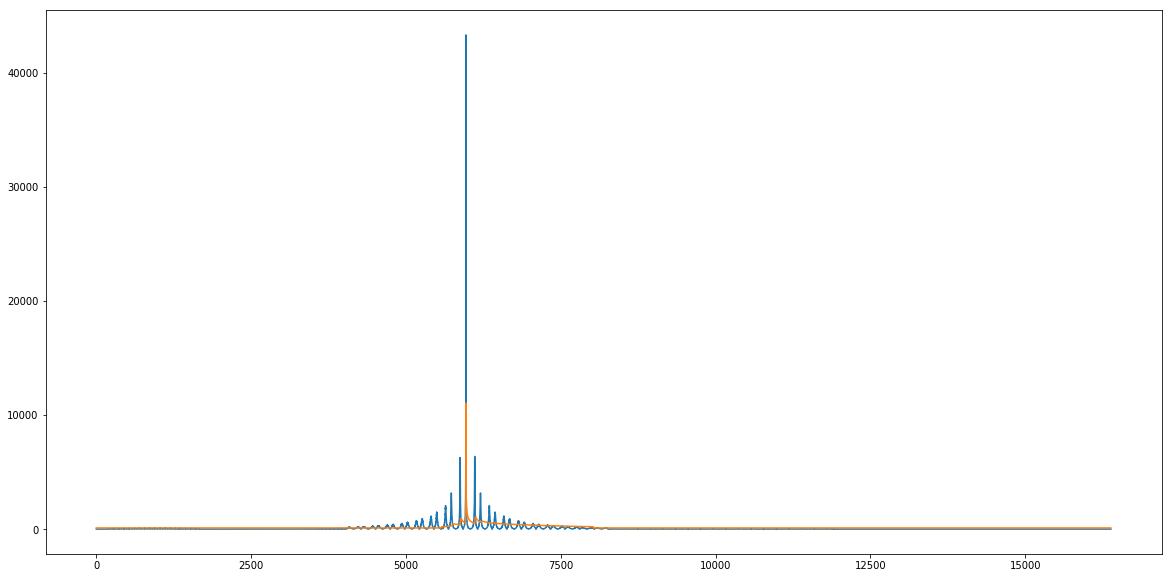

In [29]:
a = pd.Series(Y_array[1010])
b = pd.Series(Local_Energy_Schedules[1010])

np.argmax(signal.correlate(b, a))

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
plt.plot(b)
plt.plot(a)

In [30]:
X_array = np.zeros([len(Local_Energy_Schedules),max(Local_Energy_Schedules,key = lambda x: len(x)).index[-1]+1])

for i,j in enumerate(Local_Energy_Schedules):
    X_array[i][0:len(j)] = j
        

In [31]:
X_array.shape

(6579, 16384)

In [34]:
import pywt
Y_haar = Y_array
for i in range(0,6):
    (Y_haar, cd) = pywt.dwt(Y_haar,'Haar')

In [35]:
Y_haar.shape

(6579, 256)

In [36]:
Y_haarrec = Y_haar
for i in range(0,6):
    Y_haarrec= pywt.idwt(Y_haarrec, None, 'Haar' )

Text(0.5, 1.0, 'Original Themal History')

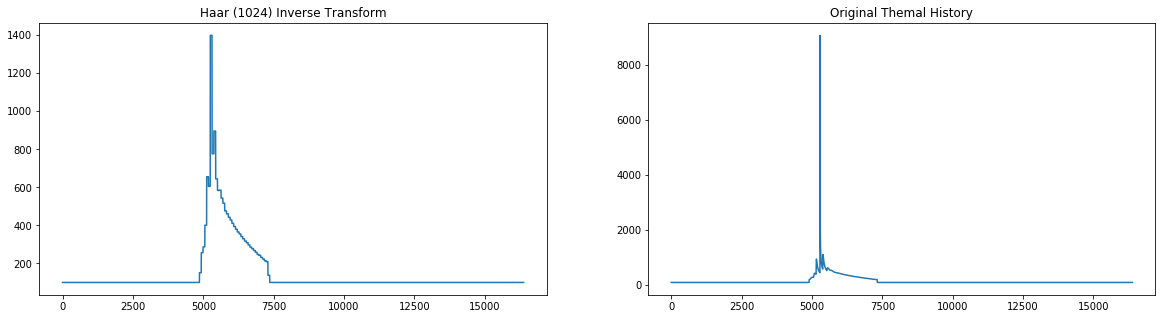

In [37]:
fig,ax = plt.subplots()

fig.set_size_inches(20,5)
plt.subplot(1,2,1)
plt.plot(Y_haarrec[994])
plt.title("Haar (1024) Inverse Transform")

plt.subplot(1,2,2)
plt.plot(Y_array[994])
plt.title("Original Themal History")

In [82]:
### Normalize the data 
from sklearn import preprocessing

X=preprocessing.normalize(X_array)
y,n=preprocessing.normalize(Y_haar,return_norm=True)

In [88]:
### Put the normalized data in a dataframe to track records
### X = pd.DataFrame(X)
### y = pd.DataFrame(y)

# Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.33,shuffle=True)

### load the data onto the GPU

In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda


# Load X and Y into the PyTorch data loader

In [273]:
my_x = X_train  # a list of numpy arrays
my_y = Y_train  # numpy array (targets)


class myDataset(Dataset):

    # Initialize your data, download, etc.
    def __init__(self,X,Y,transform=None):
        self.dim0 = X.shape[0]
        self.dim1 = X.shape[1]
        self.transform = transform
        self.x_data = X
        
        self.x_data = torch.FloatTensor(self.x_data).view(-1,1,self.dim1)
        self.y_data = torch.from_numpy(Y)
        self.y_data = self.y_data.float()
        
    def __getitem__(self, index):
        x = self.x_data[index]
        y = self.y_data[index]
        if self.transform:
            x=self.transform(x)
        return x,y
    
    def __len__(self):
        return self.dim0

In [274]:
xdataset = myDataset(X_train,Y_train,transform=None)
train_loader = DataLoader(dataset=xdataset,batch_size=32,
                          shuffle=True)

In [275]:
ydataset = myDataset(X_test,Y_test,transform=None)
test_loader = DataLoader(dataset=ydataset,batch_size=32,
                          shuffle=True)

In [276]:
type(xdataset.y_data)

torch.Tensor

# Build a CNN

In [346]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #convolutional_layers
        self.conv1 = nn.Conv1d(1, 6, 3)
        self.conv2 = nn.Conv1d(6, 16, 3)
        self.conv3 = nn.Conv1d(16, 32, 3)
        self.conv4 = nn.Conv1d(32, 64, 3)
        self.conv5 = nn.Conv1d(64,128,3)
        
        #pooling_layer
        self.pool = nn.MaxPool1d(3,stride=2)
        
        #batch_normalization
        self.b_n1 = nn.BatchNorm1d(6)
        self.b_n2 = nn.BatchNorm1d(16)
        self.b_n3 = nn.BatchNorm1d(32)
        self.b_n4 = nn.BatchNorm1d(64)
        self.b_n5 = nn.BatchNorm1d(128)
        
        #dense/fully_connected_layers
        self.fc1 = nn.Linear(128 * 14, 7000)
        self.fc2 = nn.Linear(7000,4000)
        self.fc3 = nn.Linear(4000,2000)
        self.fc4 = nn.Linear(2000,1000)
        self.fc5 = nn.Linear(1000,256)
       
                        
    #Feed Forward network
    def forward(self, x):
        x = self.pool(self.pool(F.leaky_relu(self.conv1(x))))
        x = self.b_n1(x)
        x = self.pool(self.pool(F.leaky_relu(self.conv2(x))))
        x = self.b_n2(x)
        x = self.pool(self.pool(F.leaky_relu(self.conv3(x))))
        x = self.b_n3(x)
        x = self.pool(self.pool(F.leaky_relu(self.conv4(x))))
        x = self.b_n4(x)
        x = self.pool(self.pool(F.leaky_relu(self.conv5(x))))
        x = self.b_n5(x)

        #Flatten the layer
        x = x.view(-1, 128 * 14)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        
        return x


net = Net().to(device)

# Optimizer

In [278]:
import torch.optim as optim

criterion = nn.MSELoss()

In [279]:
net_SGD = Net().to(device)
net_Momentum = Net().to(device)
net_RMSprop = Net().to(device)
net_Adam = Net().to(device)

opt_SGD = torch.optim.SGD(net_SGD.parameters(),lr=0.1)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr = 0.001, momentum = 0.9)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr = 0.001, alpha = 0.99)
opt_Adam = torch.optim.Adam(net_Adam.parameters(),lr=0.001)

name=["SGD","Momentum","RMSprop","Adam"]
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [280]:
SGDl = []
Moml = []
RMSl = []
Adaml = []

SGDa = []
Moma = []
RMSa = []
Adama = []

In [281]:
for epoch in range(20):  # loop over the dataset multiple times (30 passes of all the training samples through 176 batches of 32)

    running_loss = 0.0
    r_l = 0.0
    for i, data in enumerate(train_loader,0):
        # get the inputs
        inputs,labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        for l,net,optimizer in zip(name,nets,optimizers):
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()
            total += labels.size(0)
            if i % 10 == 9:    # print every 10 mini-batches
                print(l,"(Epoch:",epoch+1,"; Batch:",i+1,")")
                print('[%2d, %3d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 10))
                if l=="SGD":
                    SGDl.append(running_loss/10)
                elif l=="Momentum":
                    Moml.append(running_loss/10)
                elif l=="RMSprop":
                    RMSl.append(running_loss/10)
                elif l=="Adam":
                    Adaml.append(running_loss/10)
                running_loss = 0.0
print('Finished Training')

SGD (Epoch: 1 ; Batch: 10 )
[ 1,  10] loss: 932031.902
Momentum (Epoch: 1 ; Batch: 10 )
[ 1,  10] loss: 0.000
RMSprop (Epoch: 1 ; Batch: 10 )
[ 1,  10] loss: 0.000
Adam (Epoch: 1 ; Batch: 10 )
[ 1,  10] loss: 0.000
SGD (Epoch: 1 ; Batch: 20 )
[ 1,  20] loss: 0.013
Momentum (Epoch: 1 ; Batch: 20 )
[ 1,  20] loss: 0.000
RMSprop (Epoch: 1 ; Batch: 20 )
[ 1,  20] loss: 0.000
Adam (Epoch: 1 ; Batch: 20 )
[ 1,  20] loss: 0.000
SGD (Epoch: 1 ; Batch: 30 )
[ 1,  30] loss: 0.012
Momentum (Epoch: 1 ; Batch: 30 )
[ 1,  30] loss: 0.000
RMSprop (Epoch: 1 ; Batch: 30 )
[ 1,  30] loss: 0.000
Adam (Epoch: 1 ; Batch: 30 )
[ 1,  30] loss: 0.000
SGD (Epoch: 1 ; Batch: 40 )
[ 1,  40] loss: 0.011
Momentum (Epoch: 1 ; Batch: 40 )
[ 1,  40] loss: 0.000
RMSprop (Epoch: 1 ; Batch: 40 )
[ 1,  40] loss: 0.000
Adam (Epoch: 1 ; Batch: 40 )
[ 1,  40] loss: 0.000
SGD (Epoch: 1 ; Batch: 50 )
[ 1,  50] loss: 0.010
Momentum (Epoch: 1 ; Batch: 50 )
[ 1,  50] loss: 0.000
RMSprop (Epoch: 1 ; Batch: 50 )
[ 1,  50] loss: 0.

RMSprop (Epoch: 6 ; Batch: 130 )
[ 6, 130] loss: 0.000
Adam (Epoch: 6 ; Batch: 130 )
[ 6, 130] loss: 0.000
SGD (Epoch: 7 ; Batch: 10 )
[ 7,  10] loss: 0.006
Momentum (Epoch: 7 ; Batch: 10 )
[ 7,  10] loss: 0.000
RMSprop (Epoch: 7 ; Batch: 10 )
[ 7,  10] loss: 0.000
Adam (Epoch: 7 ; Batch: 10 )
[ 7,  10] loss: 0.000
SGD (Epoch: 7 ; Batch: 20 )
[ 7,  20] loss: 0.006
Momentum (Epoch: 7 ; Batch: 20 )
[ 7,  20] loss: 0.000
RMSprop (Epoch: 7 ; Batch: 20 )
[ 7,  20] loss: 0.000
Adam (Epoch: 7 ; Batch: 20 )
[ 7,  20] loss: 0.000
SGD (Epoch: 7 ; Batch: 30 )
[ 7,  30] loss: 0.006
Momentum (Epoch: 7 ; Batch: 30 )
[ 7,  30] loss: 0.000
RMSprop (Epoch: 7 ; Batch: 30 )
[ 7,  30] loss: 0.000
Adam (Epoch: 7 ; Batch: 30 )
[ 7,  30] loss: 0.000
SGD (Epoch: 7 ; Batch: 40 )
[ 7,  40] loss: 0.006
Momentum (Epoch: 7 ; Batch: 40 )
[ 7,  40] loss: 0.000
RMSprop (Epoch: 7 ; Batch: 40 )
[ 7,  40] loss: 0.000
Adam (Epoch: 7 ; Batch: 40 )
[ 7,  40] loss: 0.000
SGD (Epoch: 7 ; Batch: 50 )
[ 7,  50] loss: 0.006
Mom

Momentum (Epoch: 12 ; Batch: 120 )
[12, 120] loss: 0.000
RMSprop (Epoch: 12 ; Batch: 120 )
[12, 120] loss: 0.000
Adam (Epoch: 12 ; Batch: 120 )
[12, 120] loss: 0.000
SGD (Epoch: 12 ; Batch: 130 )
[12, 130] loss: 0.005
Momentum (Epoch: 12 ; Batch: 130 )
[12, 130] loss: 0.000
RMSprop (Epoch: 12 ; Batch: 130 )
[12, 130] loss: 0.000
Adam (Epoch: 12 ; Batch: 130 )
[12, 130] loss: 0.000
SGD (Epoch: 13 ; Batch: 10 )
[13,  10] loss: 0.005
Momentum (Epoch: 13 ; Batch: 10 )
[13,  10] loss: 0.000
RMSprop (Epoch: 13 ; Batch: 10 )
[13,  10] loss: 0.000
Adam (Epoch: 13 ; Batch: 10 )
[13,  10] loss: 0.000
SGD (Epoch: 13 ; Batch: 20 )
[13,  20] loss: 0.005
Momentum (Epoch: 13 ; Batch: 20 )
[13,  20] loss: 0.000
RMSprop (Epoch: 13 ; Batch: 20 )
[13,  20] loss: 0.000
Adam (Epoch: 13 ; Batch: 20 )
[13,  20] loss: 0.000
SGD (Epoch: 13 ; Batch: 30 )
[13,  30] loss: 0.005
Momentum (Epoch: 13 ; Batch: 30 )
[13,  30] loss: 0.000
RMSprop (Epoch: 13 ; Batch: 30 )
[13,  30] loss: 0.000
Adam (Epoch: 13 ; Batch: 3

Momentum (Epoch: 18 ; Batch: 100 )
[18, 100] loss: 0.000
RMSprop (Epoch: 18 ; Batch: 100 )
[18, 100] loss: 0.000
Adam (Epoch: 18 ; Batch: 100 )
[18, 100] loss: 0.000
SGD (Epoch: 18 ; Batch: 110 )
[18, 110] loss: 0.005
Momentum (Epoch: 18 ; Batch: 110 )
[18, 110] loss: 0.000
RMSprop (Epoch: 18 ; Batch: 110 )
[18, 110] loss: 0.000
Adam (Epoch: 18 ; Batch: 110 )
[18, 110] loss: 0.000
SGD (Epoch: 18 ; Batch: 120 )
[18, 120] loss: 0.005
Momentum (Epoch: 18 ; Batch: 120 )
[18, 120] loss: 0.000
RMSprop (Epoch: 18 ; Batch: 120 )
[18, 120] loss: 0.000
Adam (Epoch: 18 ; Batch: 120 )
[18, 120] loss: 0.000
SGD (Epoch: 18 ; Batch: 130 )
[18, 130] loss: 0.005
Momentum (Epoch: 18 ; Batch: 130 )
[18, 130] loss: 0.000
RMSprop (Epoch: 18 ; Batch: 130 )
[18, 130] loss: 0.000
Adam (Epoch: 18 ; Batch: 130 )
[18, 130] loss: 0.000
SGD (Epoch: 19 ; Batch: 10 )
[19,  10] loss: 0.005
Momentum (Epoch: 19 ; Batch: 10 )
[19,  10] loss: 0.000
RMSprop (Epoch: 19 ; Batch: 10 )
[19,  10] loss: 0.000
Adam (Epoch: 19 ; 

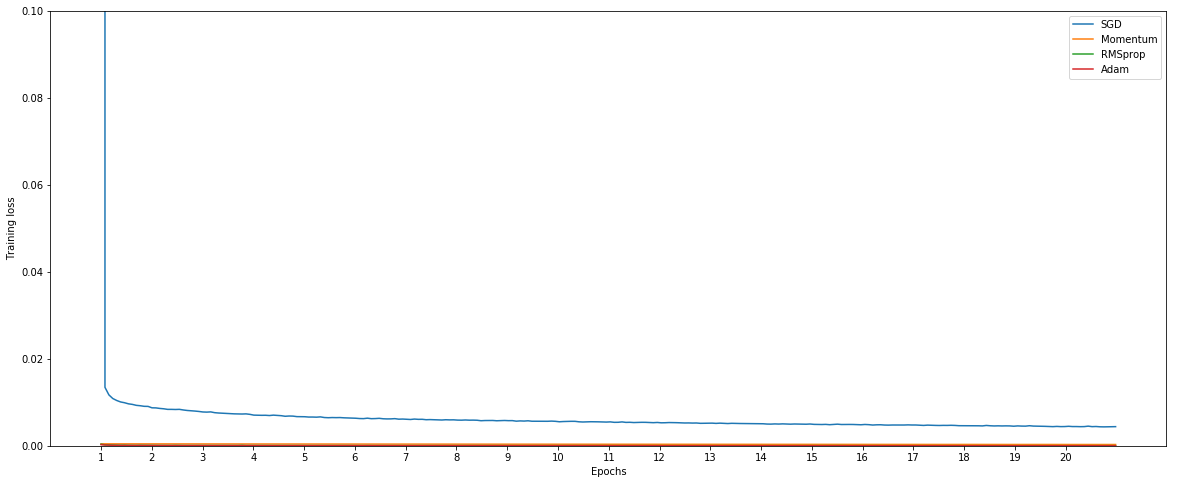

In [283]:
lo = [SGDl,Moml,RMSl,Adaml]

fig,ax = plt.subplots()
fig.set_size_inches(20,8)
for i, k in enumerate(lo):
    plt.plot(k,label = name[i])
    plt.ylim(0,0.1)
    plt.xticks([w*len(X_train)/340 for w in range(20)],['%i'%w for w in range(1,21)])
    plt.xlabel("Epochs")
    plt.ylabel("Training loss")
    plt.legend()

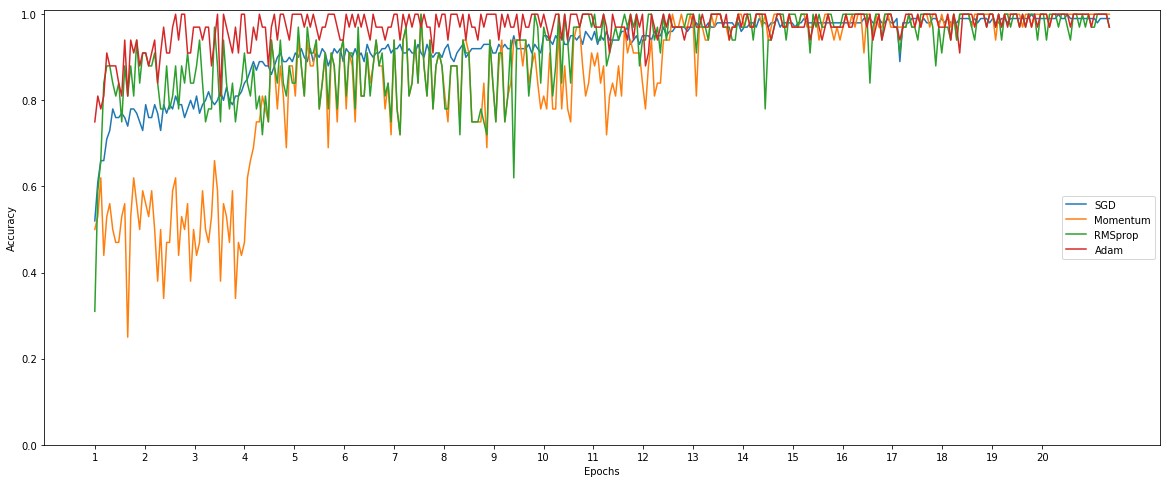

In [125]:
acc = [SGDa,Moma,RMSa,Adama]

fig,ax = plt.subplots()
fig.set_size_inches(20,8)
for i, k in enumerate(acc):
    plt.plot(k,label = name[i])
    plt.ylim(0,1.01)
    plt.xticks([w*len(X_train)/340 for w in range(20)],['%i'%w for w in range(1,21)])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc=7)

## Accuracy

In [362]:
y_hat = []
y_t = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data 
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = net_Adam(images)
        for i in range(0,len(outputs)):
            y_hat.append(outputs[i])
            y_t.append(labels[i])

for i in range(len(y_hat)):

    y_hat[i] = y_hat[i].cpu().numpy()
    y_t[i] = y_t[i].cpu().numpy()

Text(0.5, 1.0, 'Original Haar wavelet transformed values')

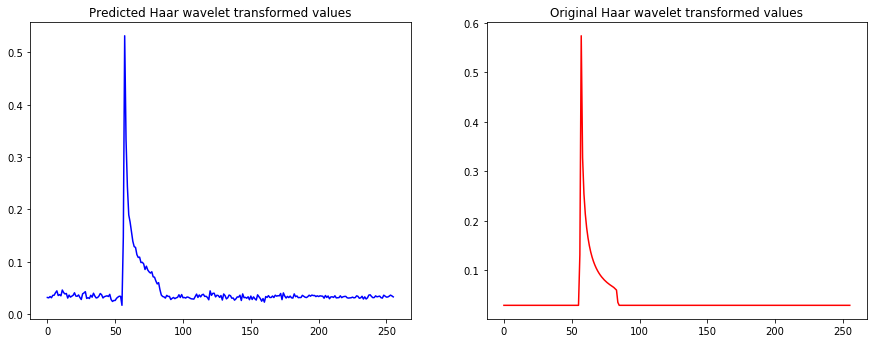

In [374]:
k=2086

fig,ax = plt.subplots()


fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

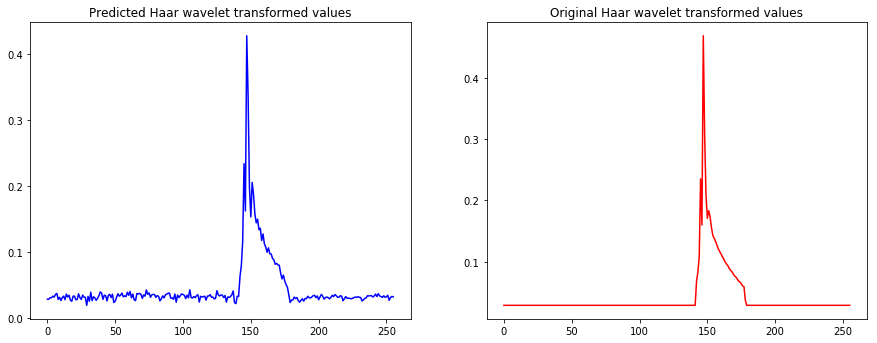

In [375]:
k=2000

fig,ax = plt.subplots()


fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

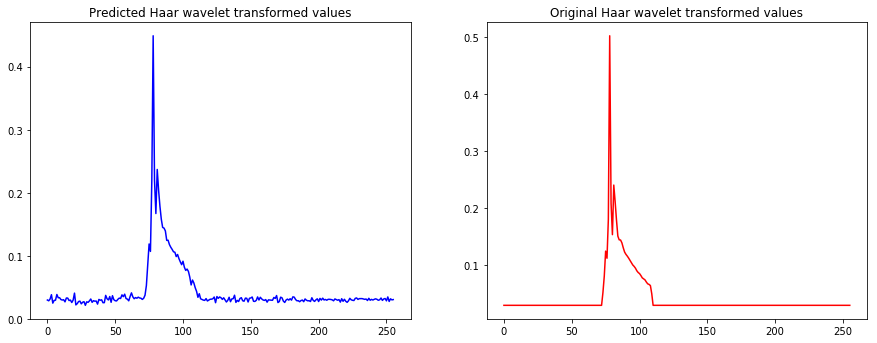

In [376]:
k=1998

fig,ax = plt.subplots()


fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

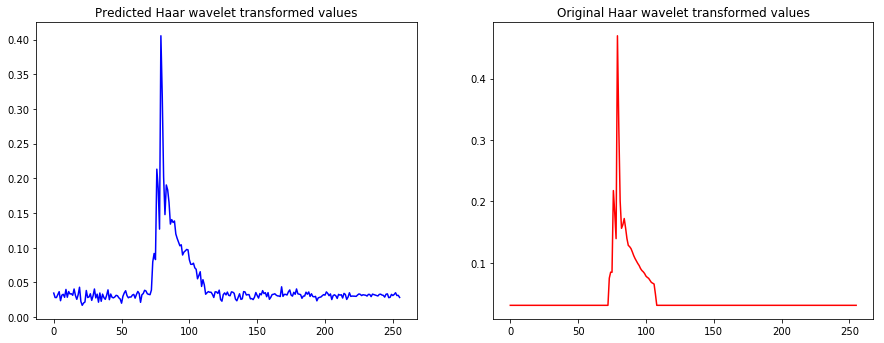

In [377]:
k=2001

fig,ax = plt.subplots()


fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

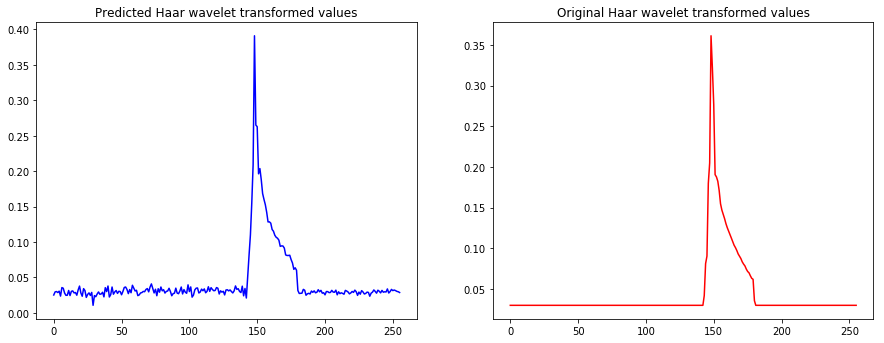

In [378]:
k=1803

fig,ax = plt.subplots()


fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

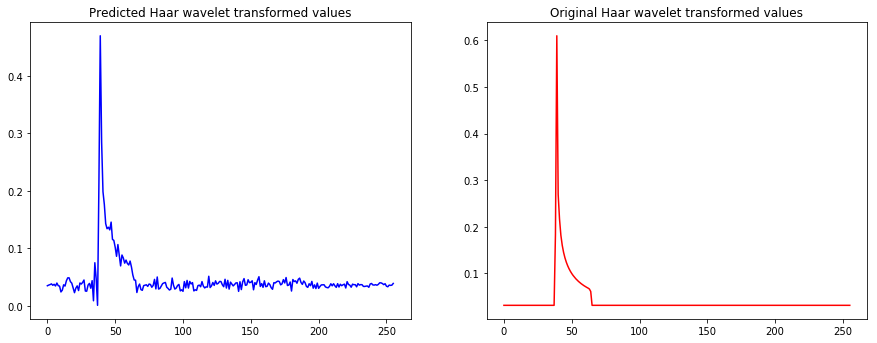

In [395]:
k=1807

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

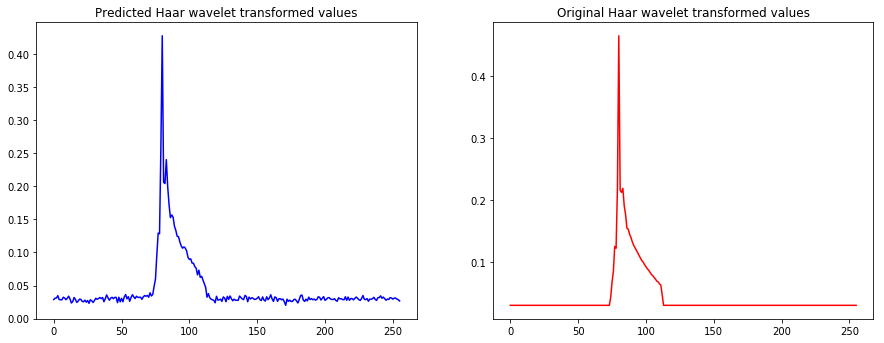

In [388]:
k=105

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

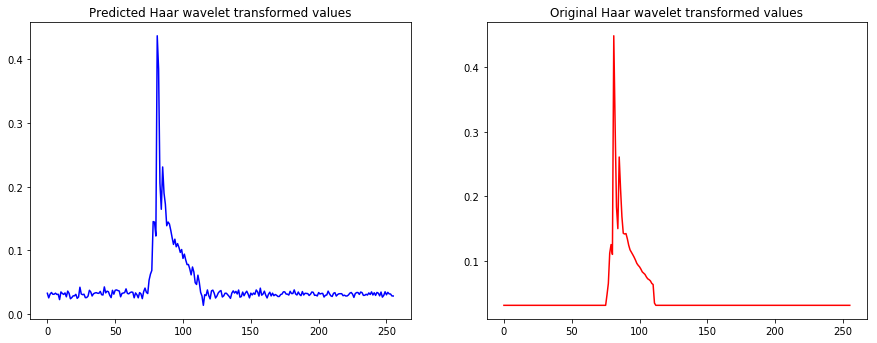

In [389]:
k=512

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

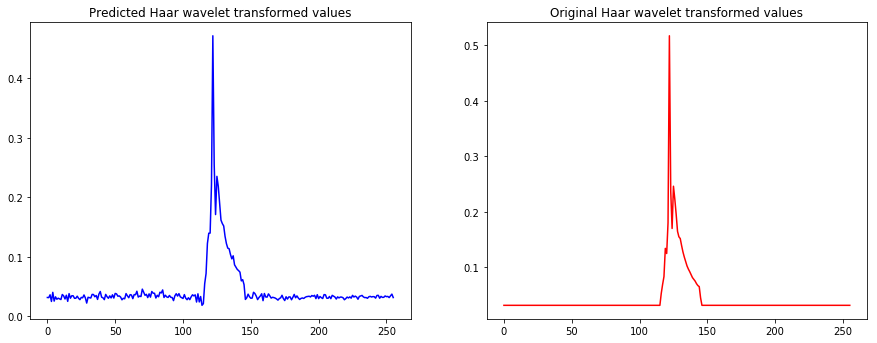

In [390]:
k=1209

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

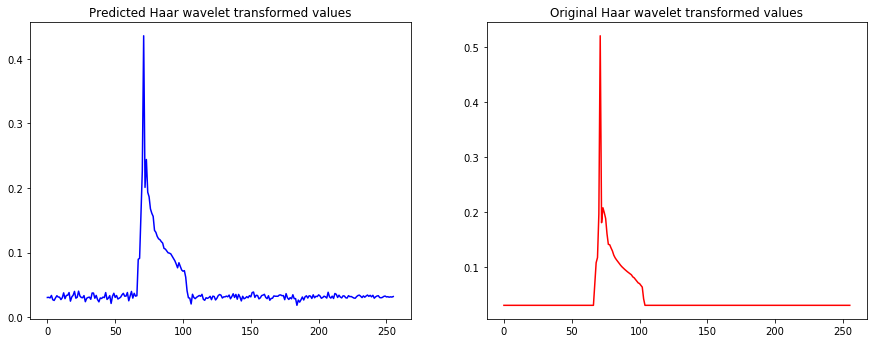

In [392]:
k=632

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

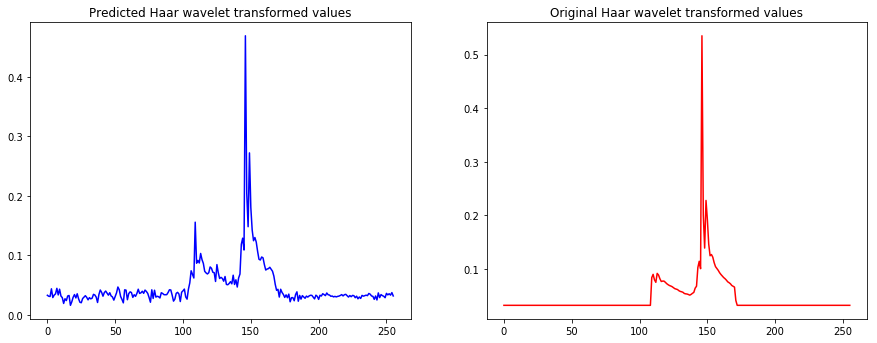

In [393]:
k=1176

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

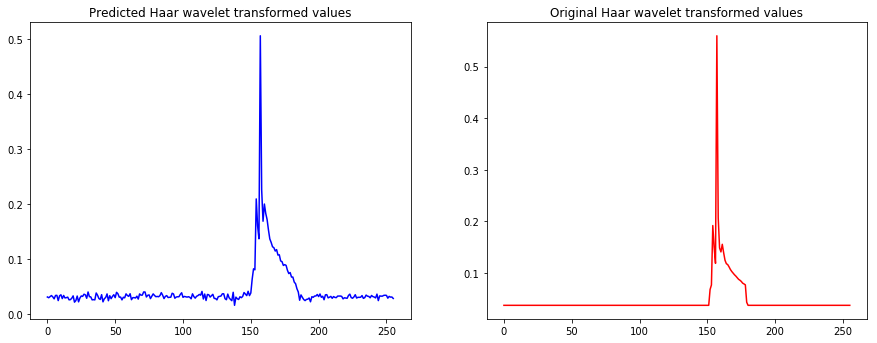

In [405]:
k=358

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

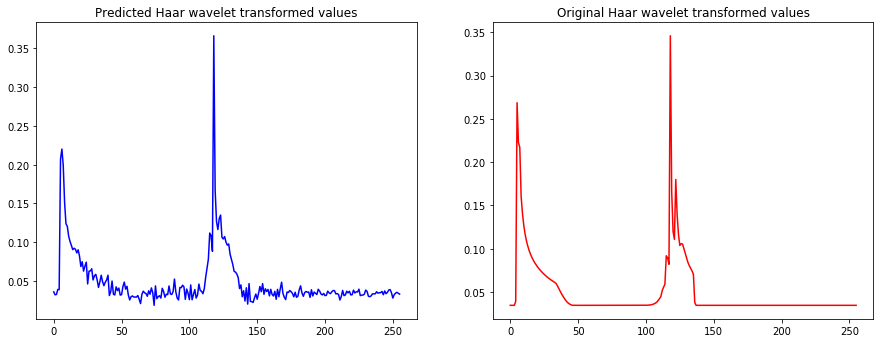

In [406]:
k=28

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")


Text(0.5, 1.0, 'Original Haar wavelet transformed values')

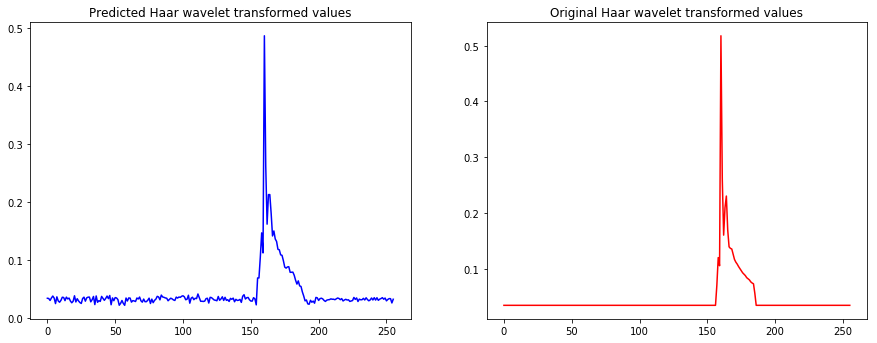

In [419]:
k=15

fig,ax = plt.subplots()

fig.set_size_inches(15,12)
plt.subplot(2,2,1)
plt.plot(y_hat[k],c="b")
plt.title("Predicted Haar wavelet transformed values")

plt.subplot(2,2,2)
plt.plot(y_t[k],c="r")
plt.title("Original Haar wavelet transformed values")
